In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = [0,1], 
                   parse_dates = True)
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          10342.0  
         2015-01-01          10032.0  
         2014-01-01           9808.0  
         2013-01-01           9660.0  
...                              ...  
ZWE      2000-01-01           2249.0  
         1995-01-01           2156.0  
         1990-01-01           2232.0  
         1985-01-01           2198.0  
         1980-01-01           2133.0  

[3030 rows x 7 columns]

In [2]:
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product(
    [countries, years[:-1]], names = data.index.names)
data = data.reindex(multi_index)

data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2011-01-01           1515.0  
         2012-01-01           1604.0  
         2013-01-01           1604.0  
         2014-01-01           1594.0  
         2015-01-01           1560.0  

[7452 rows x 7 columns]

In [3]:
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()

In [4]:
data = data.dropna(axis=0)
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      2006-01-01  4.883132            5.342913   
         2007-01-01  4.980365            5.239228   
         2008-01-01  4.980803            5.307379   
         2009-01-01  5.357889            7.104953   
         2010-01-01  5.372788            5.738678   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AGO      2006-01-01           6024.0               5136.0  
         2007-01-01           7173.0               6024.0  
         2008-01-01           7936.0               7173.0  
         2009-01-01           7900.0               7936.0  
         2010-01-01           7940.0               7900.0  
...                              ...                  ...  
ZWE      2011-01-01           1515.0               1404.0  
         2012-01-01           1604.0               1515.0  
         2013-01-01           1604.0               1604.0  
         2014-01-01           1594.0               1604.0  
         2015-01-01           1560.0               1594.0  

[1999 rows x 8 columns]

### Exercises

In [5]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars]
reg_data.corr().round(2)

RGDP Per Capita  Size of Government  \
RGDP Per Capita                              1.00               -0.24   
Size of Government                          -0.24                1.00   
Legal System & Property Rights               0.67               -0.17   
Sound Money                                  0.44                0.11   
Freedom to trade internationally             0.51                0.14   
Regulation                                   0.51                0.08   

                                  Legal System & Property Rights  Sound Money  \
RGDP Per Capita                                             0.67         0.44   
Size of Government                                         -0.17         0.11   
Legal System & Property Rights                              1.00         0.59   
Sound Money                                                 0.59         1.00   
Freedom to trade internationally                            0.68         0.75   
Regulation                                                  0.66         0.57   

                                  Freedom to trade internationally  Regulation  
RGDP Per Capita                                               0.51        0.51  
Size of Government                                            0.14        0.08  
Legal System & Property Rights                                0.68        0.66  
Sound Money                                                   0.75        0.57  
Freedom to trade internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [6]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

In [7]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

C:\Users\adamp\AppData\Local\Temp\ipykernel_2056\734817014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
         2010-01-01           7940.0            5.738678   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor  
ISO_Code Year                                   
AGO      2006-01-01                5888.936630  
         2007-01-01                6938.646269  
         2008-01-01                5820.385195  
         2009-01-01                -559.344439  
         2010-01-01                6752.189724  
...                                        ...  
ZWE      2011-01-01                 576.274207  
         2012-01-01               -1574.968350  
         2013-01-01                -786.788053  
         2014-01-01                 394.254808  
         2015-01-01                7553.916466  

[1999 rows x 7 columns]

In [8]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean) ** 2
reg_data["Squared Residuals"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
         2010-01-01           7940.0            5.738678   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor    Residuals  \
ISO_Code Year                                                 
AGO      2006-01-01                5888.936630   135.063370   
         2007-01-01                6938.646269   234.353731   
         2008-01-01                5820.385195  2115.614805   
         2009-01-01                -559.344439  8459.344439   
         2010-01-01                6752.189724  1187.810276   
...                                        ...          ...   
ZWE      2011-01-01                 576.274207   938.725793   
         2012-01-01               -1574.968350  3178.968350   
         2013-01-01                -786.788053  2390.788053   
         2014-01-01                 394.254808  1199.745192   
         2015-01-01                7553.916466 -5993.916466   

                     Squared Explained  Squared Residuals  Squared Totals  
ISO_Code Year                                                              
AGO      2006-01-01       1.436137e+08       1.824211e+04    1.403947e+08  
         2007-01-01       1.195563e+08       5.492167e+04    1.144863e+08  
         2008-01-01       1.452614e+08       4.475826e+06    9.874056e+07  
         2009-01-01       3.397450e+08       7.156051e+07    9.945731e+07  
         2010-01-01       1.236686e+08       1.410893e+06    9.866108e+07  
...                                ...                ...             ...  
ZWE      2011-01-01       2.9

1. Use the np.log() function to log the values of RGDP per capita. Create a lag for this new variable and rerun the  regression using these new logged values as well as untransformed Economic Freedom Index Values (don't log these variables!). (hint: you may reimport the csv file).


In [9]:
reg_data['RGDP Per Capita Log'] = np.log(reg_data['RGDP Per Capita'])
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
         2010-01-01           7940.0            5.738678   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor    Residuals  \
ISO_Code Year                                                 
AGO      2006-01-01                5888.936630   135.063370   
         2007-01-01                6938.646269   234.353731   
         2008-01-01                5820.385195  2115.614805   
         2009-01-01                -559.344439  8459.344439   
         2010-01-01                6752.189724  1187.810276   
...                                        ...          ...   
ZWE      2011-01-01                 576.274207   938.725793   
         2012-01-01               -1574.968350  3178.968350   
         2013-01-01                -786.788053  2390.788053   
         2014-01-01                 394.254808  1199.745192   
         2015-01-01                7553.916466 -5993.916466   

                     Squared Explained  Squared Residuals  Squared Totals  \
ISO_Code Year                                                               
AGO      2006-01-01       1.436137e+08       1.824211e+04    1.403947e+08   
         2007-01-01       1.195563e+08       5.492167e+04    1.144863e+08   
         2008-01-01       1.452614e+08       4.475826e+06    9.874056e+07   
         2009-01-01       3.397450e+08       7.156051e+07    9.945731e+07   
         2010-01-01       1.236686e+08       1.410893e+06    9.866108e+07   
...                                ...                ...             ...   
ZWE      2011-01-01  

In [10]:
reg_data["RGDP Per Capita Log Lag"] = reg_data.groupby("ISO_Code")["RGDP Per Capita Log"].shift()
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
         2010-01-01           7940.0            5.738678   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor    Residuals  \
ISO_Code Year                                                 
AGO      2006-01-01                5888.936630   135.063370   
         2007-01-01                6938.646269   234.353731   
         2008-01-01                5820.385195  2115.614805   
         2009-01-01                -559.344439  8459.344439   
         2010-01-01                6752.189724  1187.810276   
...                                        ...          ...   
ZWE      2011-01-01                 576.274207   938.725793   
         2012-01-01               -1574.968350  3178.968350   
         2013-01-01                -786.788053  2390.788053   
         2014-01-01                 394.254808  1199.745192   
         2015-01-01                7553.916466 -5993.916466   

                     Squared Explained  Squared Residuals  Squared Totals  \
ISO_Code Year                                                               
AGO      2006-01-01       1.436137e+08       1.824211e+04    1.403947e+08   
         2007-01-01       1.195563e+08       5.492167e+04    1.144863e+08   
         2008-01-01       1.452614e+08       4.475826e+06    9.874056e+07   
         2009-01-01       3.397450e+08       7.156051e+07    9.945731e+07   
         2010-01-01       1.236686e+08       1.410893e+06    9.866108e+07   
...                                ...                ...             ...   
ZWE      2011-01-01  

In [12]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
         "RGDP Per Capita Log",
          "RGDP Per Capita Log Lag"]
reg_vars = y_var + x_vars
data = reg_data[reg_vars]
data.corr().round(2)

RGDP Per Capita  Size of Government  \
RGDP Per Capita                              1.00               -0.24   
Size of Government                          -0.24                1.00   
Legal System & Property Rights               0.67               -0.17   
Sound Money                                  0.44                0.11   
Freedom to trade internationally             0.51                0.14   
Regulation                                   0.51                0.08   
RGDP Per Capita Log                          0.82               -0.20   
RGDP Per Capita Log Lag                      0.83               -0.21   

                                  Legal System & Property Rights  Sound Money  \
RGDP Per Capita                                             0.67         0.44   
Size of Government                                         -0.17         0.11   
Legal System & Property Rights                              1.00         0.59   
Sound Money                                                 0.59         1.00   
Freedom to trade internationally                            0.68         0.75   
Regulation                                                  0.66         0.57   
RGDP Per Capita Log                                         0.75         0.55   
RGDP Per Capita Log Lag                                     0.75         0.56   

                                  Freedom to trade internationally  \
RGDP Per Capita                                               0.51   
Size of Government                                            0.14   
Legal System & Property Rights                                0.68   
Sound Money                                                   0.75   
Freedom to trade internationally                              1.00   
Regulation                                                    0.65   
RGDP Per Capita Log                                           0.64   
RGDP Per Capita Log Lag                                       0.63   

                                  Regulation  RGDP Per Capita Log  \
RGDP Per Capita                         0.51                 0.82   
Size of Government                      0.08                -0.20   
Legal System & Property Rights          0.66                 0.75   
Sound Money                             0.57                 0.55   
Freedom to trade internationally        0.65                 0.64   
Regulation                              1.00                 0.54   
RGDP Per Capita Log                     0.54                 1.00   
RGDP Per Capita Log Lag                 0.54                 1.00   

                                  RGDP Per Capita Log Lag  
RGDP Per Capita                                      0.83  
Size of Government                                  -0.21  
Legal System & Property Rights                       0.75  
Sound Money                                          0.56  
Freedom to trade internationally                     0.63  
Regulation                                           0.54  
RGDP Per Capita Log                                  1.00  
RGDP Per Capita Log Lag                              1.00

In [16]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

C:\Users\adamp\AppData\Local\Temp\ipykernel_2056\751764529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [17]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
         2010-01-01           7940.0            5.738678   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor    Residuals  \
ISO_Code Year                                                 
AGO      2006-01-01                5888.936630   135.063370   
         2007-01-01                6938.646269   234.353731   
         2008-01-01                5820.385195  2115.614805   
         2009-01-01                -559.344439  8459.344439   
         2010-01-01                6752.189724  1187.810276   
...                                        ...          ...   
ZWE      2011-01-01                 576.274207   938.725793   
         2012-01-01               -1574.968350  3178.968350   
         2013-01-01                -786.788053  2390.788053   
         2014-01-01                 394.254808  1199.745192   
         2015-01-01                7553.916466 -5993.916466   

                     Squared Explained  Squared Residuals  Squared Totals  \
ISO_Code Year                                                               
AGO      2006-01-01       1.436137e+08       1.824211e+04    1.403947e+08   
         2007-01-01       1.195563e+08       5.492167e+04    1.144863e+08   
         2008-01-01       1.452614e+08       4.475826e+06    9.874056e+07   
         2009-01-01       3.397450e+08       7.156051e+07    9.945731e+07   
         2010-01-01       1.236686e+08       1.410893e+06    9.866108e+07   
...                                ...                ...             ...   
ZWE      2011-01-01  

2. Plot the residuals in a bar chart. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regression from this lesson.

In [48]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
          "RGDP Per Capita Log"]
        
y = reg_data[y_var]
X = reg_data[x_vars]
results = sm.OLS(y, X).fit()
reg_data["Predictor"] = results.predict()

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        RGDP Per Capita   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              1043.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):                        0.00
Time:                        15:57:50   Log-Likelihood:                         -21749.
No. Observations:                1999   AIC:                                  4.351e+04
Df Residuals:                    1993   BIC:                                  4.354e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -5155.1571    251.139    -20.527      0.000   -5647.679   -4662.635
Legal System & Property Rights    4056.5176    282.456     14.362      0.000    3502.578    4610.457
Sound Money                       -389.7785    293.027     -1.330      0.184    -964.451     184.894
Freedom to trade internationally  -712.4895    448.055     -1.590      0.112   -1591.194     166.215
Regulation                        -900.0494    384.084     -2.343      0.019   -1653.298    -146.800
RGDP Per Capita Log               4912.4645    283.311     17.339      0.000    4356.848    5468.081
==============================================================================
Omnibus:                     1569.047   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47257.769
Skew:                           3.450   Prob(JB):                         0.00
Kurtosis:                      25.798   Cond. No.                         30.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([-50000., -25000.,      0.,  25000.,  50000.,  75000., 100000.,
        125000., 150000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

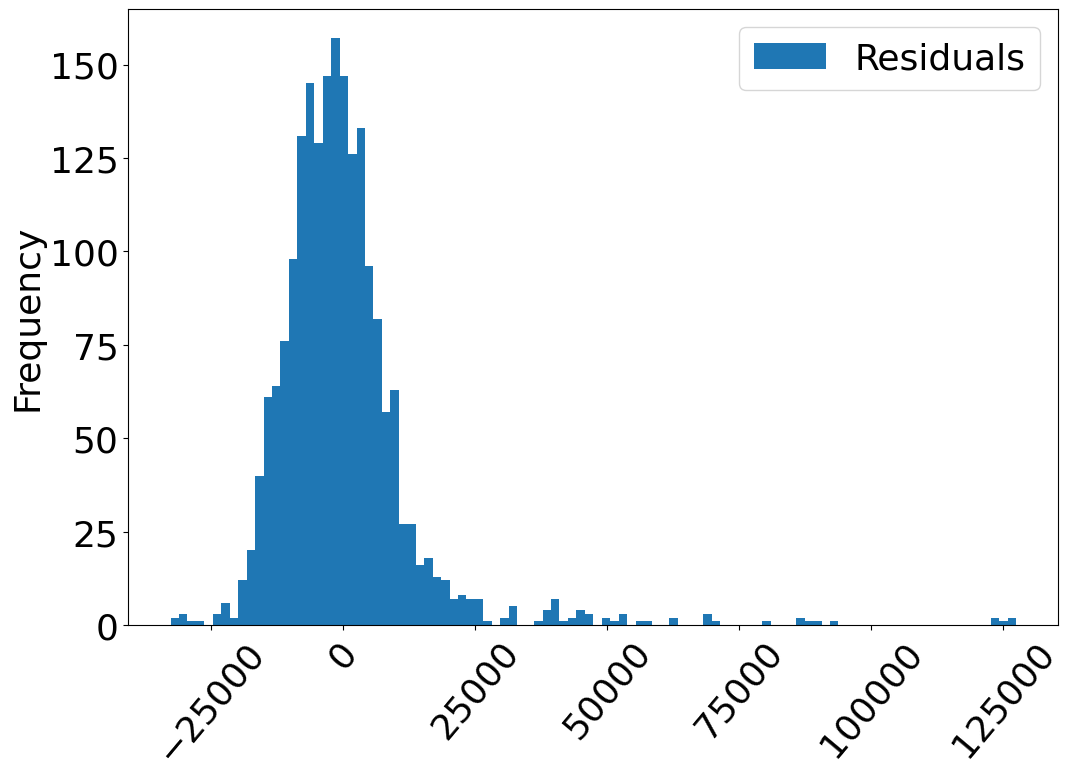

In [50]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=50)

The residual shape is a normal distribution. The chart look identical to the one done previously in the lesson because the predicted values did not change from logging the per capita and per capita lag. The prediction did not take these variables into consideration, so no change came to the graph. 

3. Plot a scatter plot with RGDP Per Capita on the horizontal axis and the predictor on the vertical axis. Then plot a scatter plot with RGDP Per Capita on the horizontal axis and the residual on the vertical axis. Are the residuals normally distributed? Why or why not? Why does this matter?

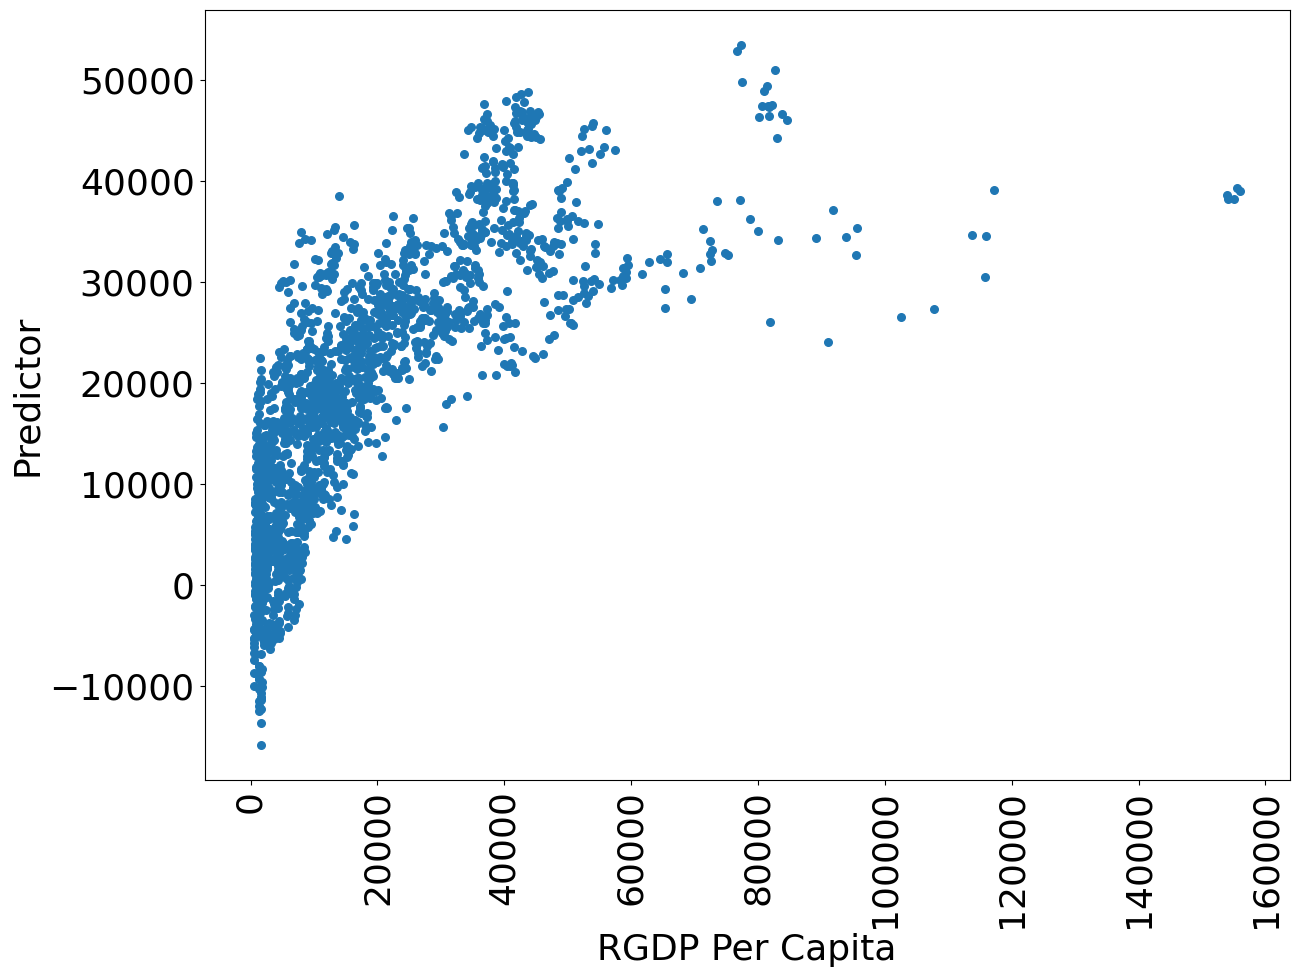

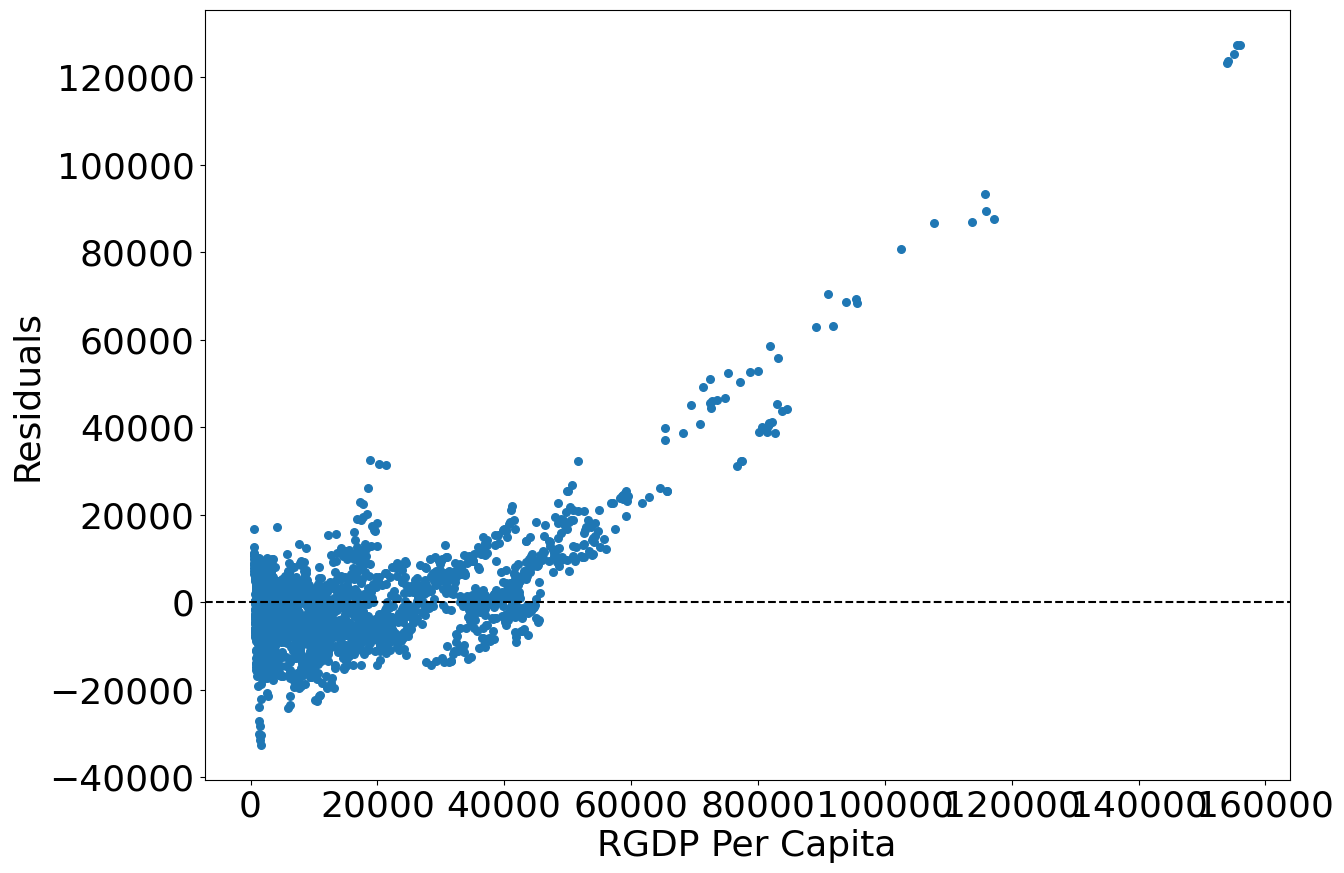

In [45]:
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)


fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")

The residual scatter plot does not show a normal distribution. Because the residual is not normally distributed, you cannot use the same predictive models or conslusions from it as you can from data that shows a normal distribution. 

4. Plot the observed and predicted logged values of RGDP Per Capita for each individual country. 

In [56]:
countries = data.groupby("ISO_Code").mean().index
plot_data = data[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data

C:\Users\adamp\AppData\Local\Temp\ipykernel_2056\4061562470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data[key] = plot_data[key] + 1


RGDP Per Capita     Predictor
ISO_Code Year                                     
AGO      2006-01-01           6025.0  10302.137148
         2007-01-01           7174.0  11134.298897
         2008-01-01           7937.0  10469.227443
         2009-01-01           7901.0   2241.744457
         2010-01-01           7941.0   9946.632704
...                              ...           ...
ZWE      2011-01-01           1516.0   5503.668834
         2012-01-01           1605.0   3914.184271
         2013-01-01           1605.0   4213.594574
         2014-01-01           1595.0   4736.738411
         2015-01-01           1561.0   8556.235054

[1999 rows x 2 columns]

C:\Users\adamp\AppData\Local\Temp\ipykernel_2056\715091265.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))
C:\Users\adamp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1244: UserWarning: Attempting to set identical left == right == 45.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\adamp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1244: UserWarning: Attempting to set identical left == right == 45.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


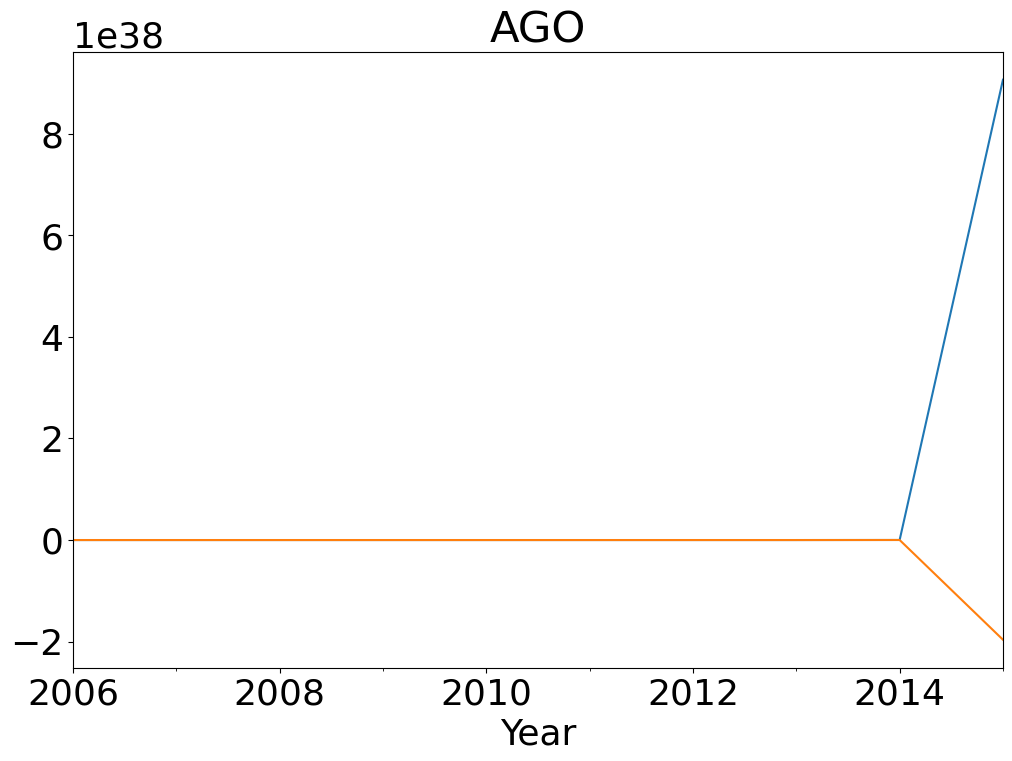

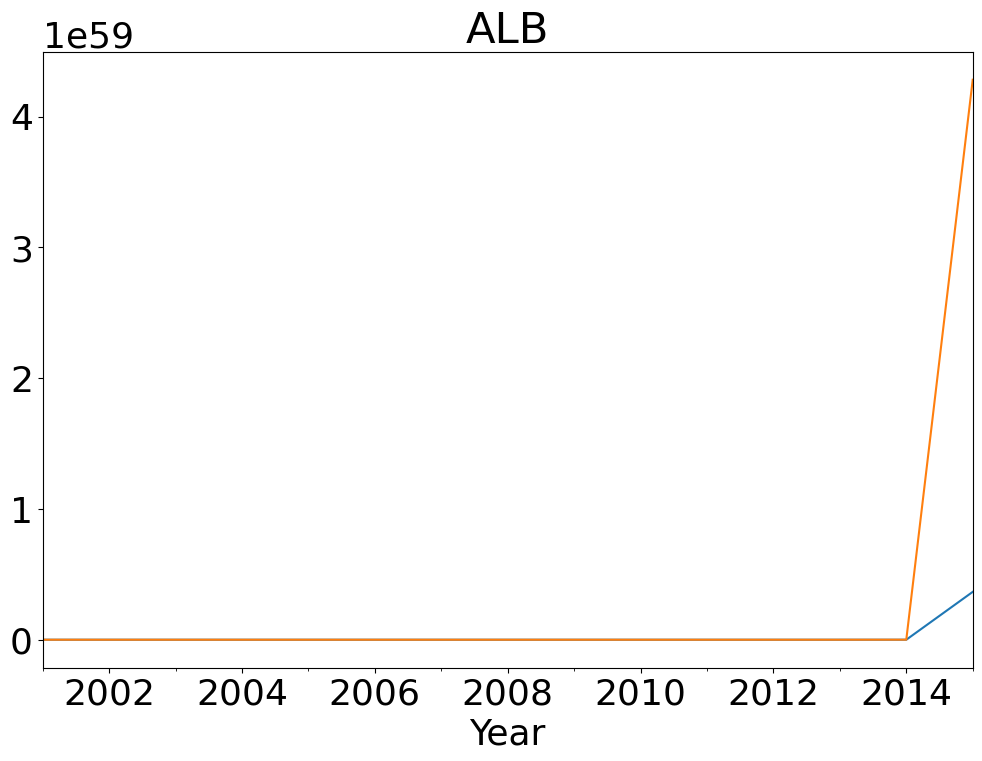

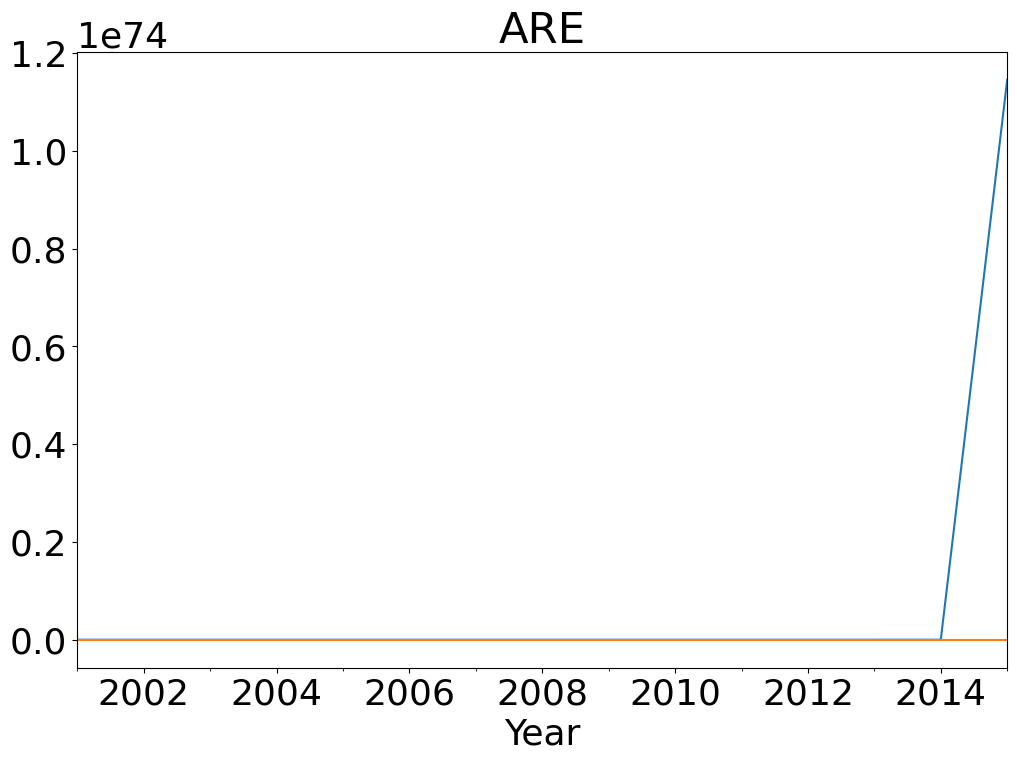

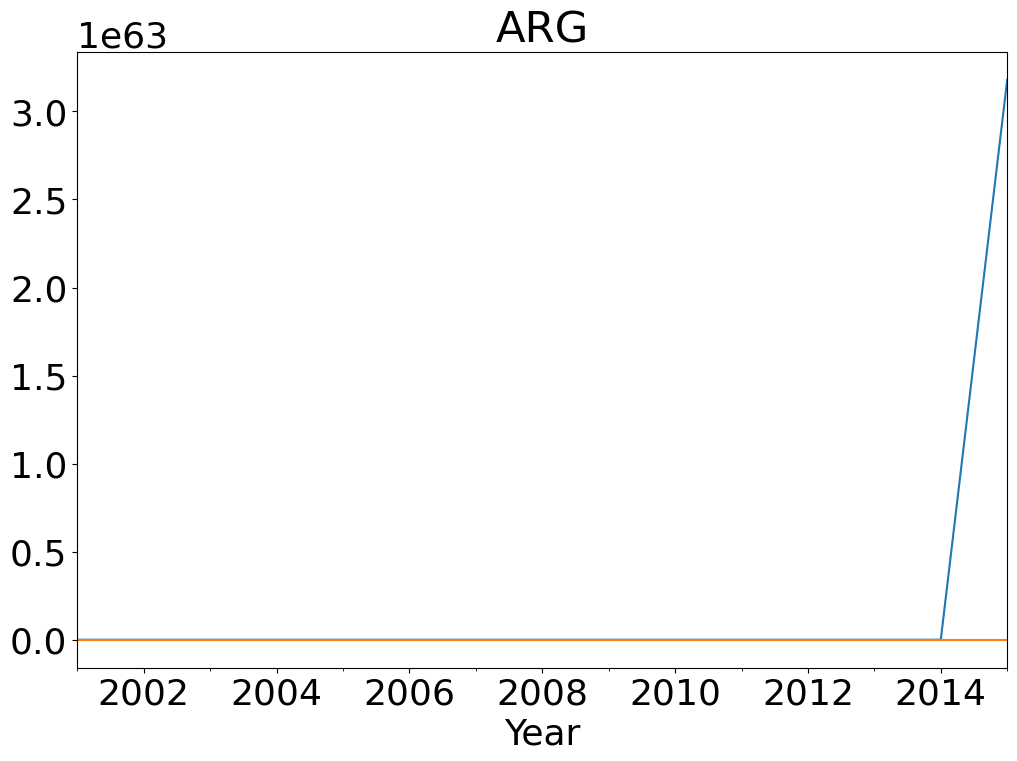

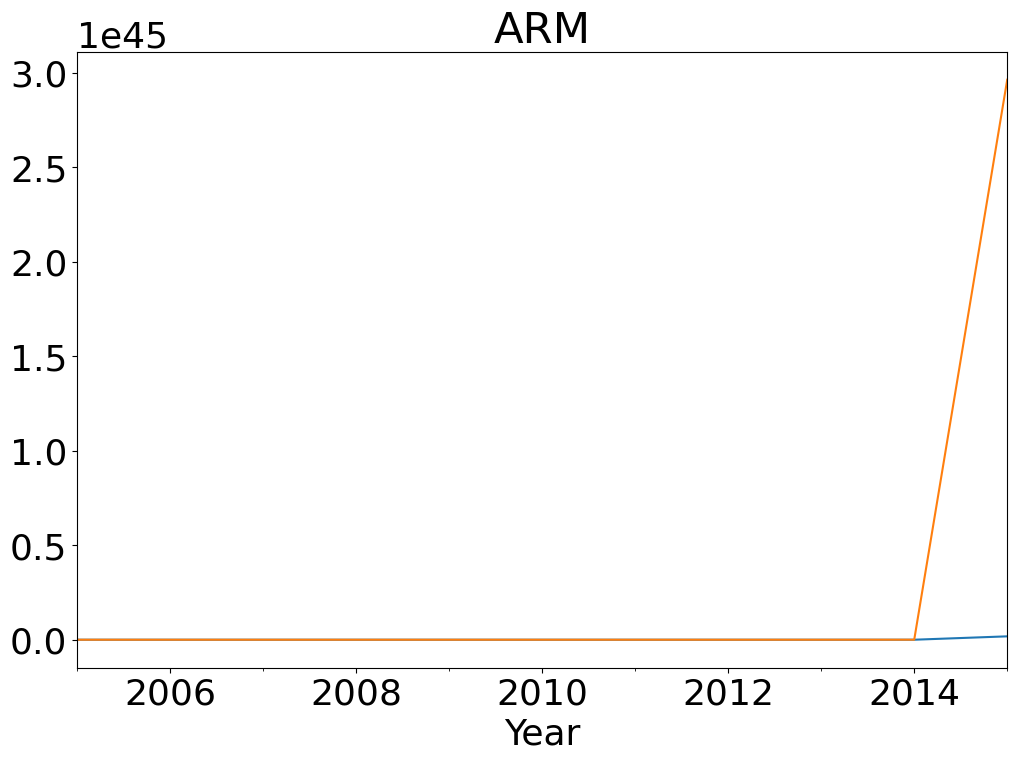

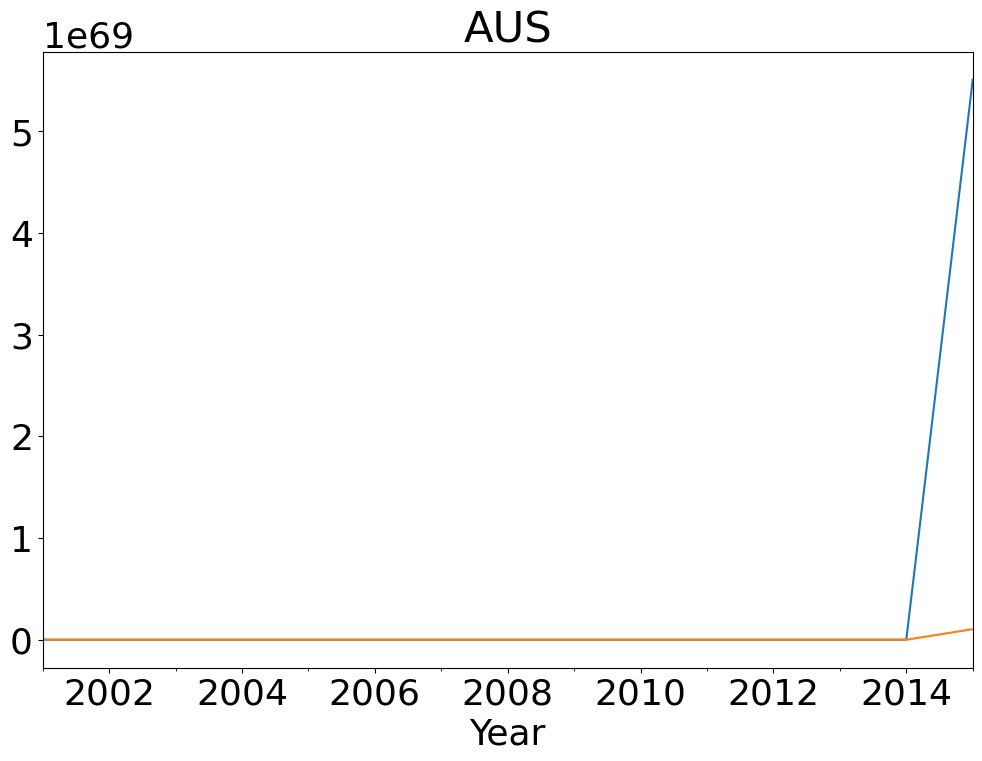

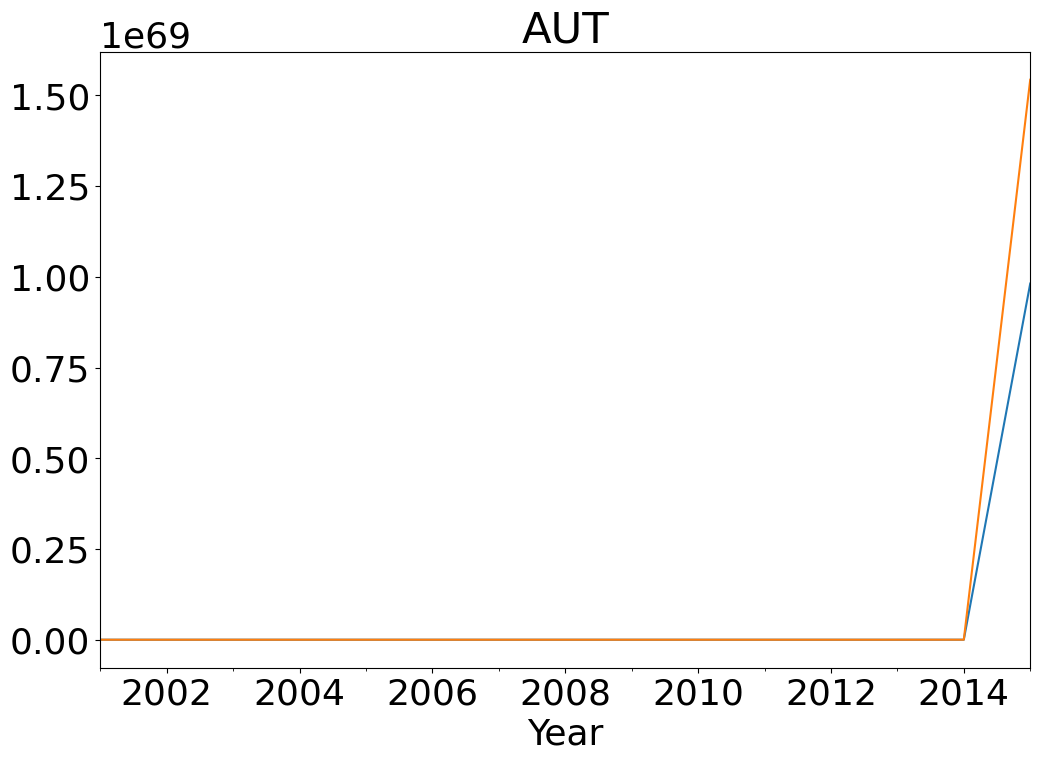

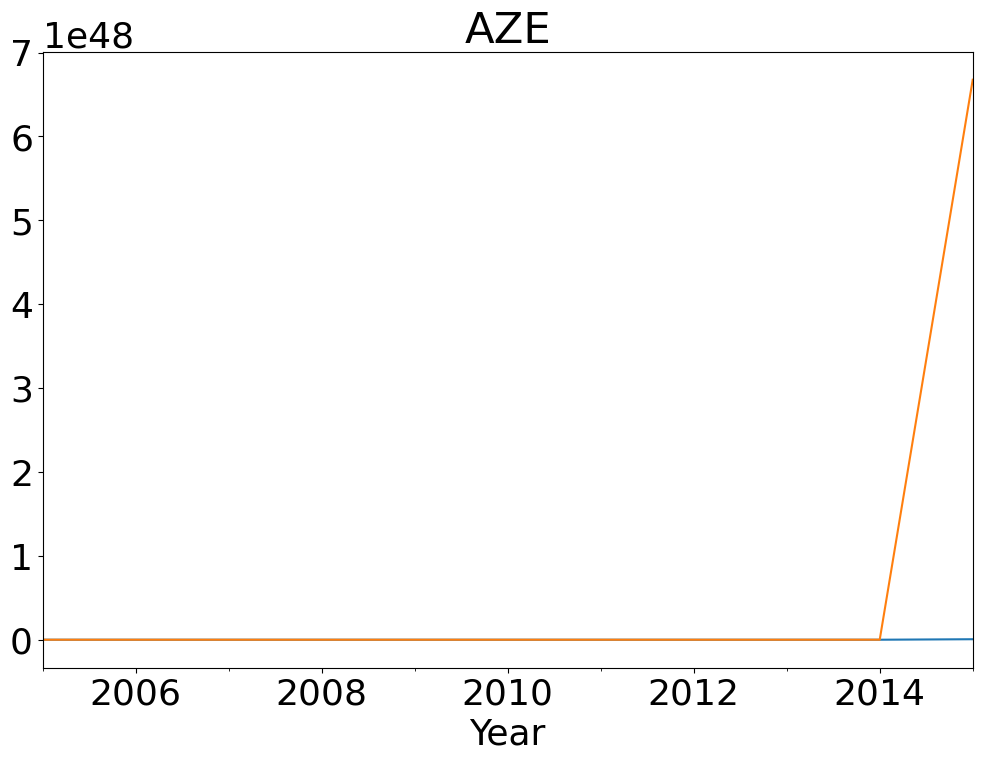

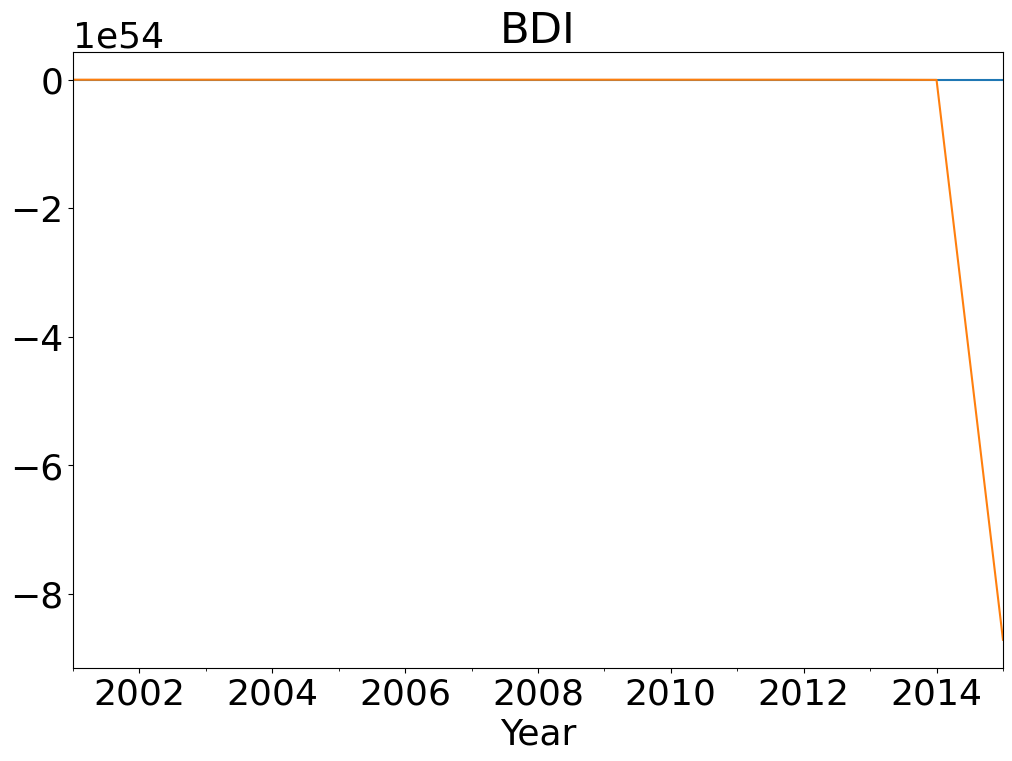

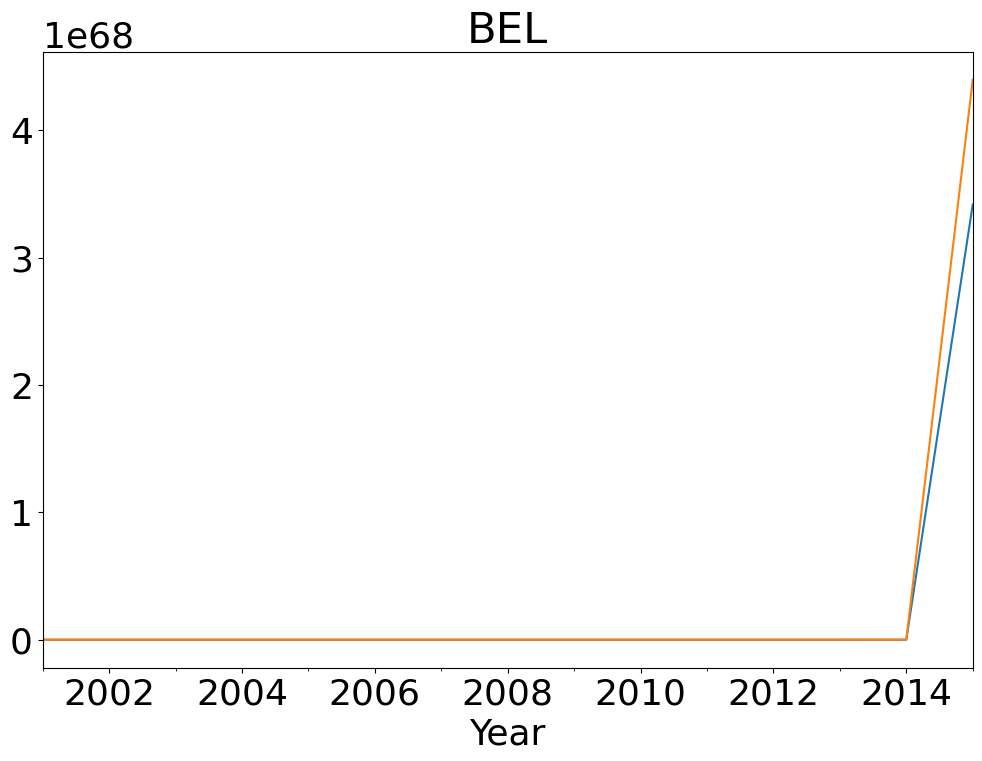

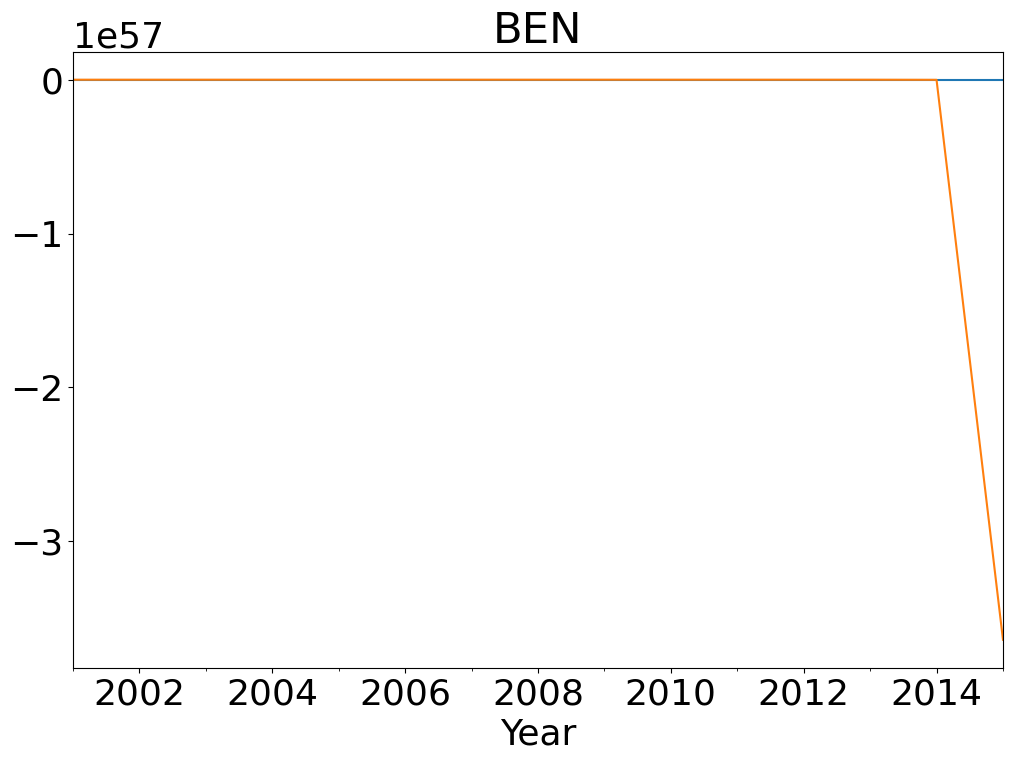

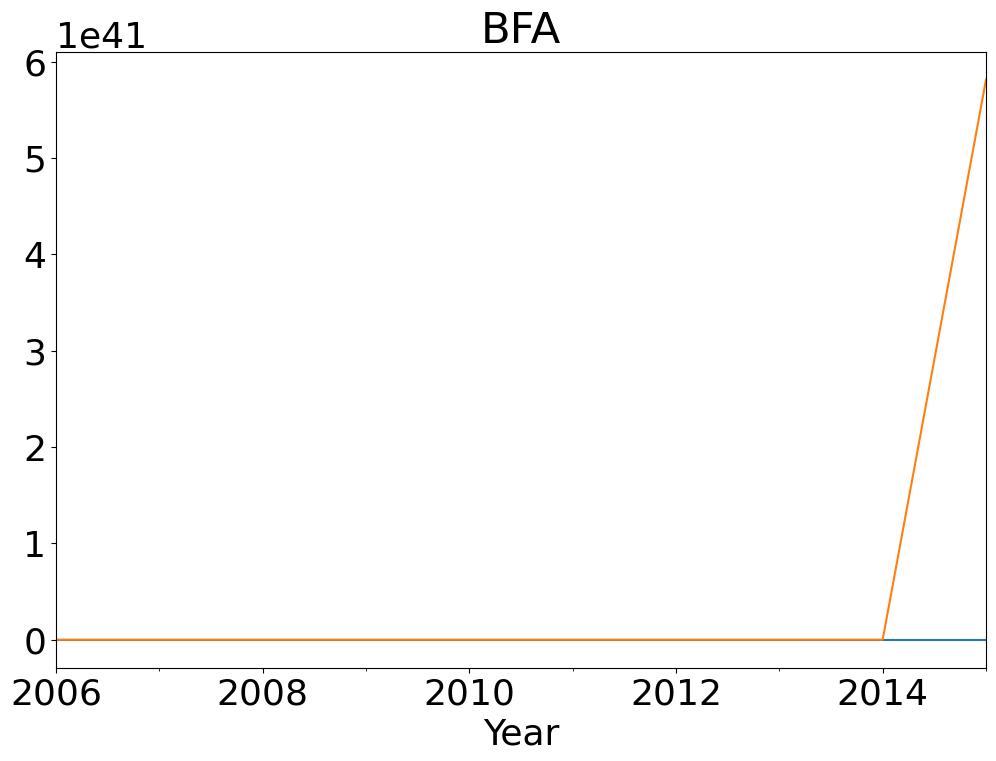

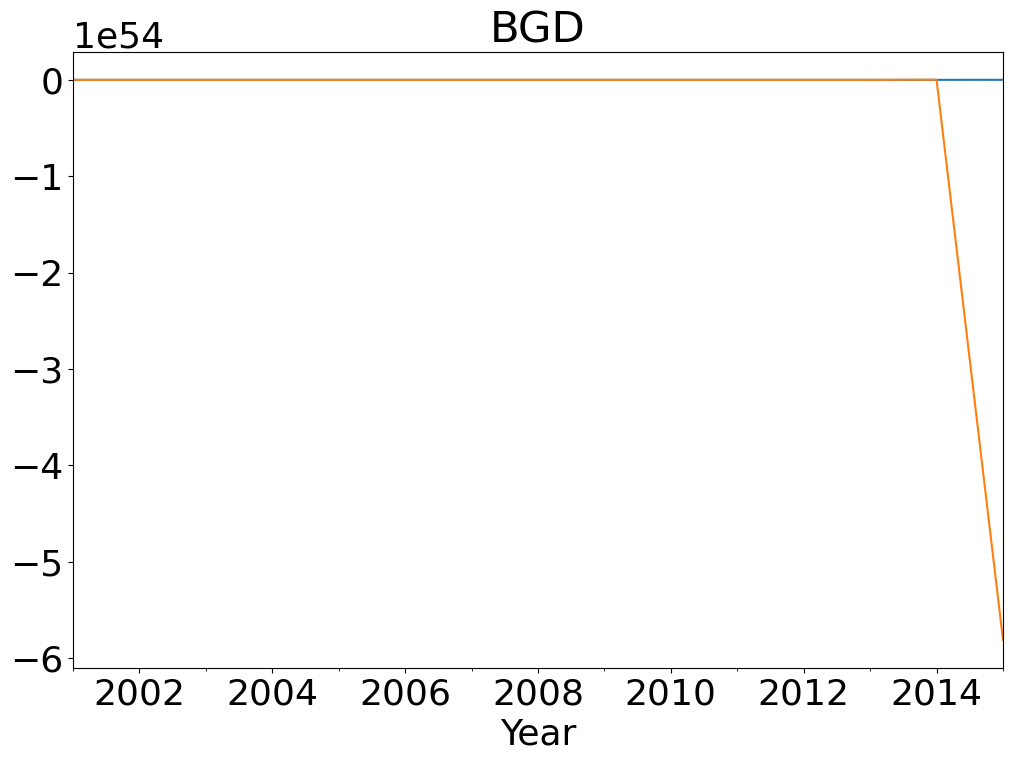

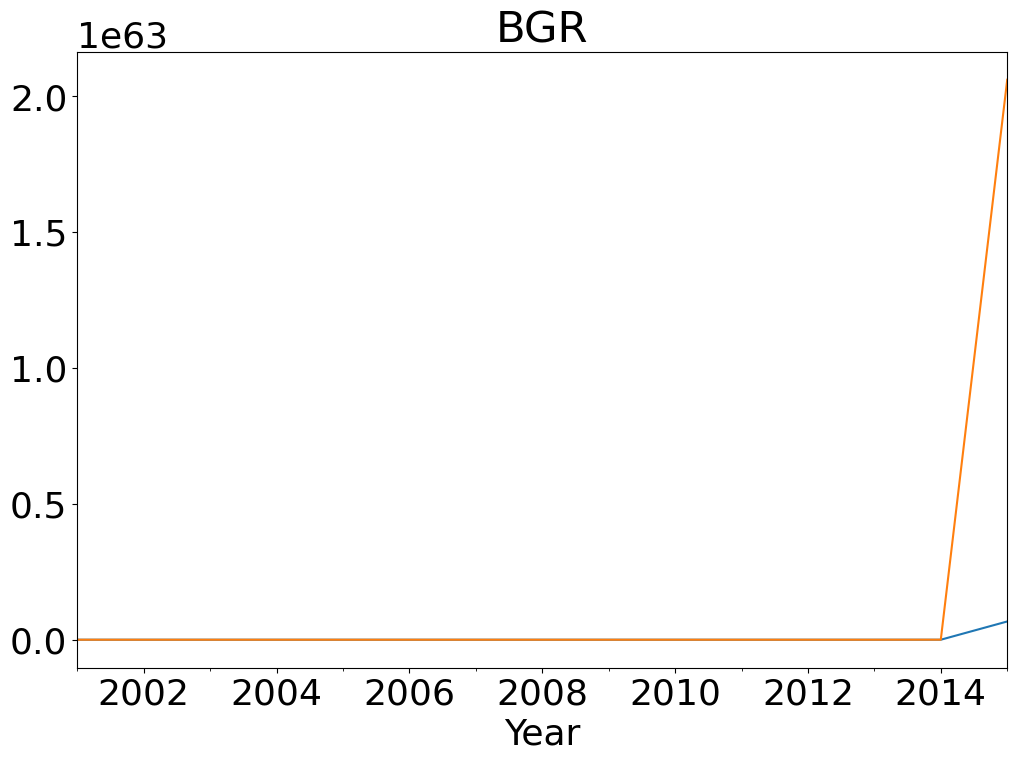

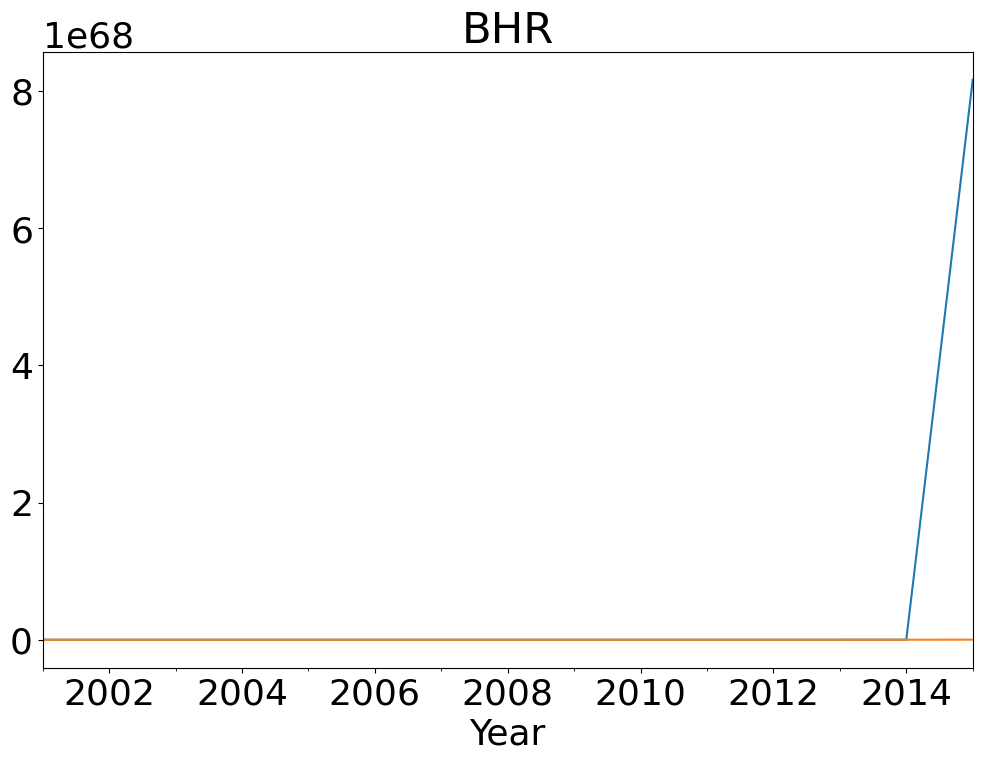

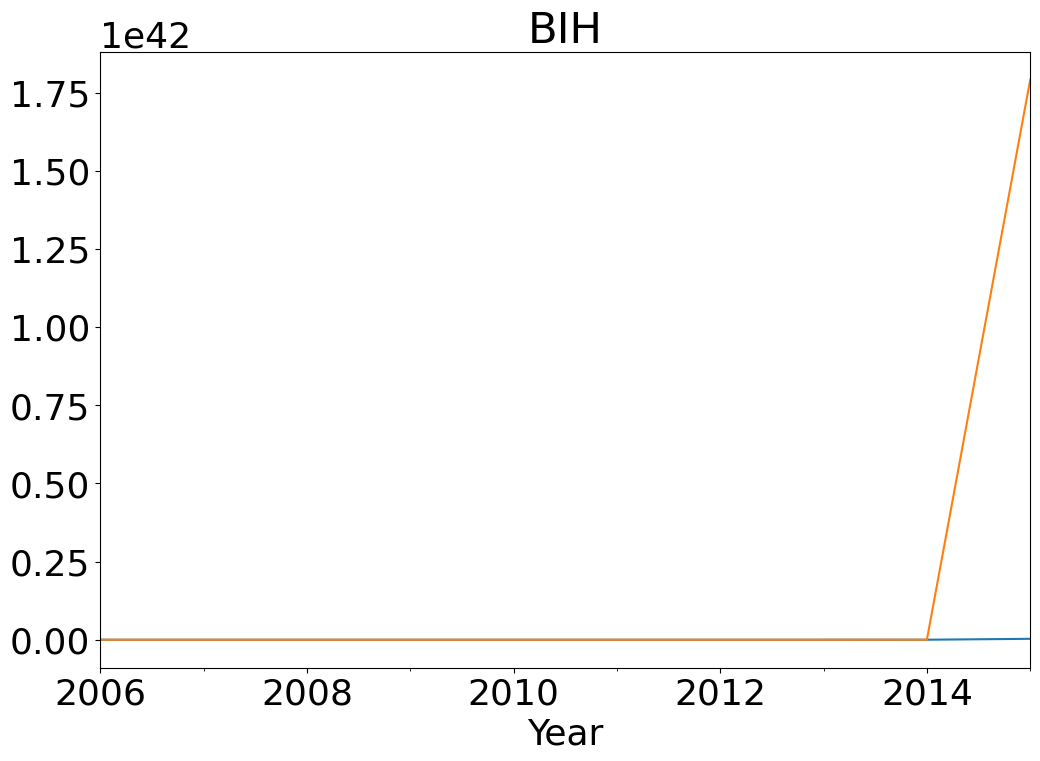

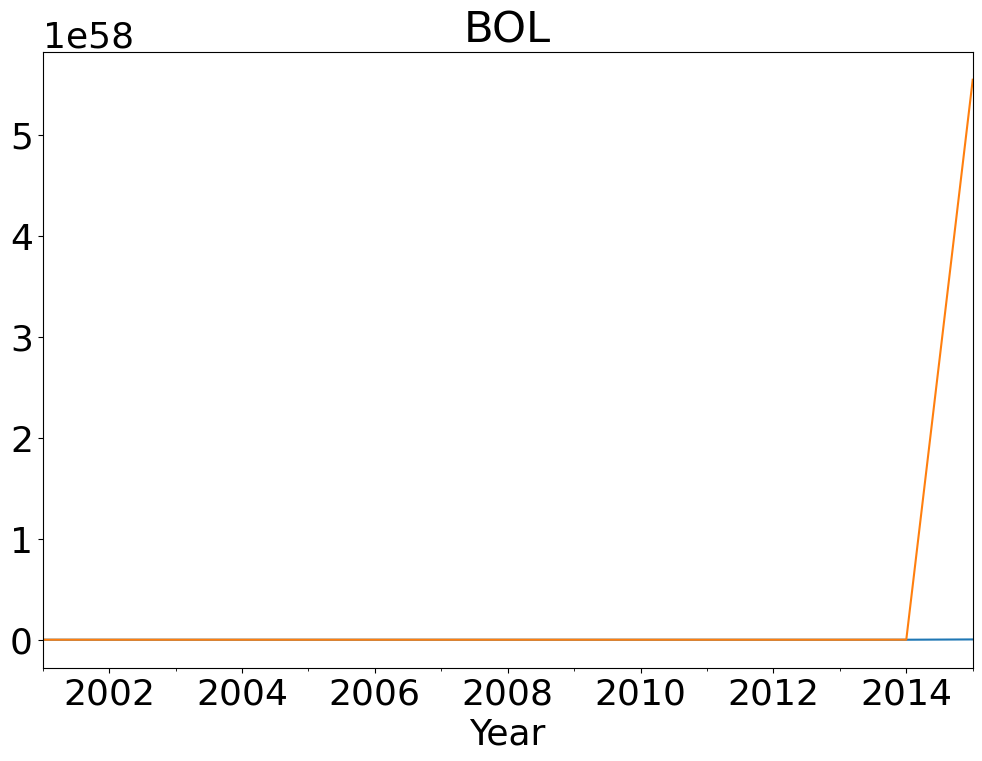

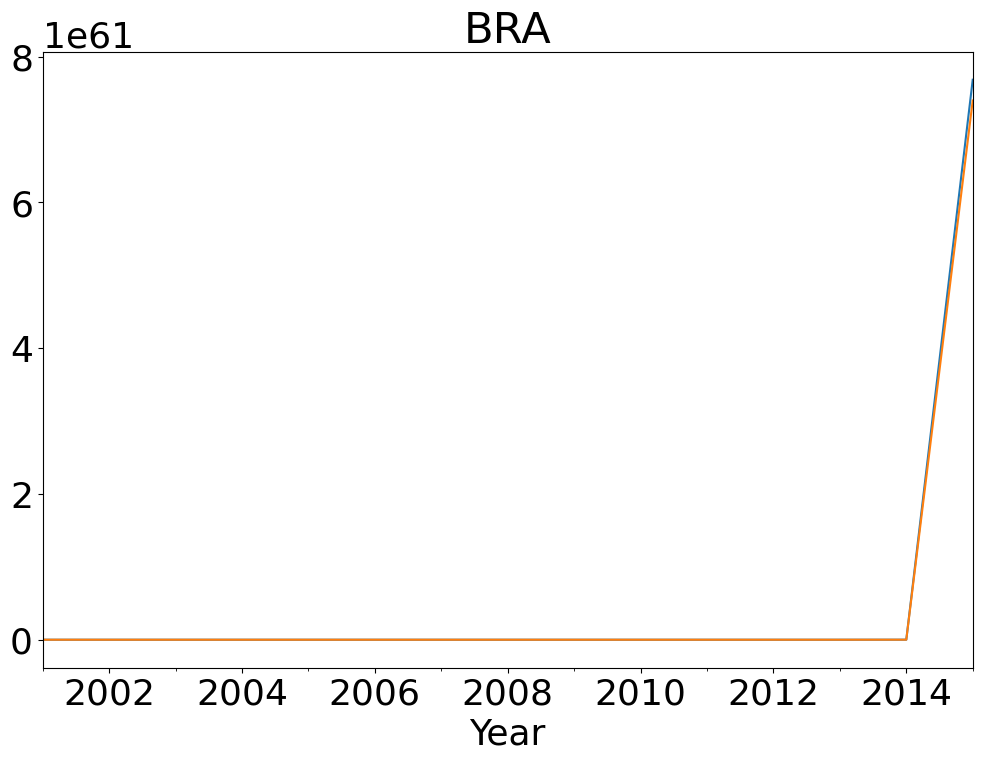

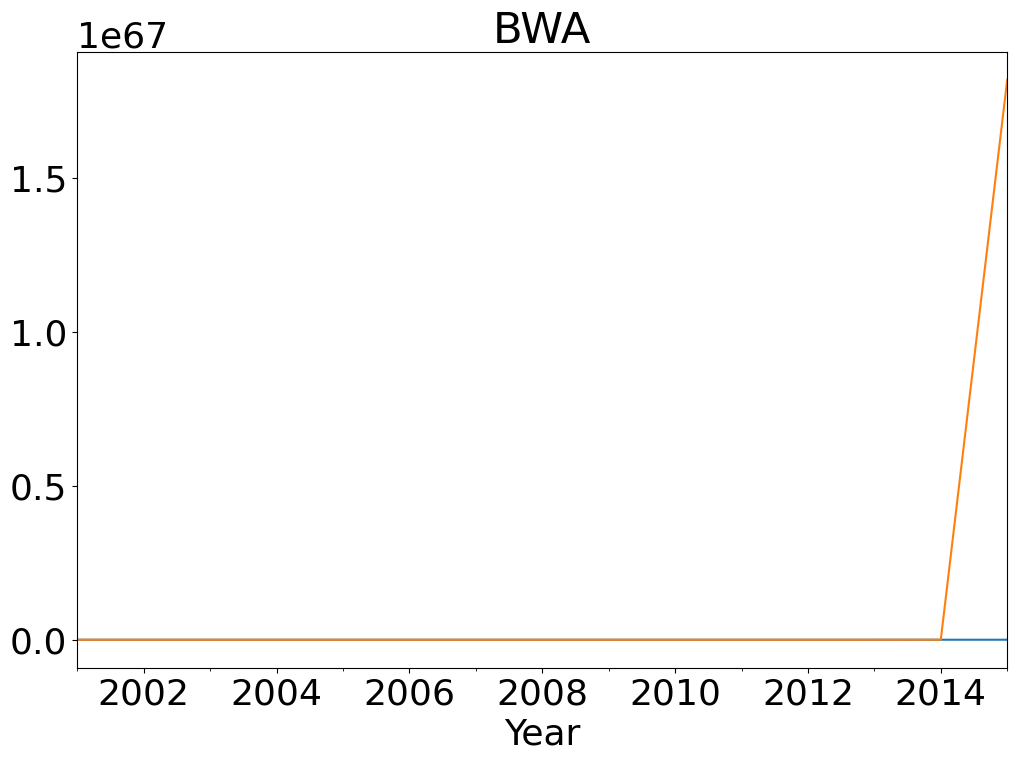

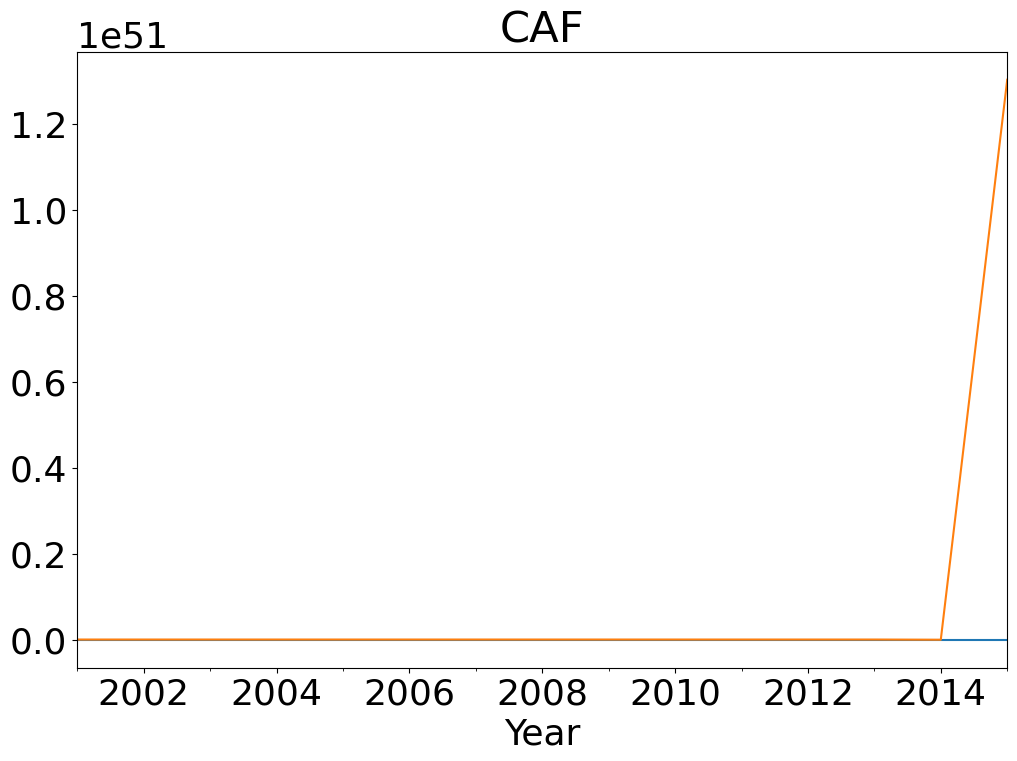

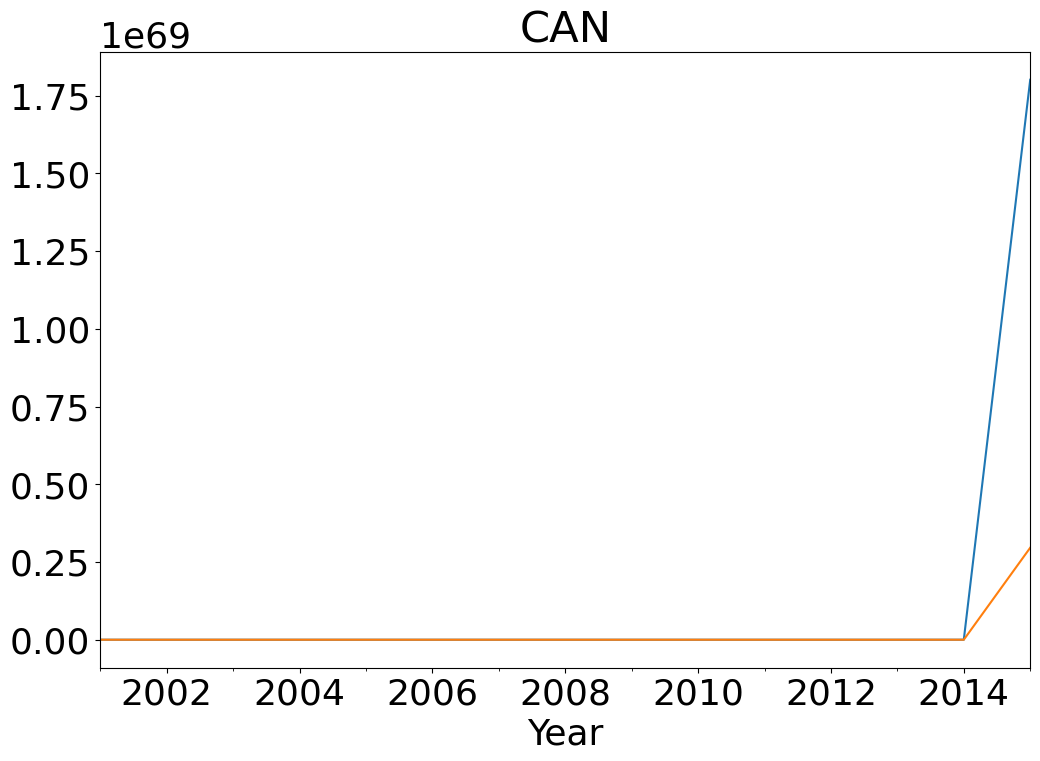

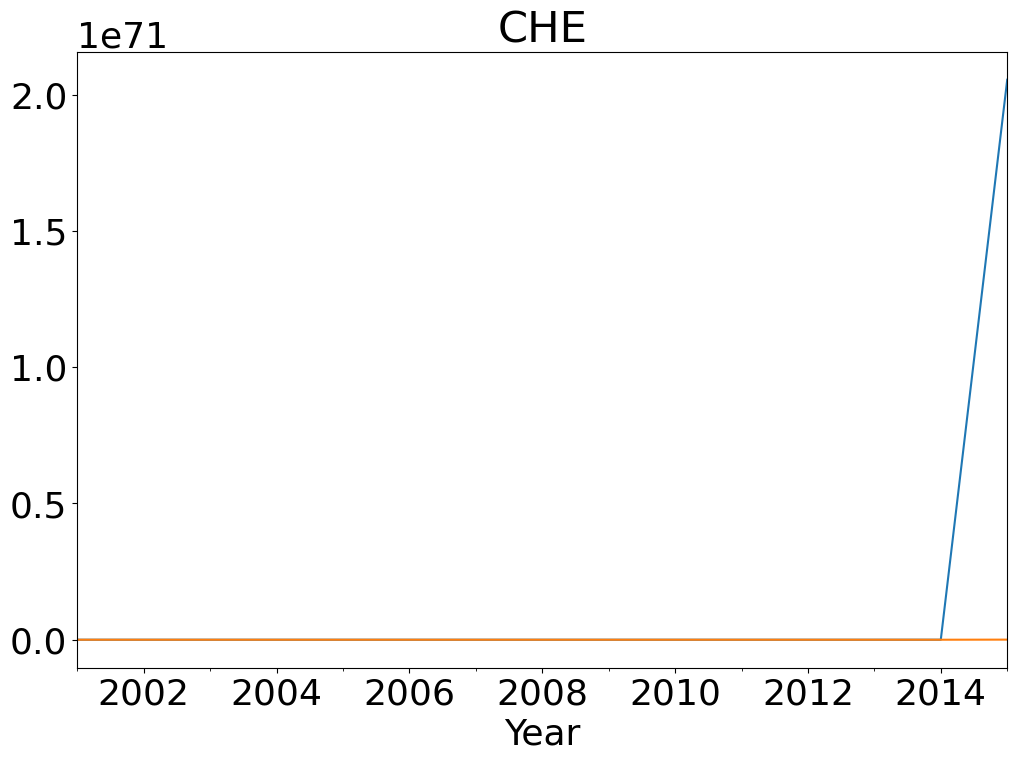

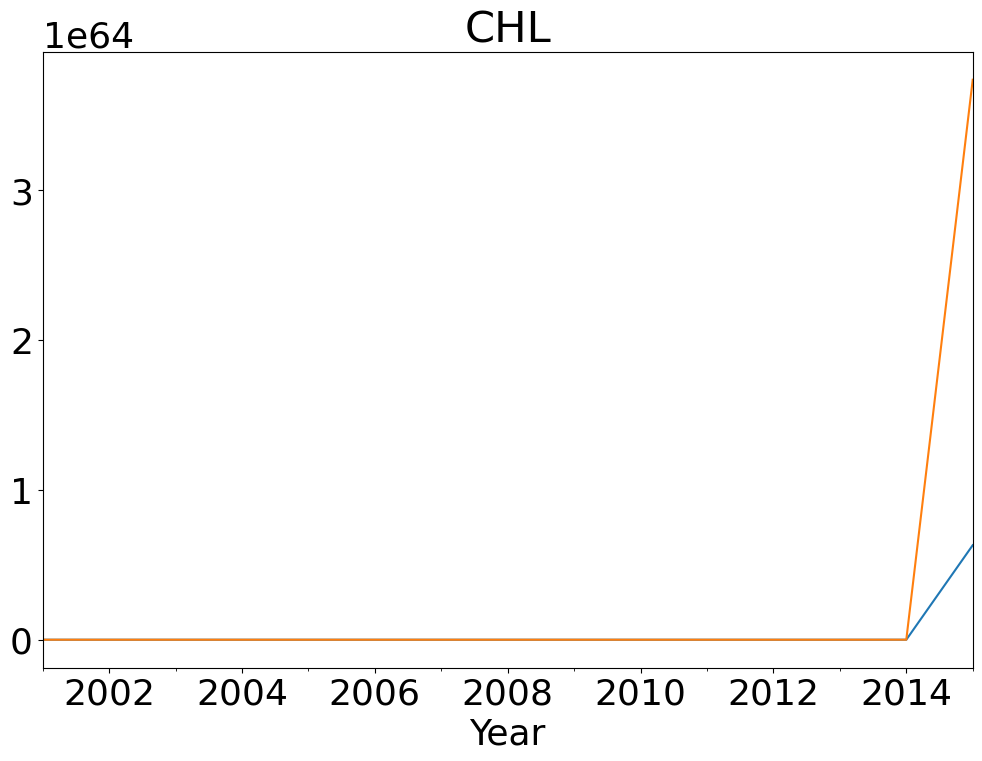

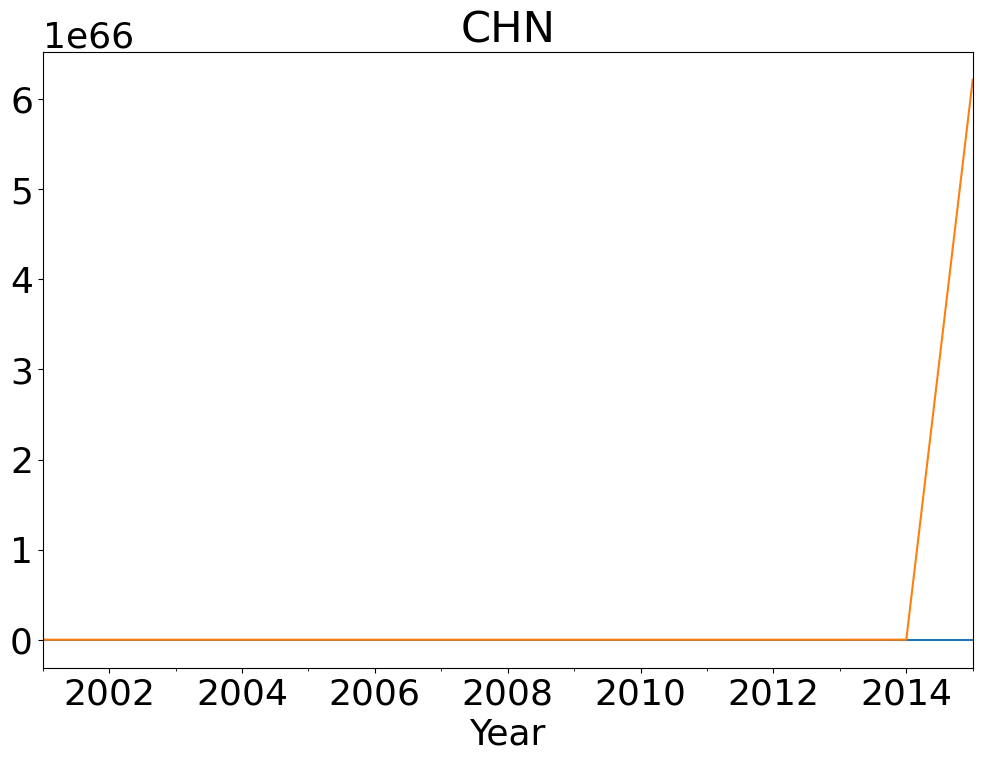

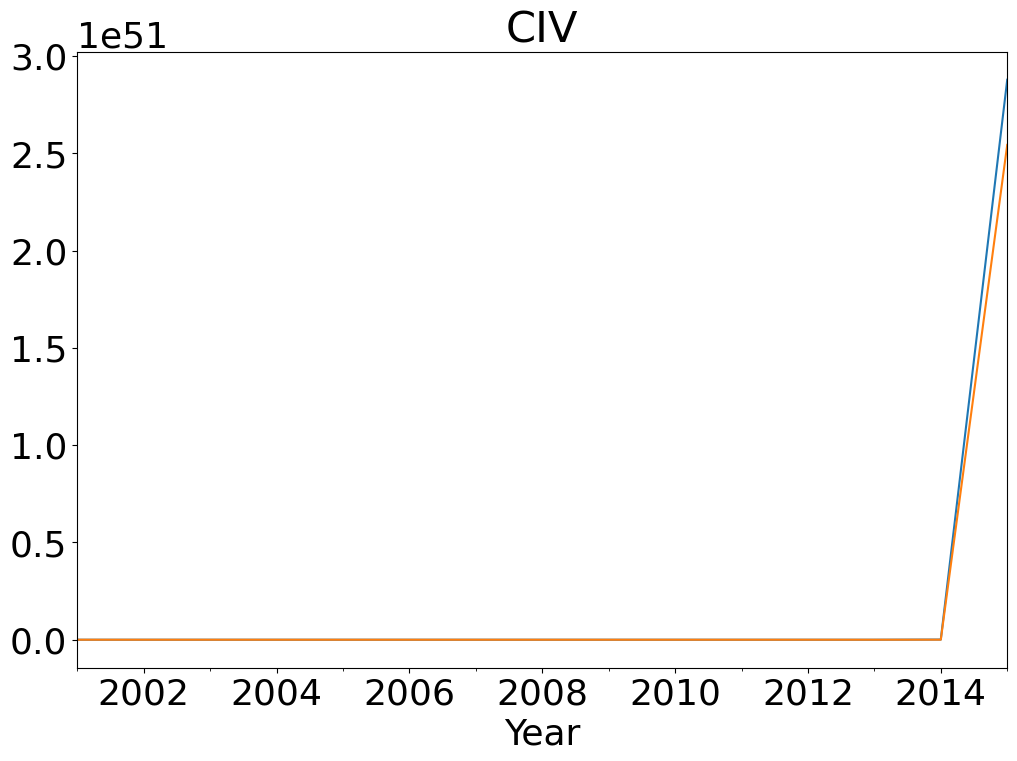

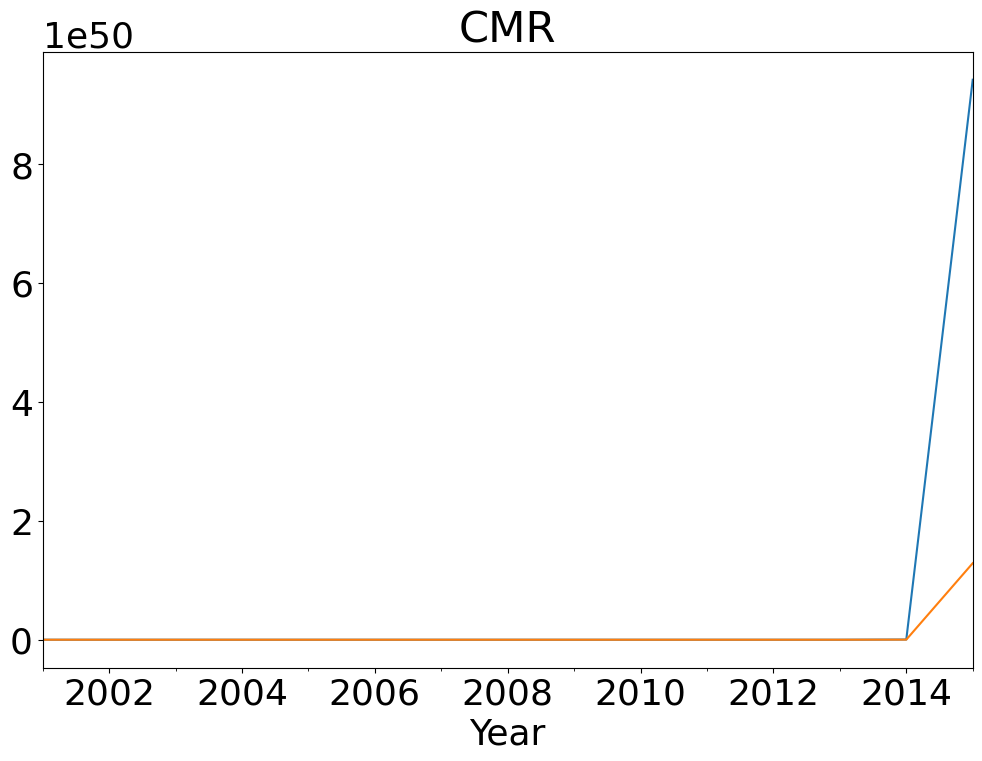

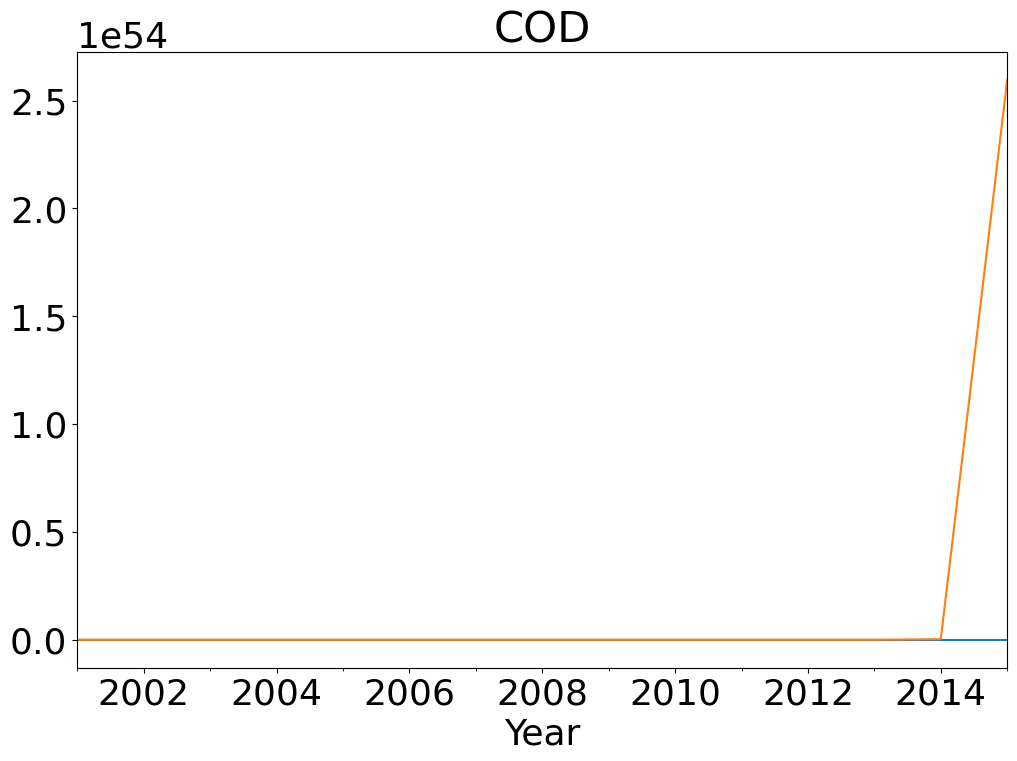

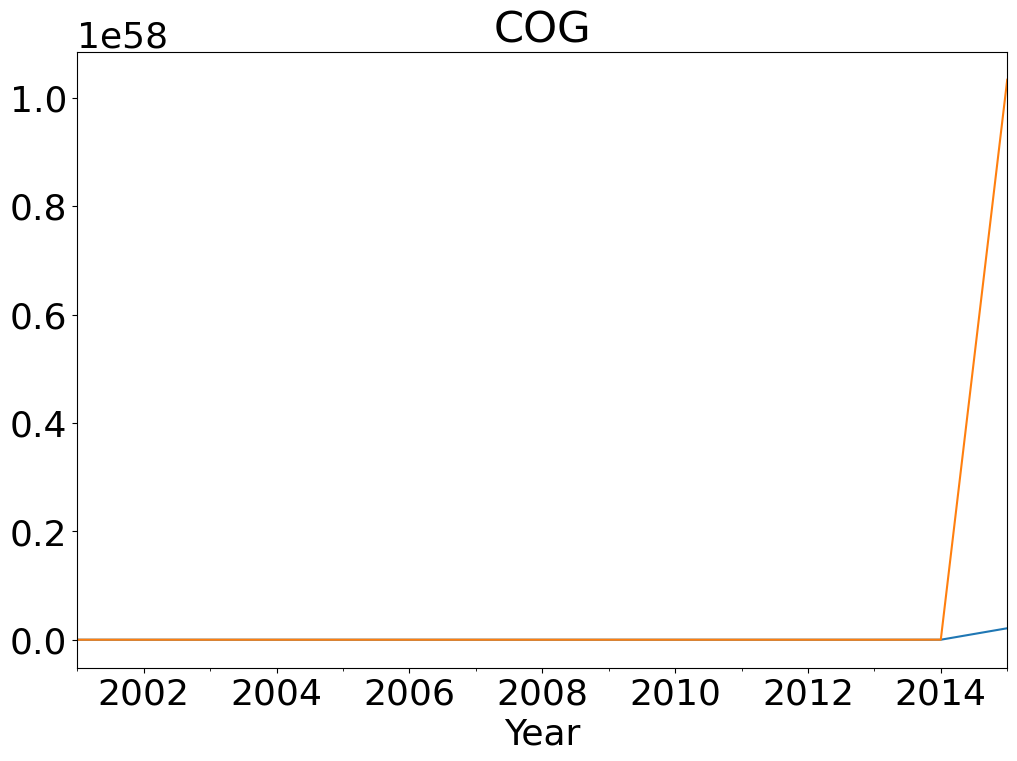

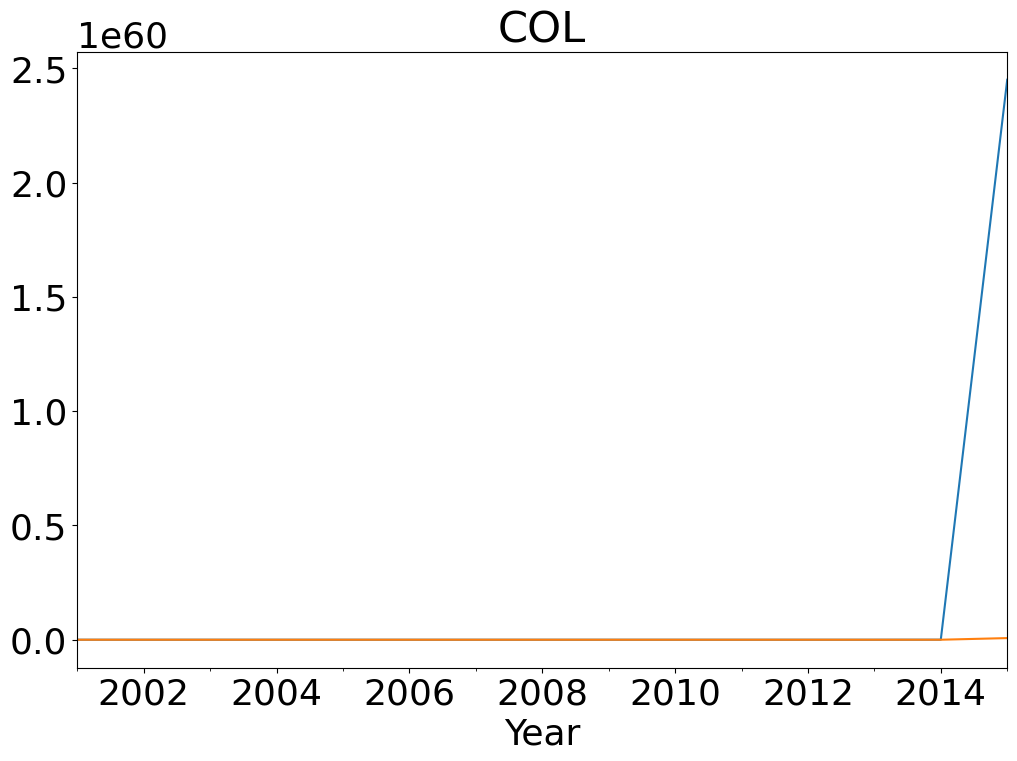

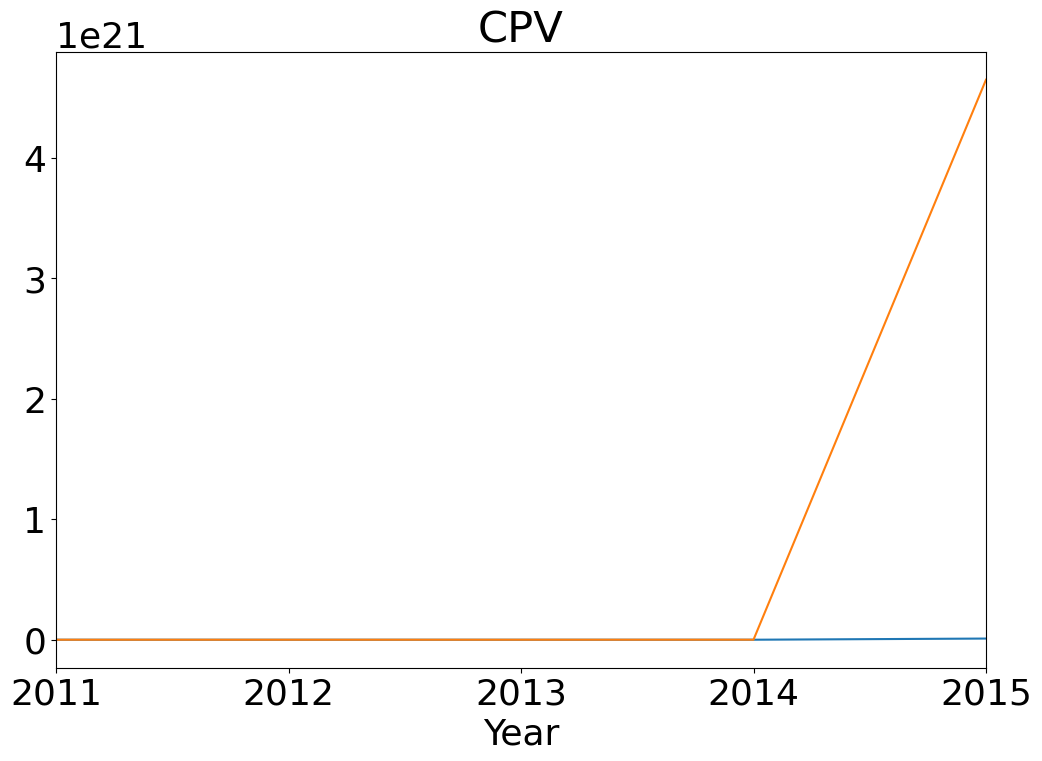

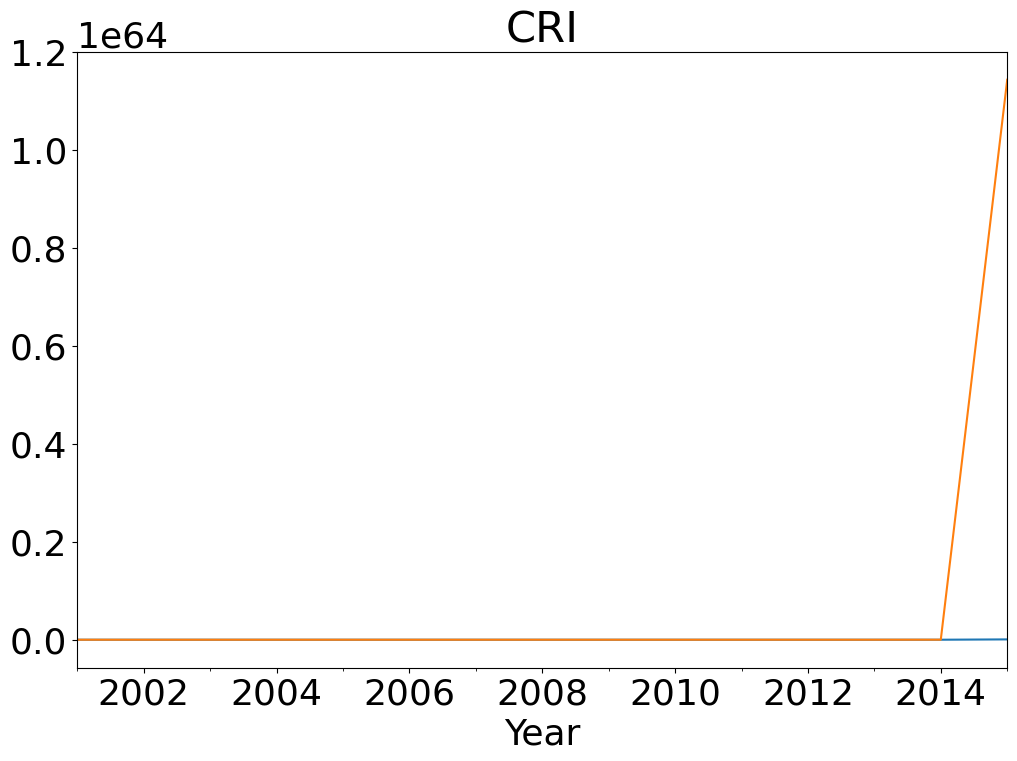

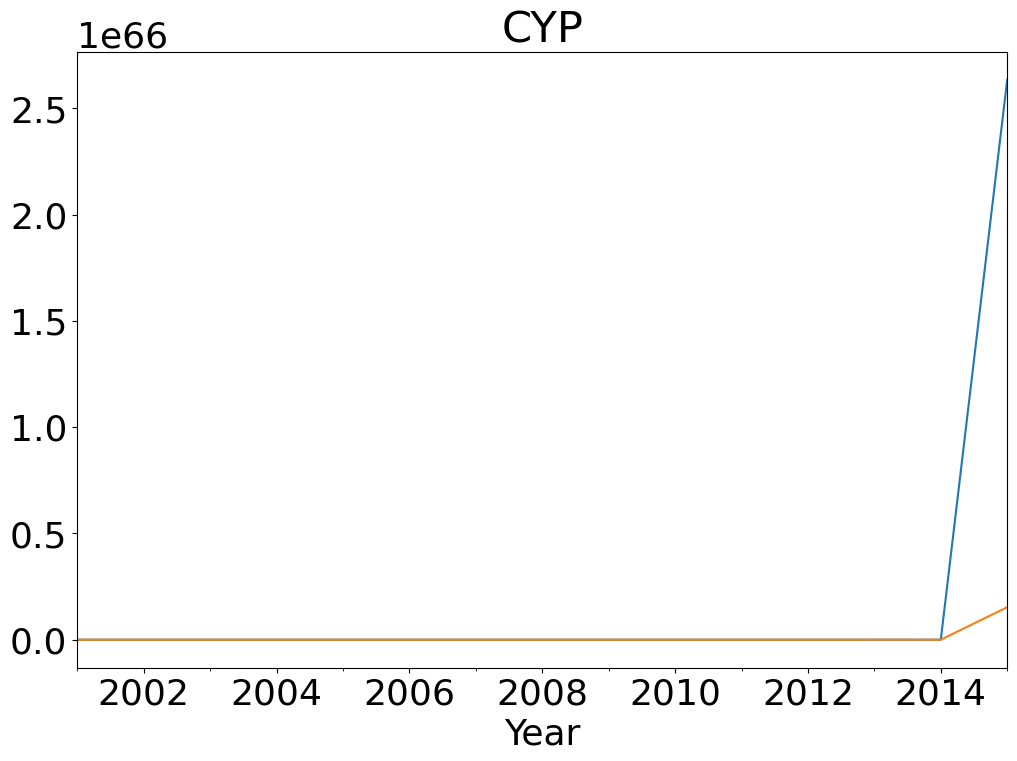

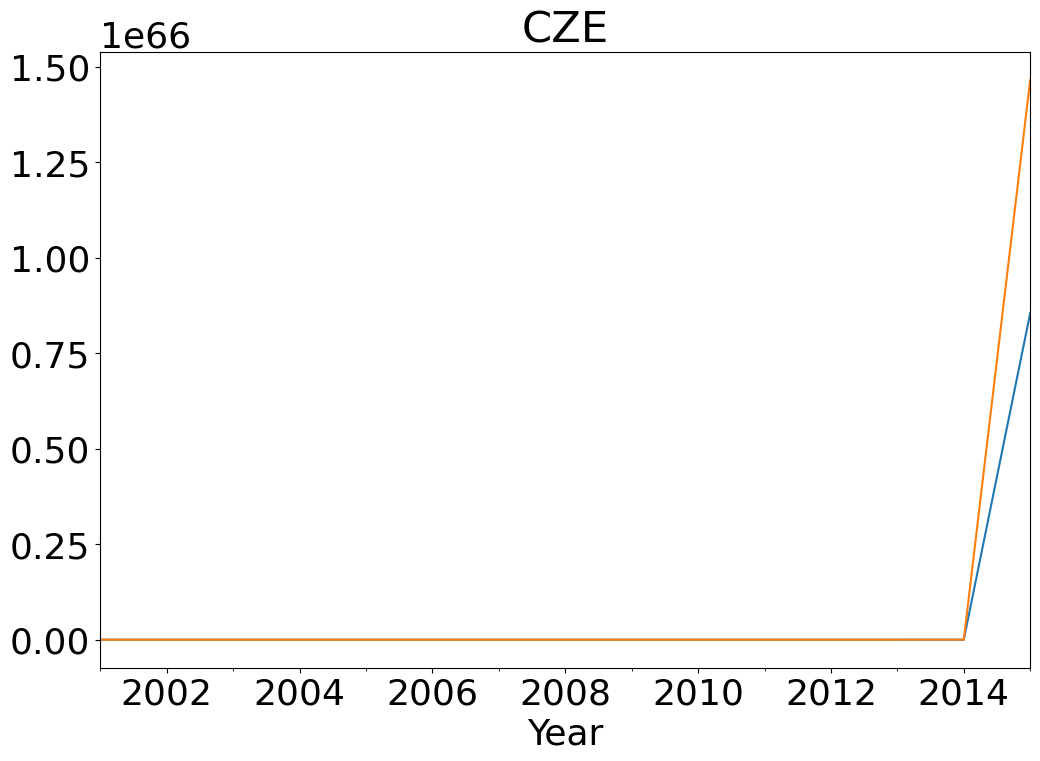

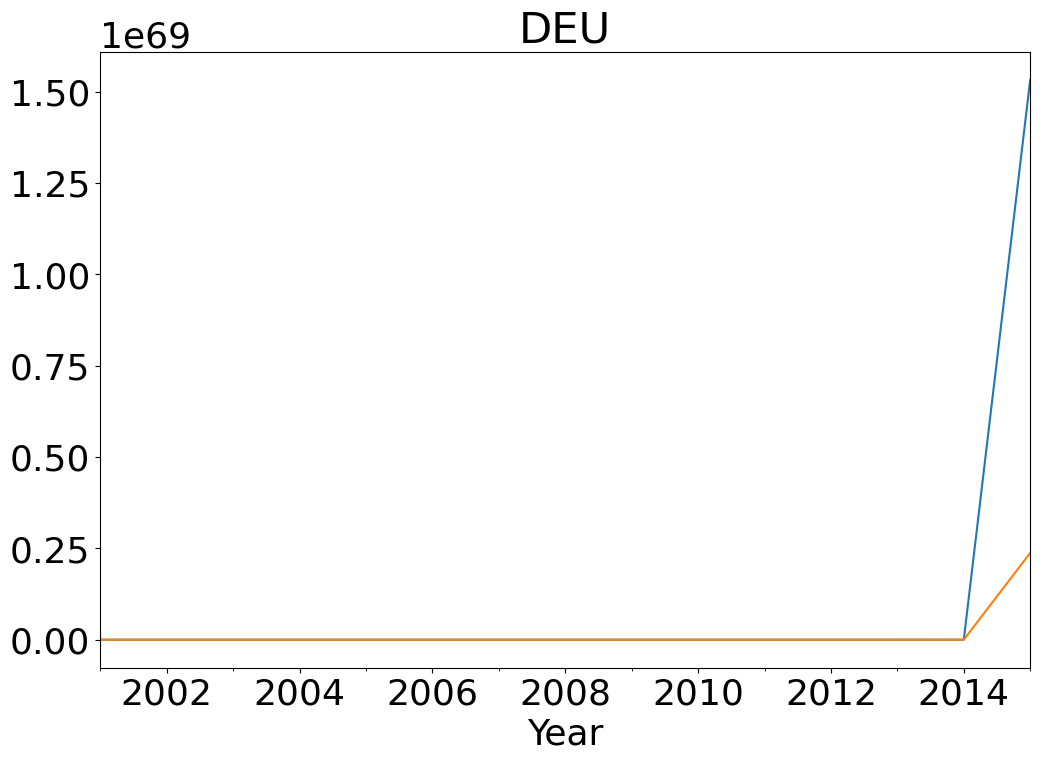

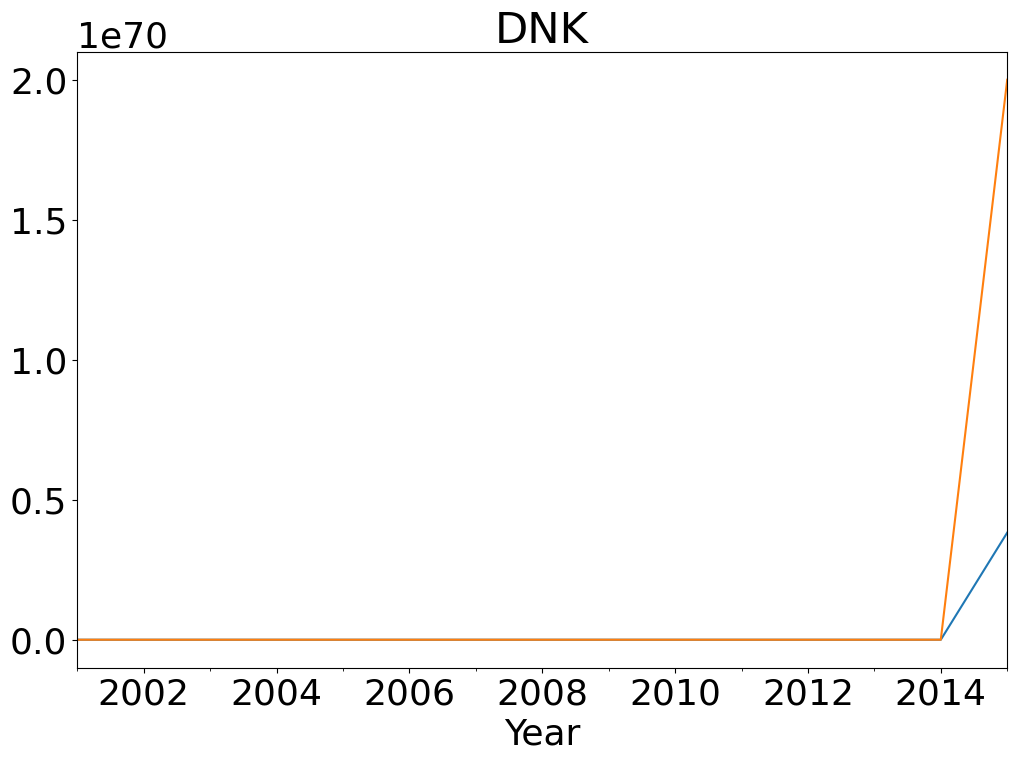

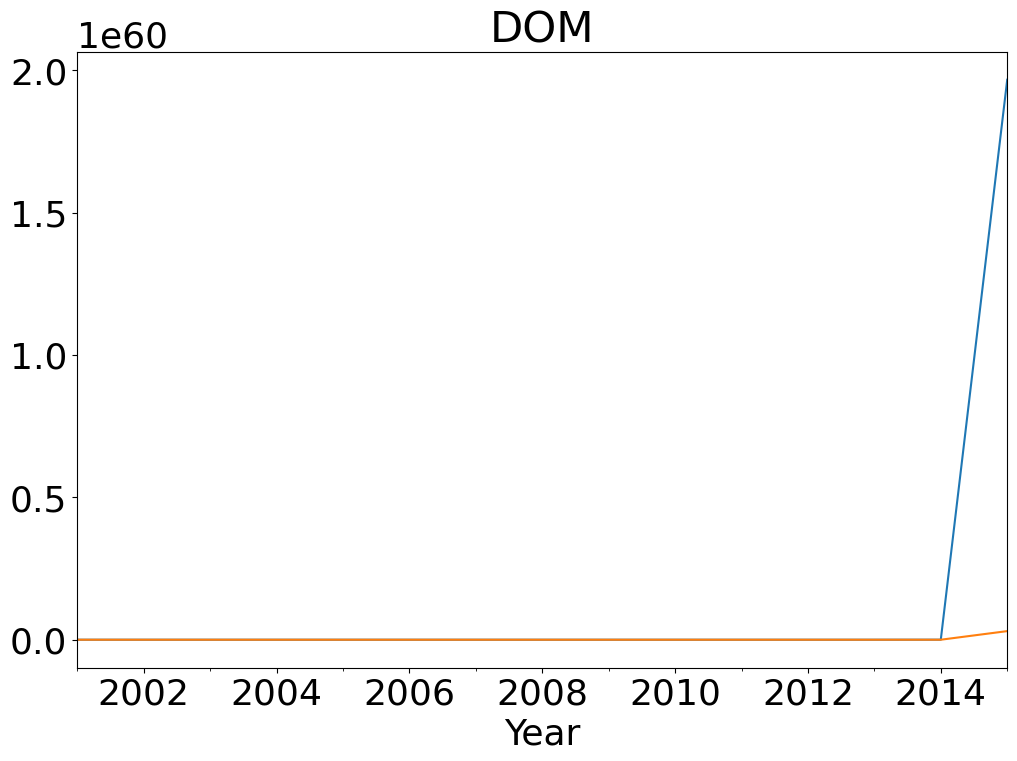

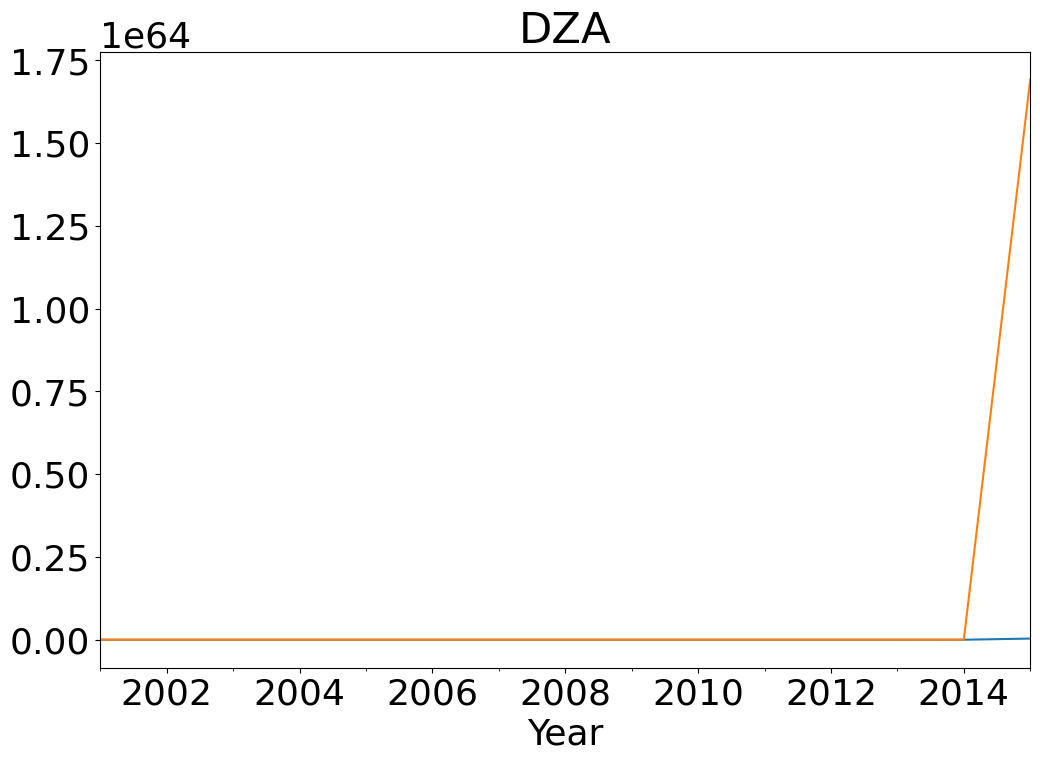

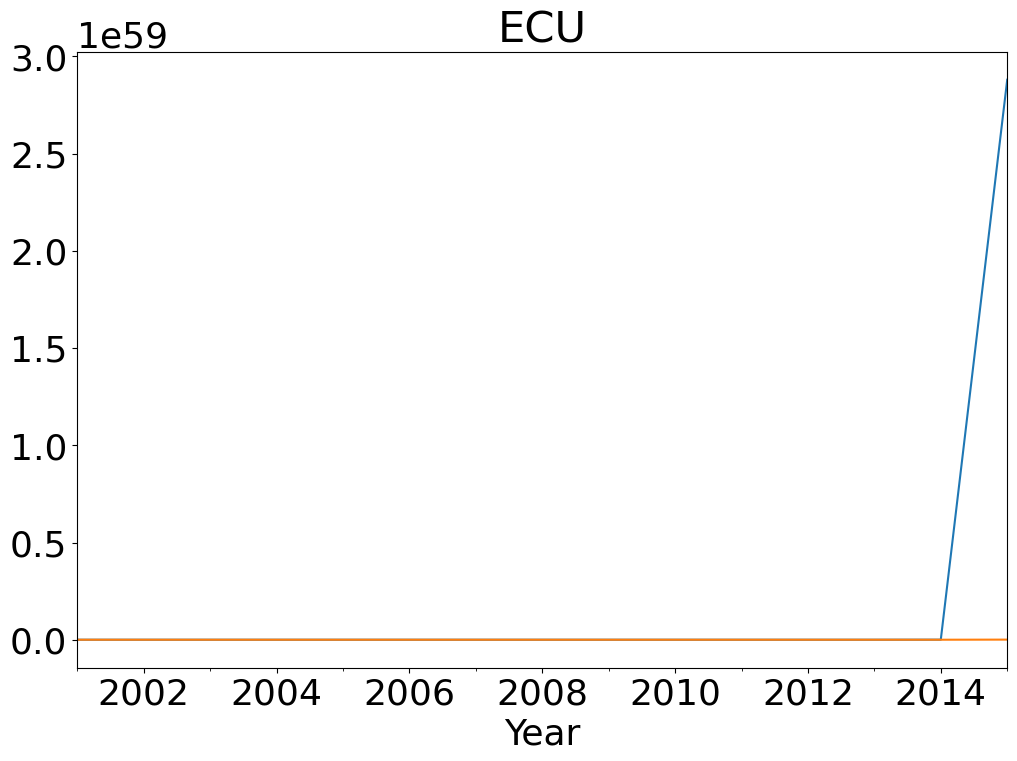

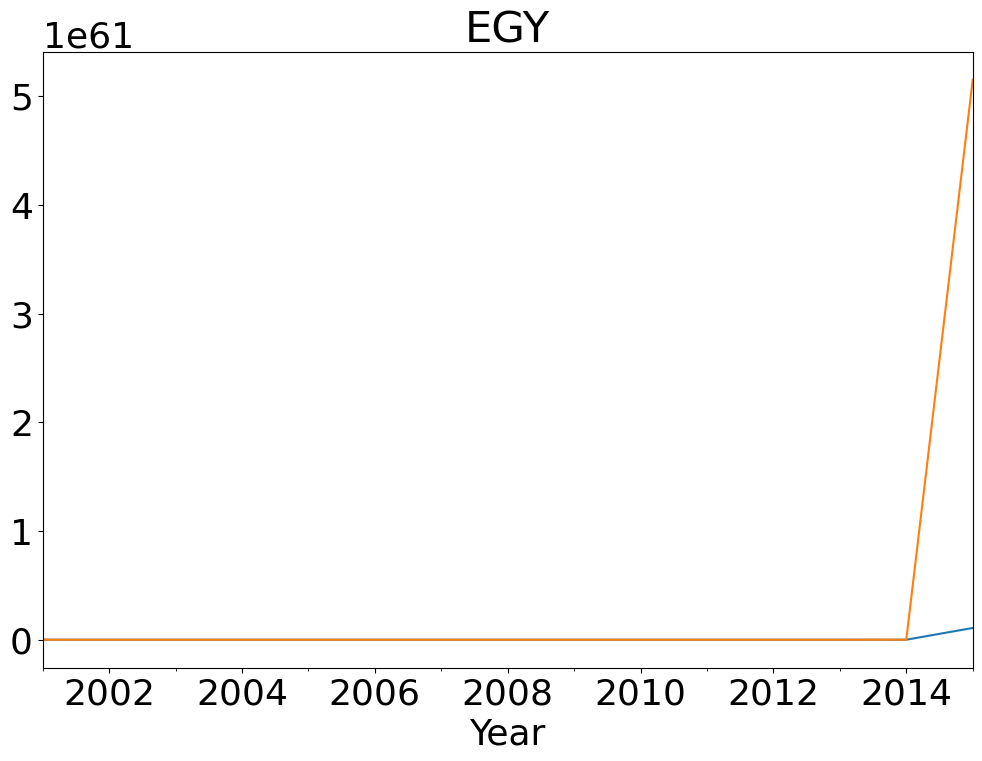

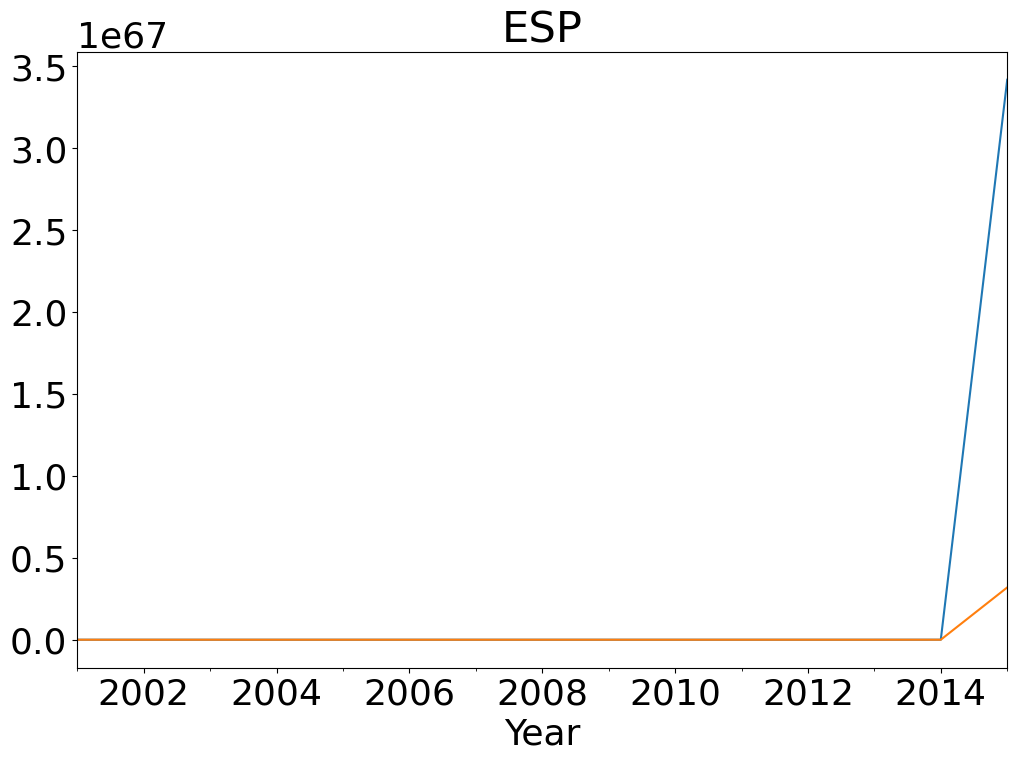

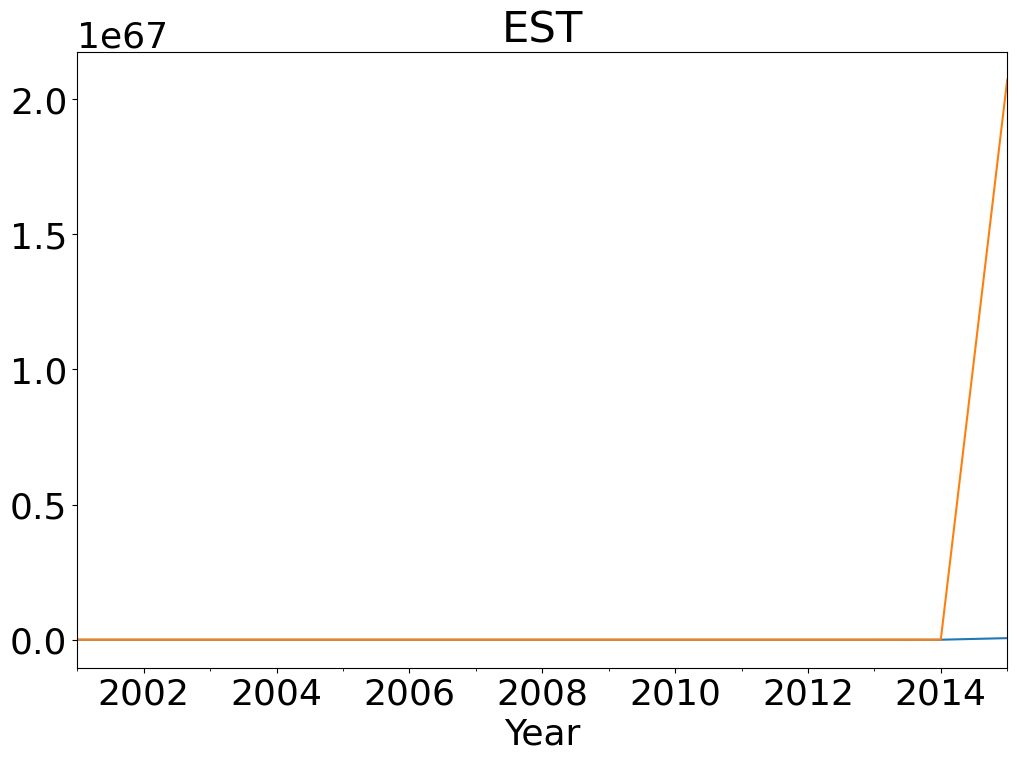

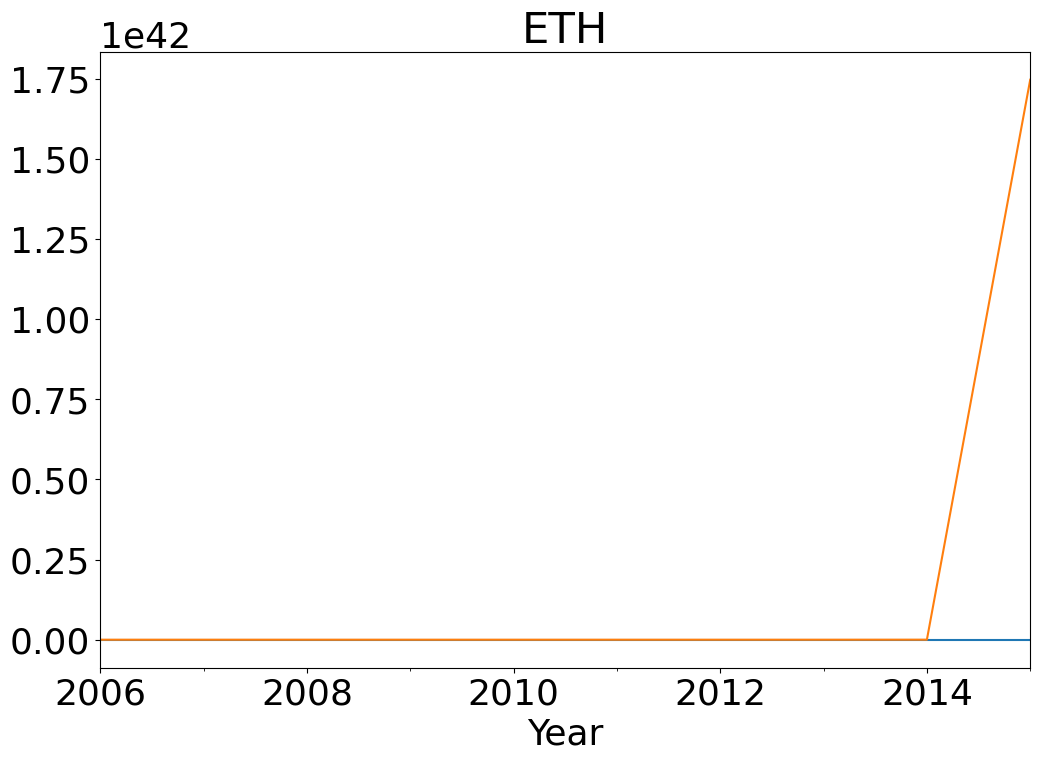

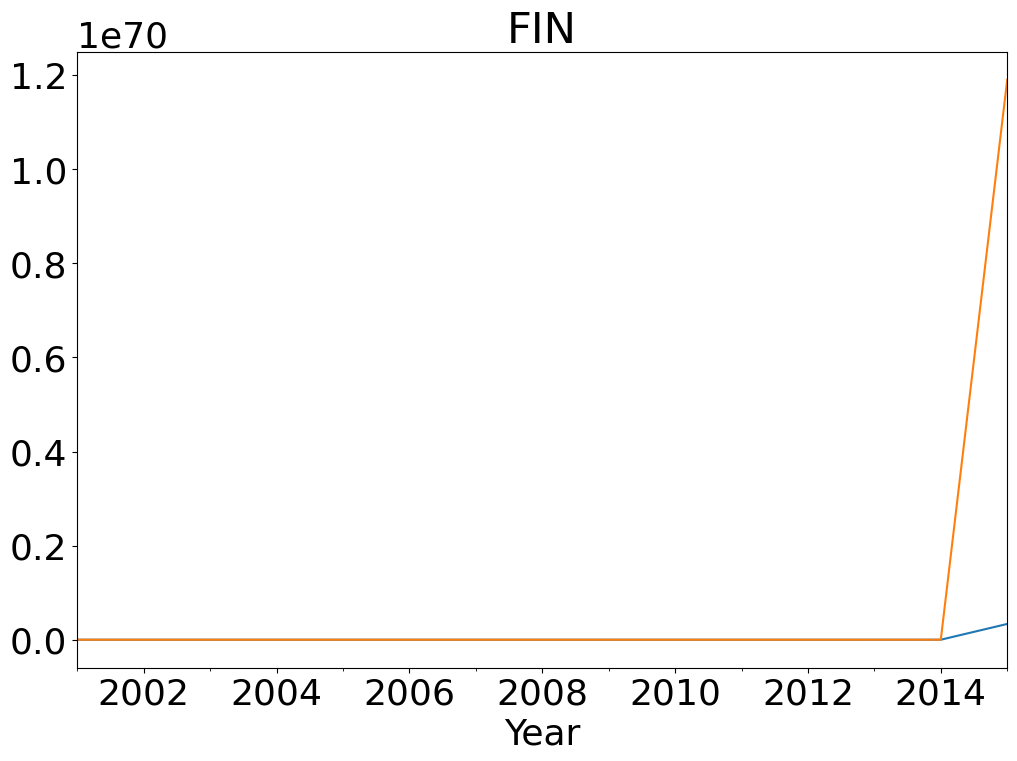

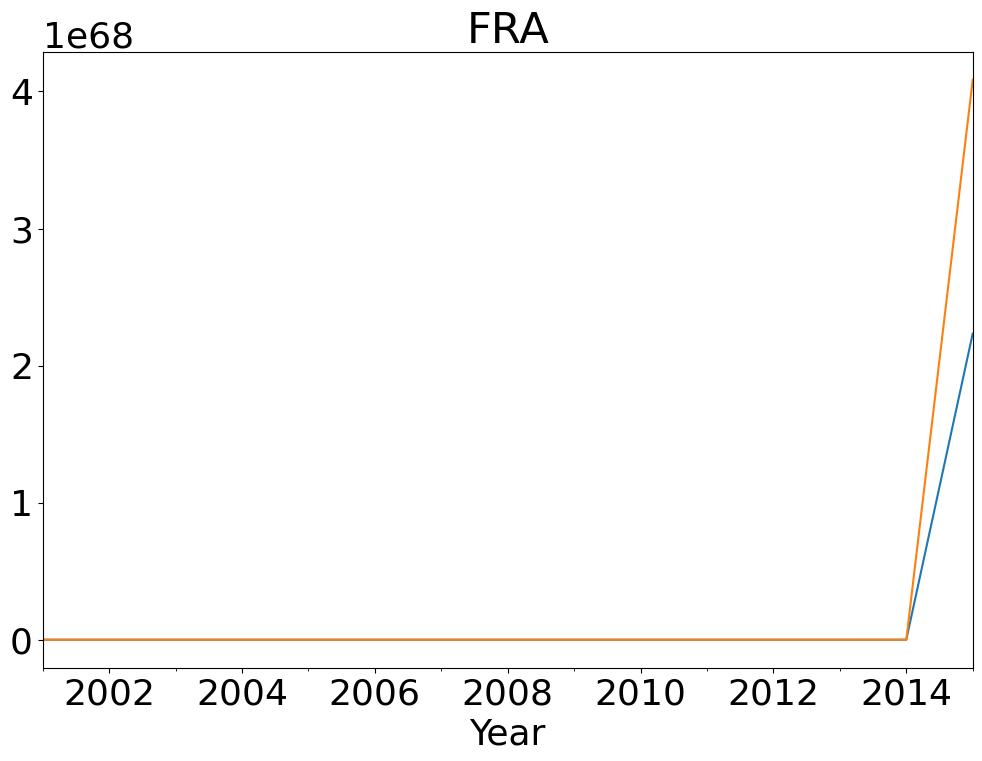

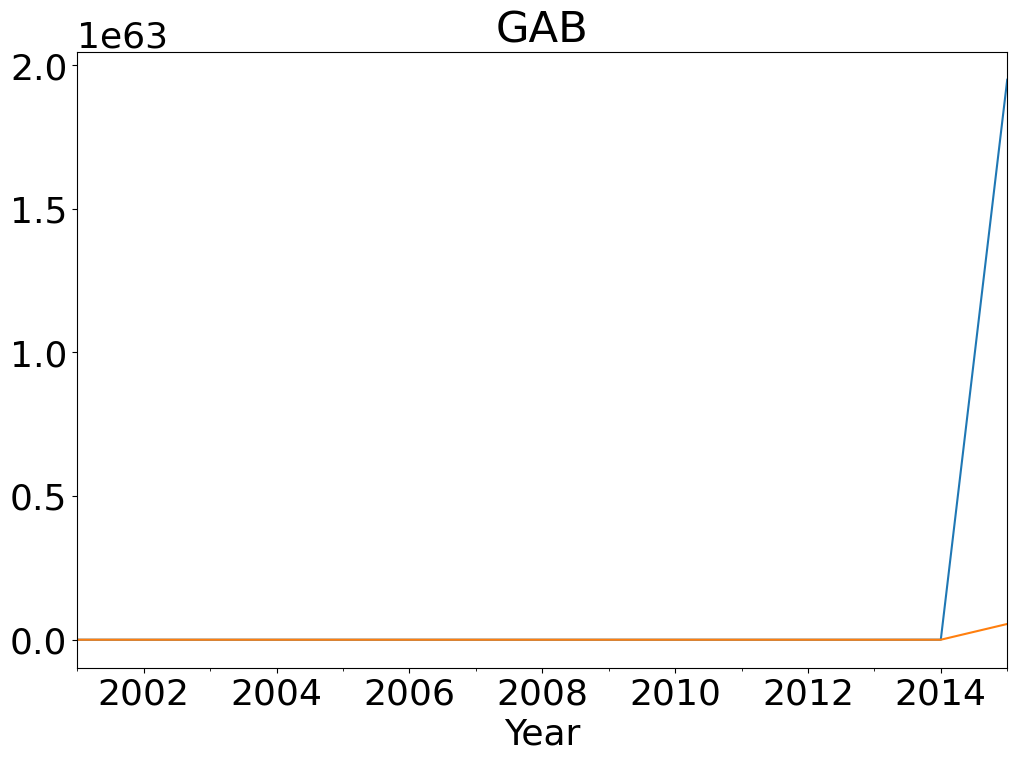

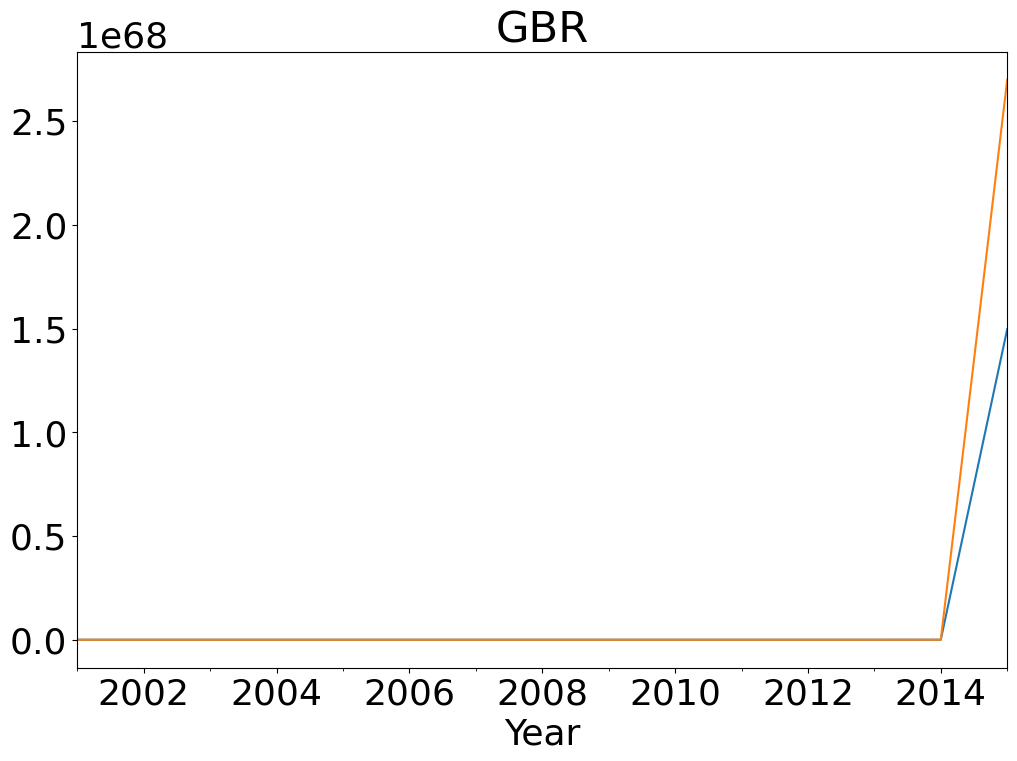

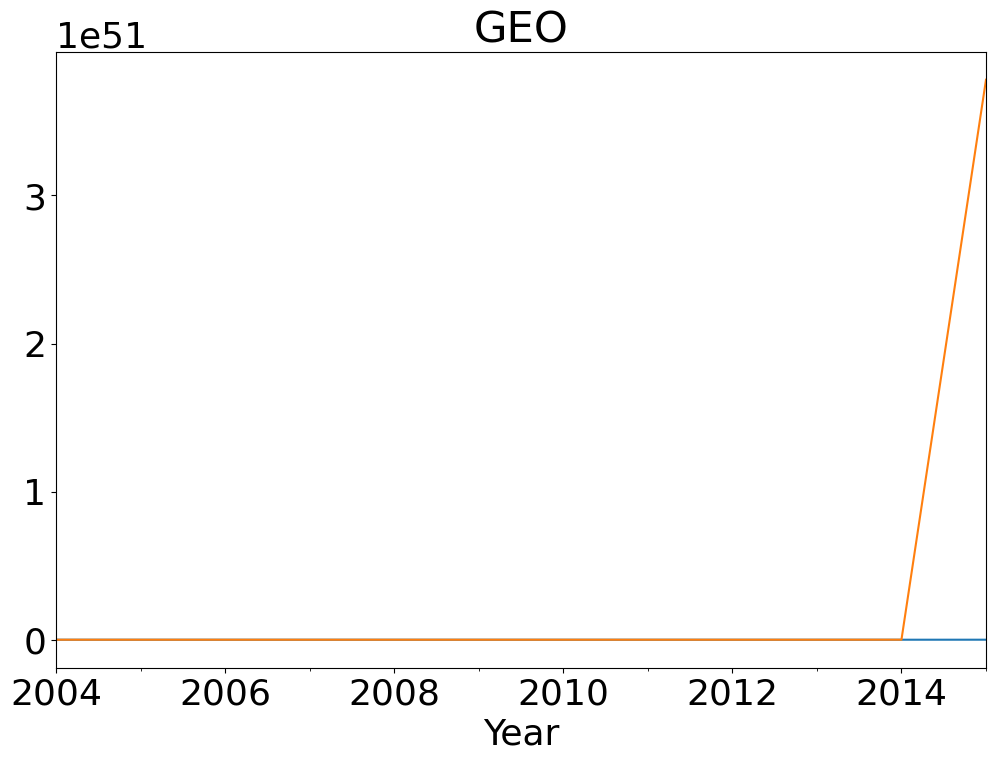

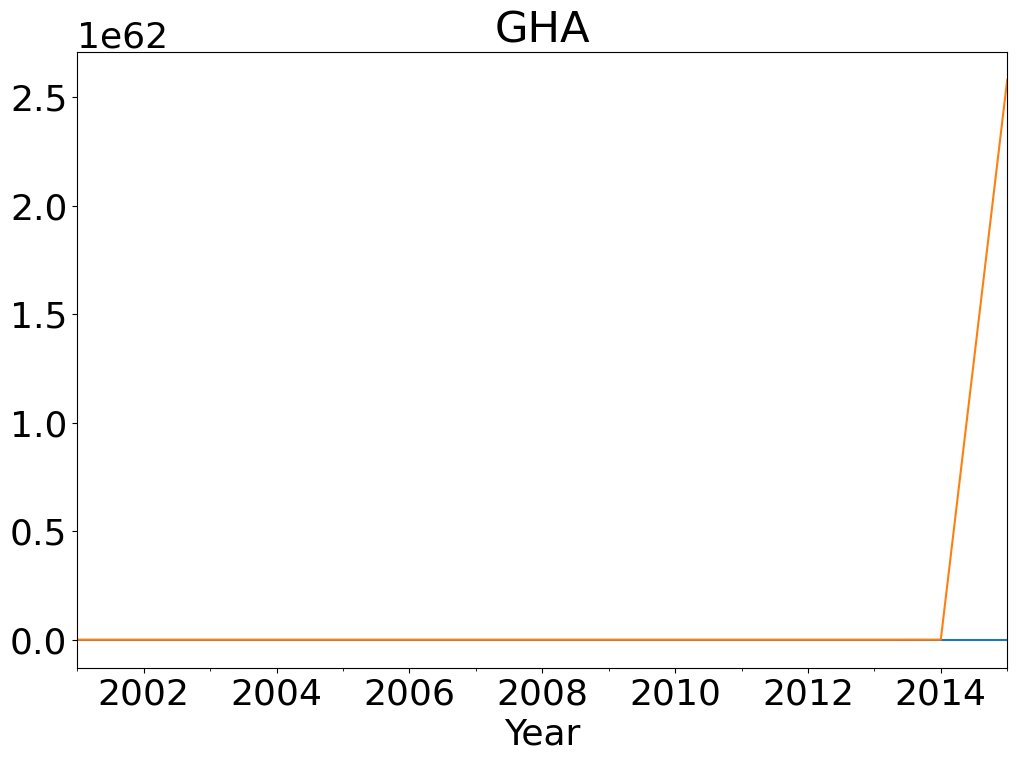

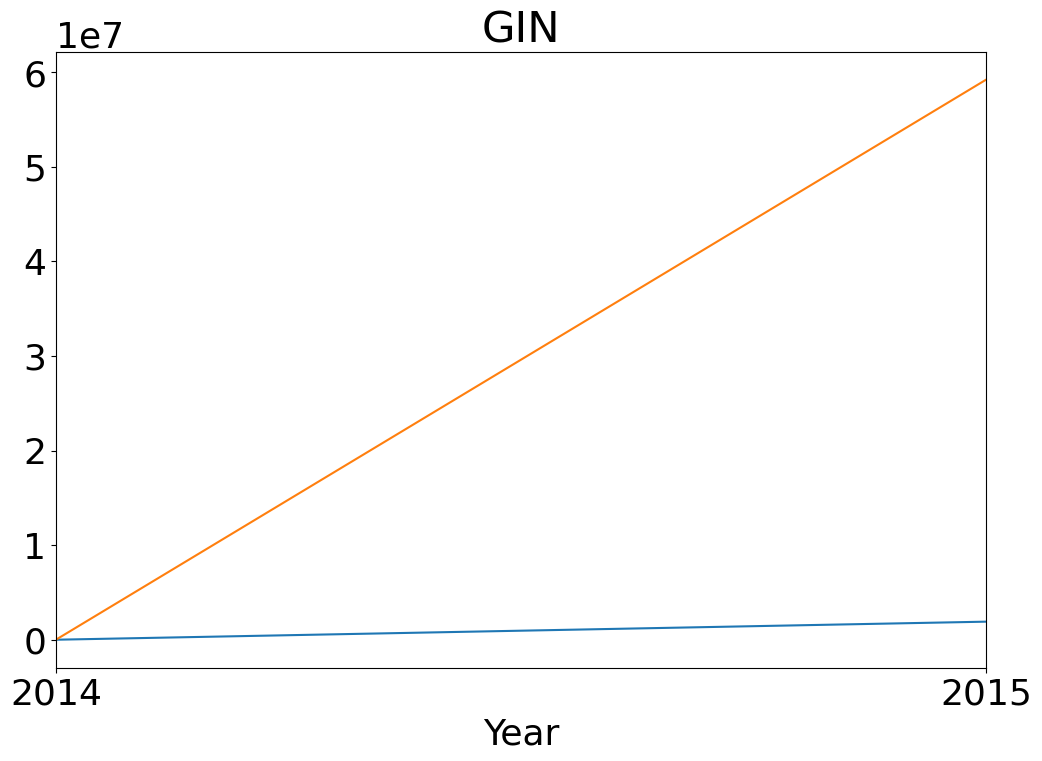

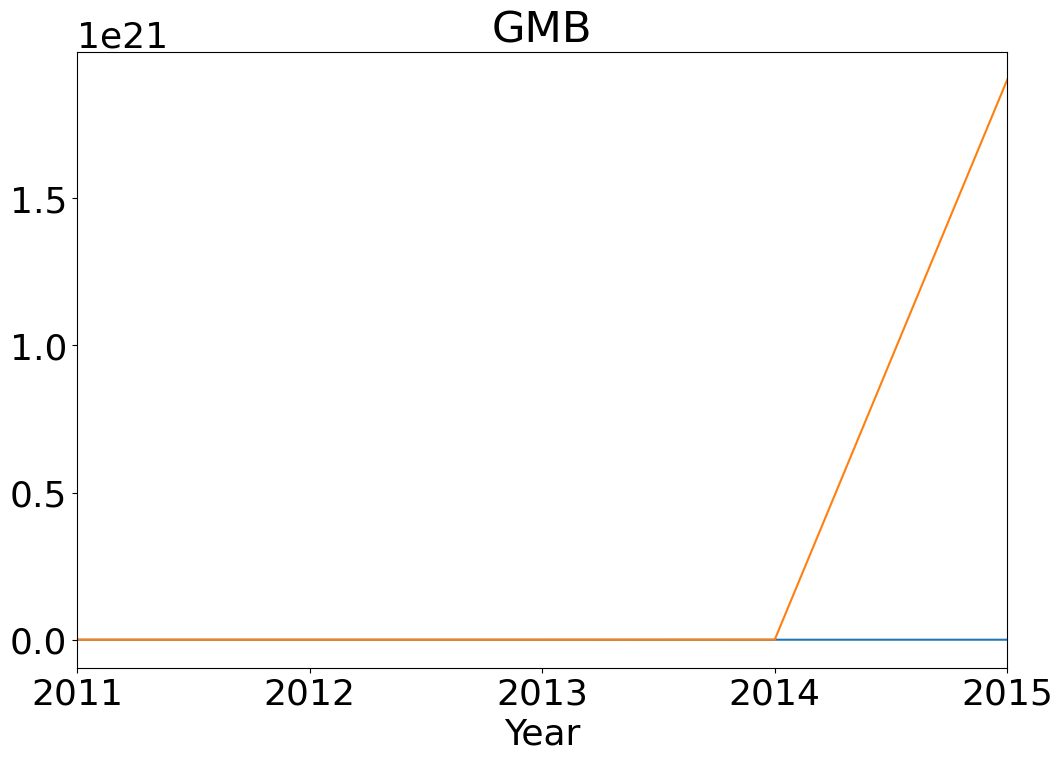

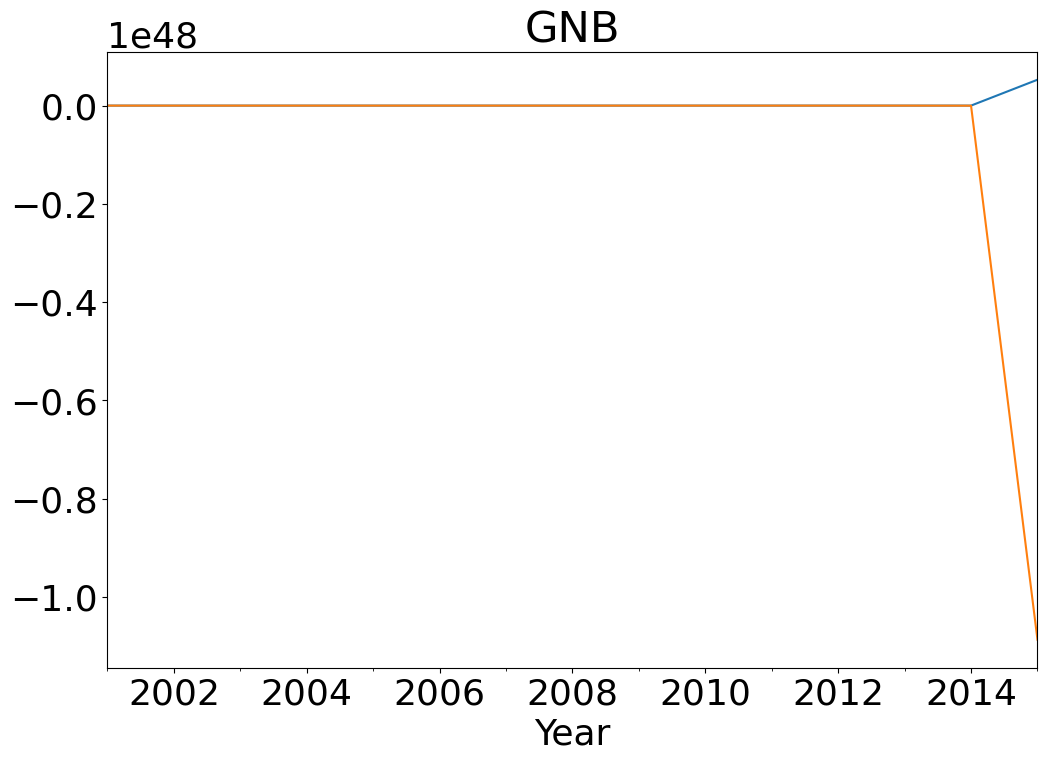

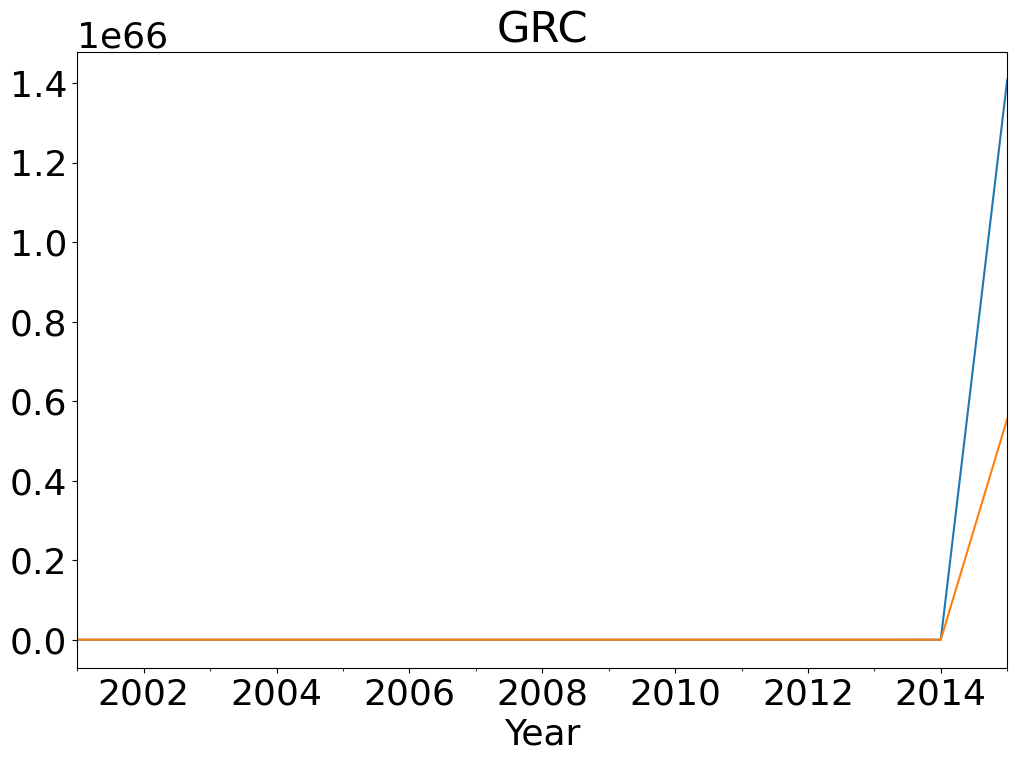

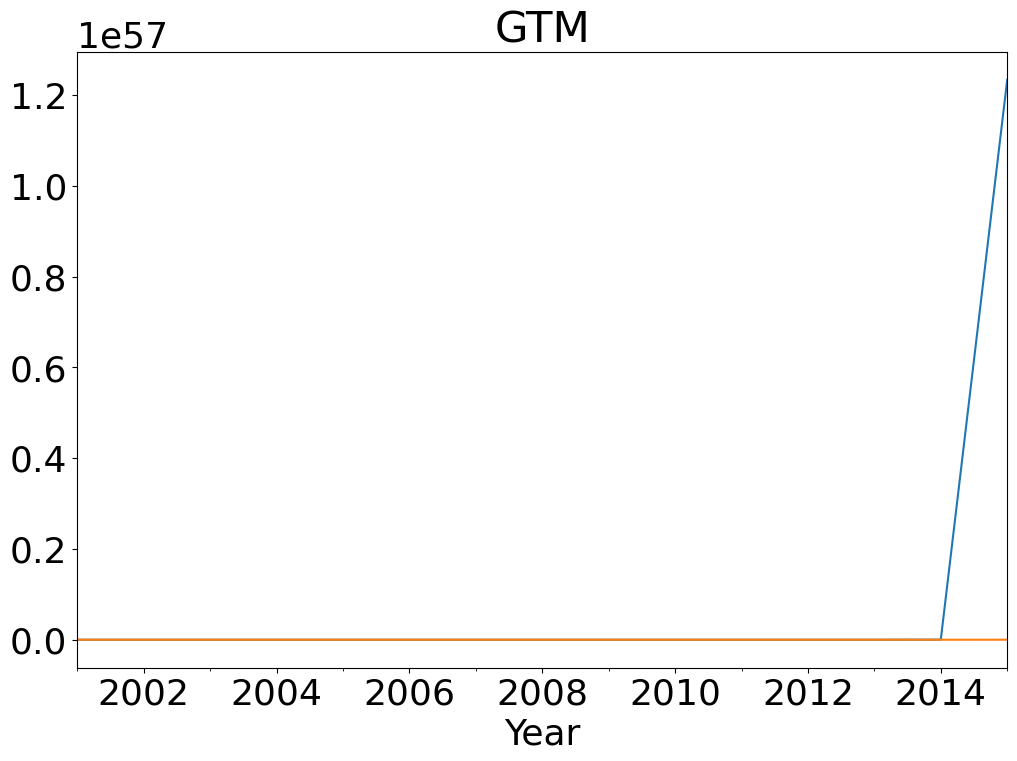

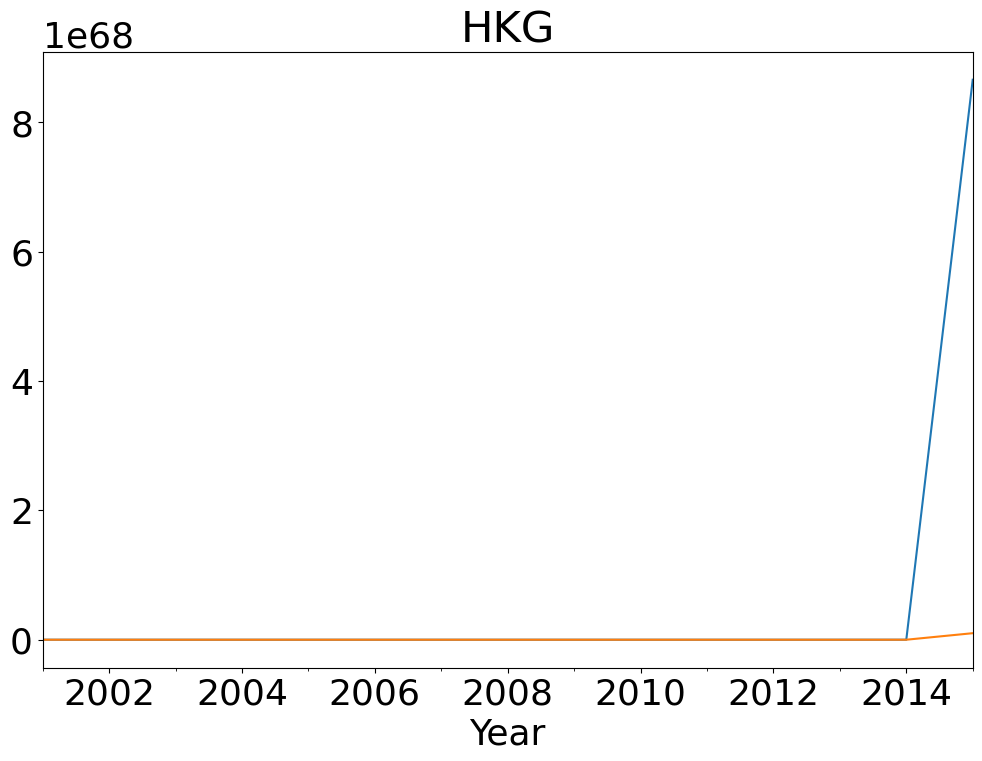

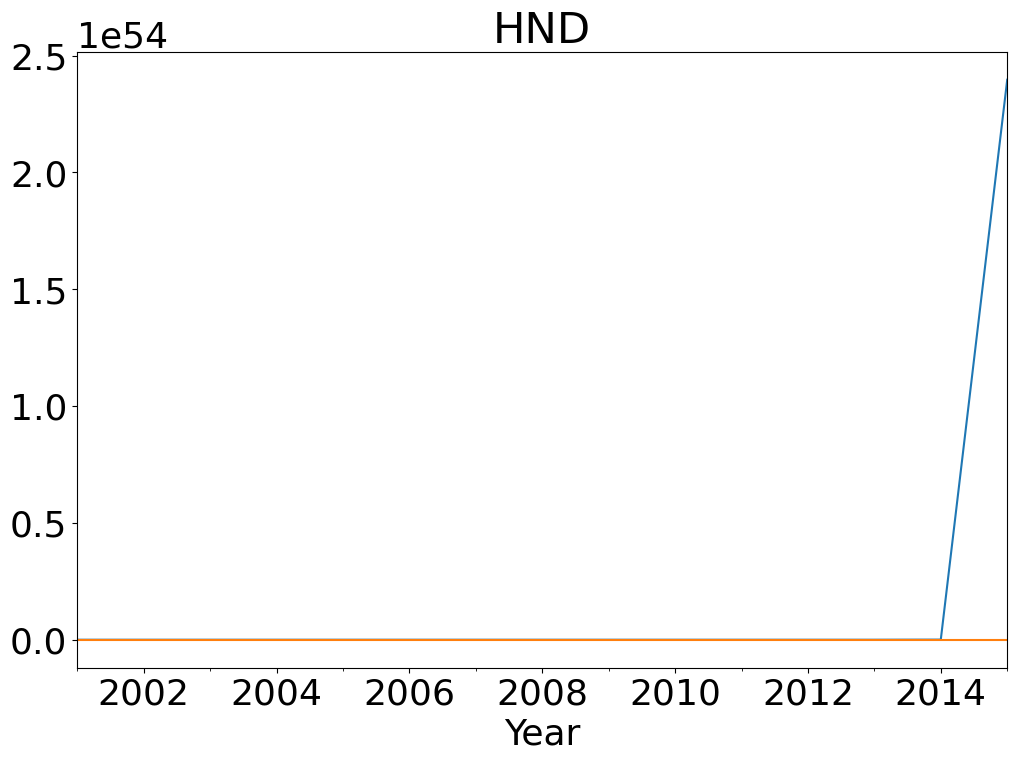

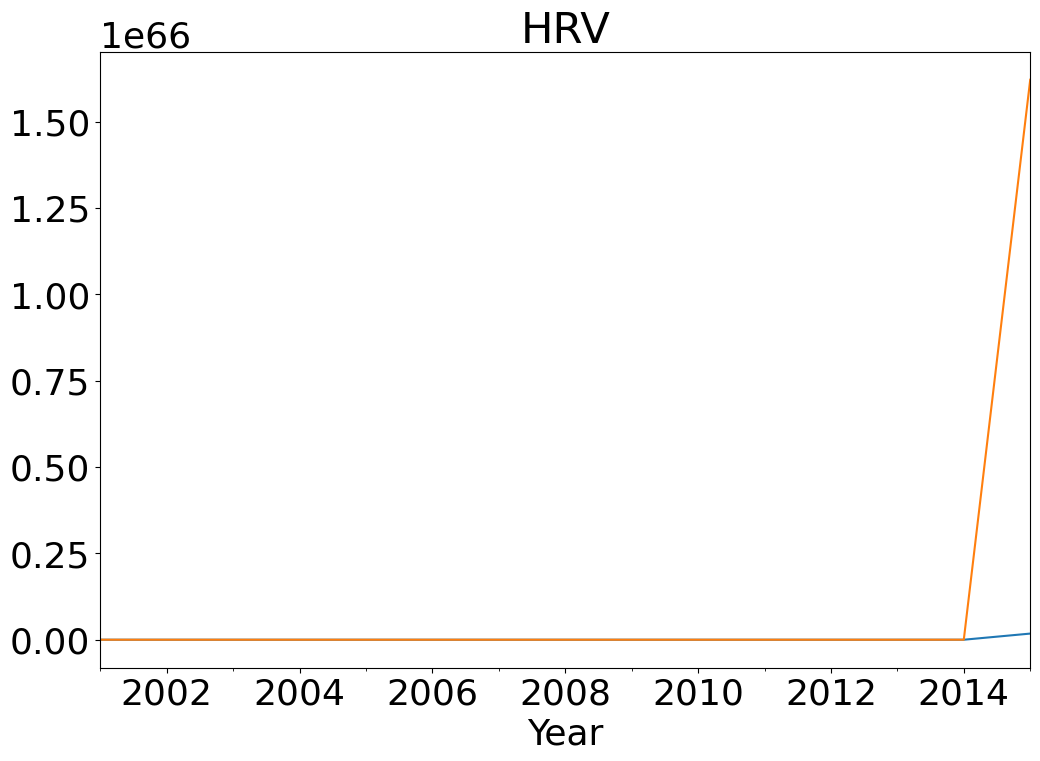

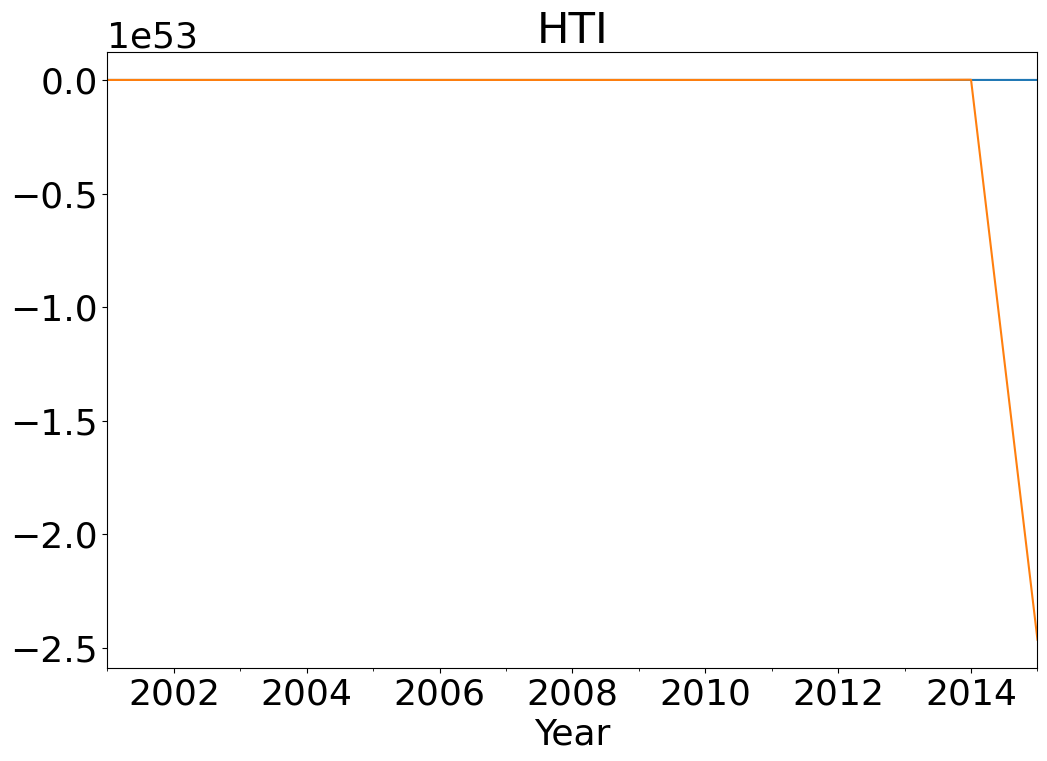

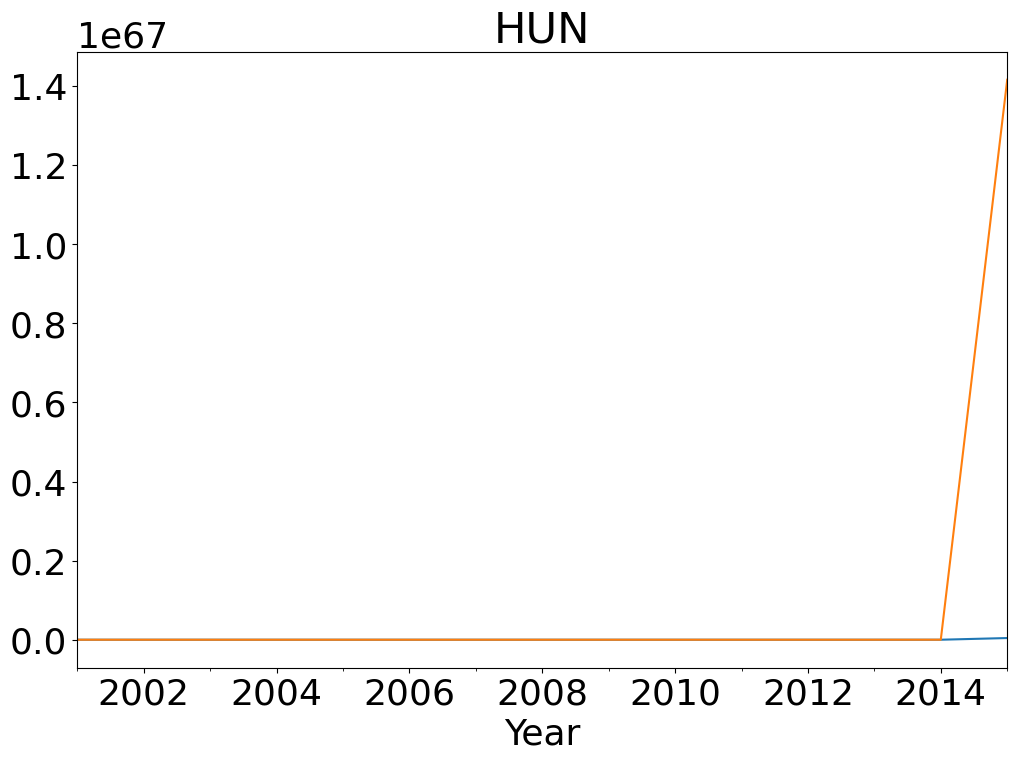

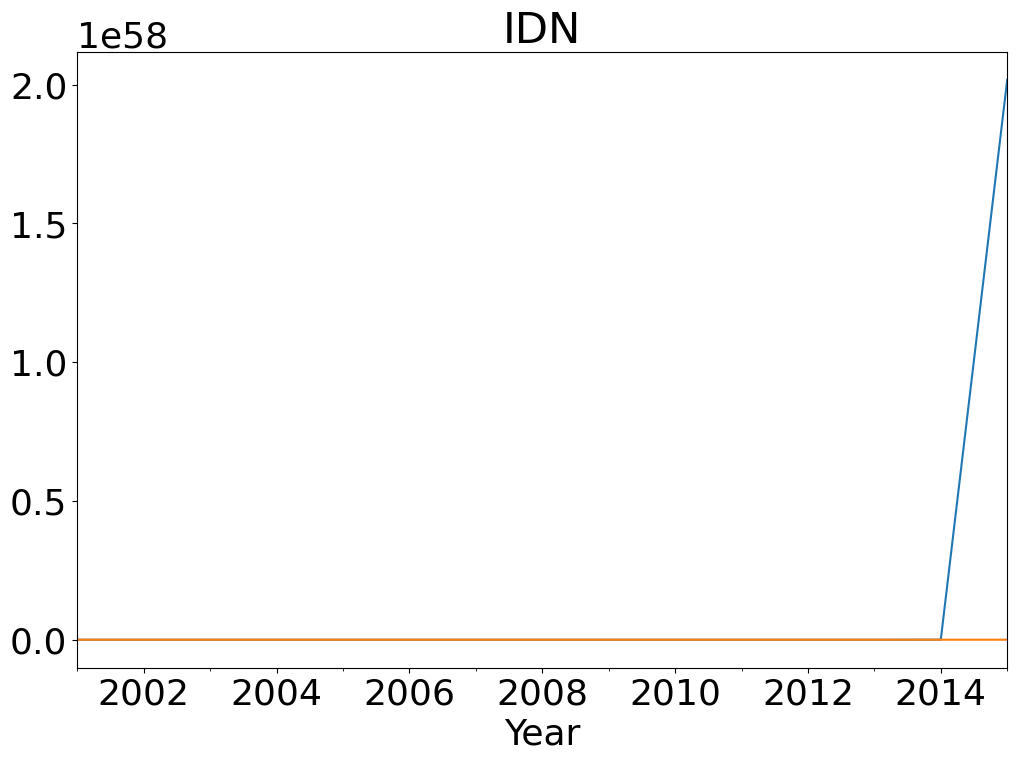

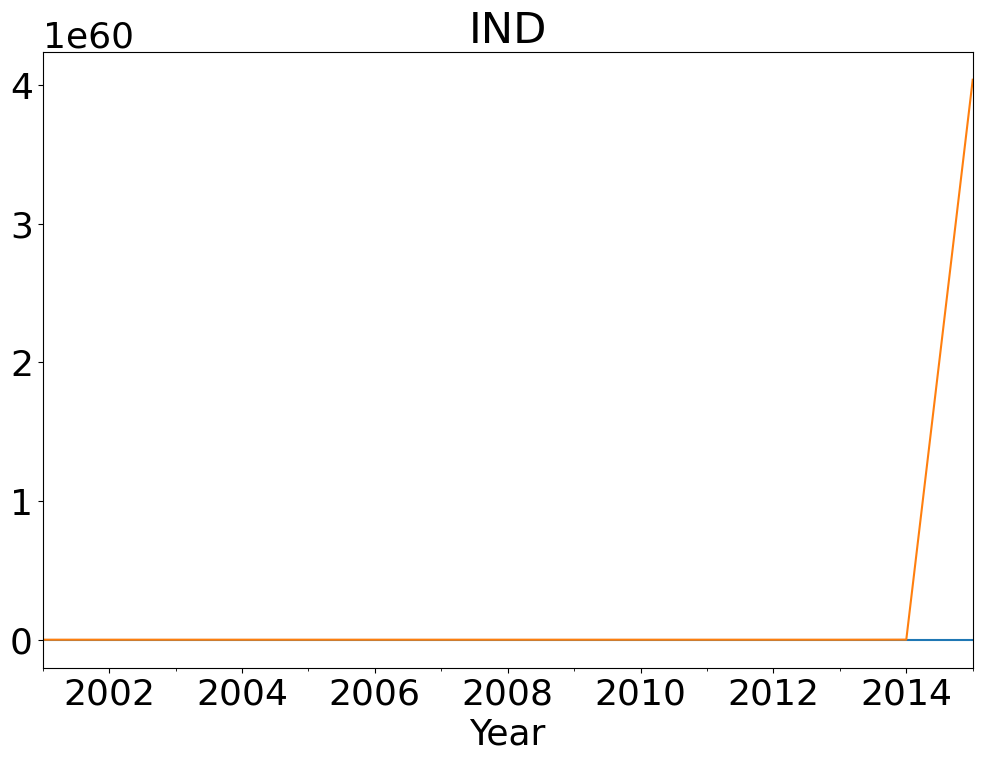

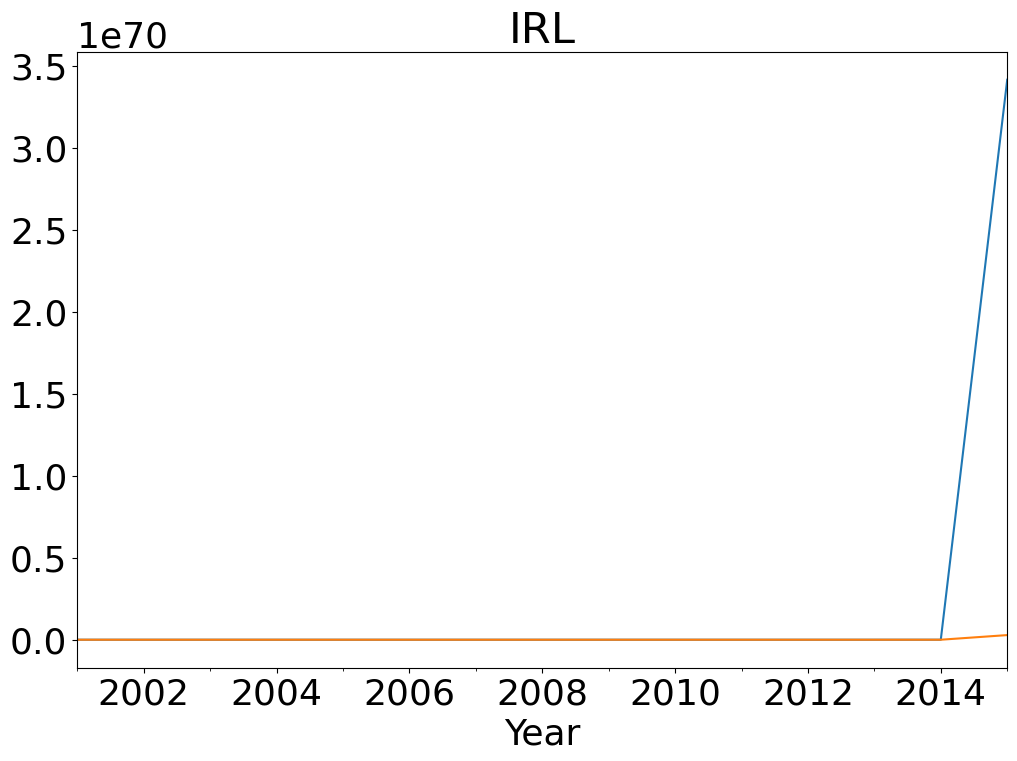

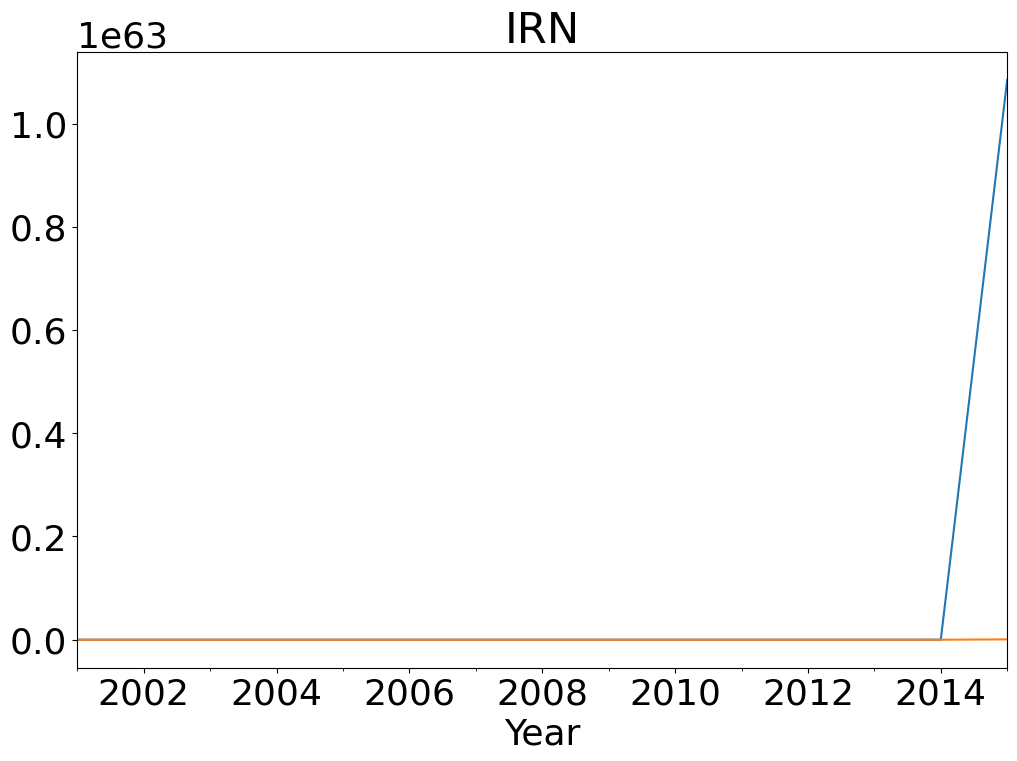

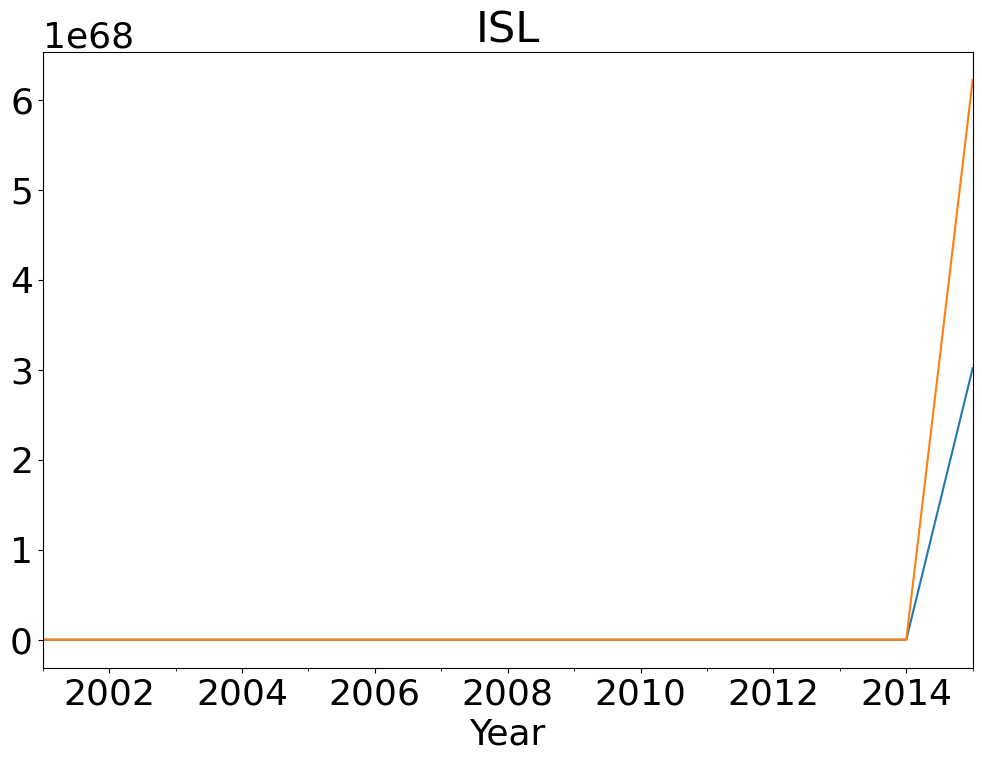

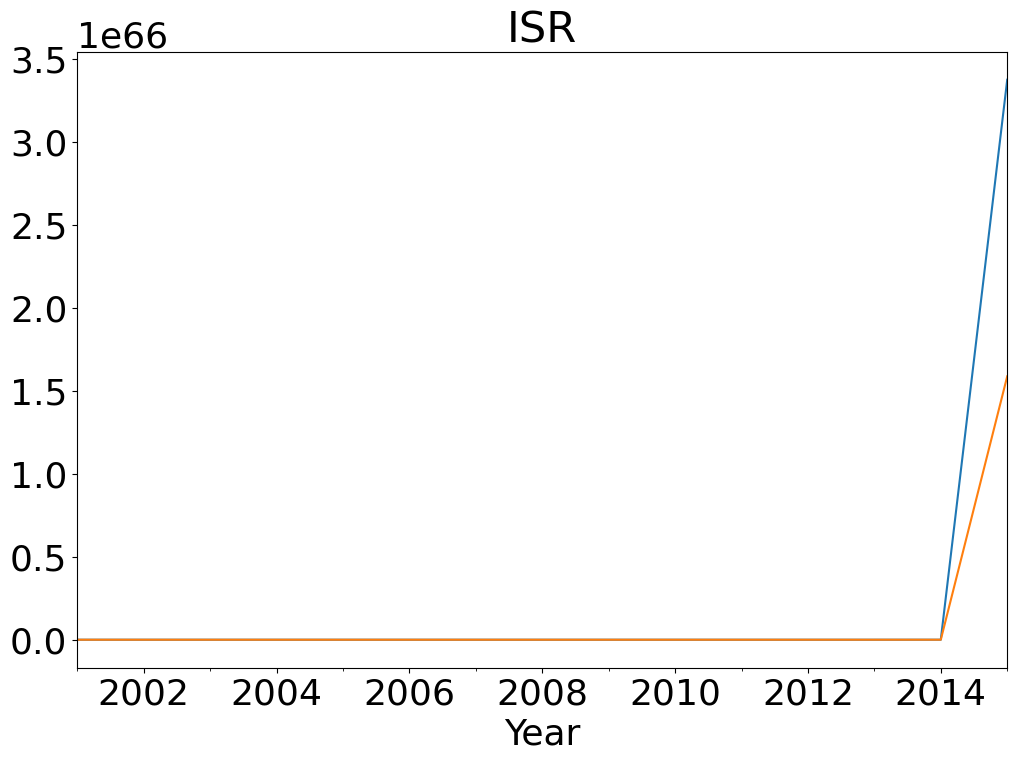

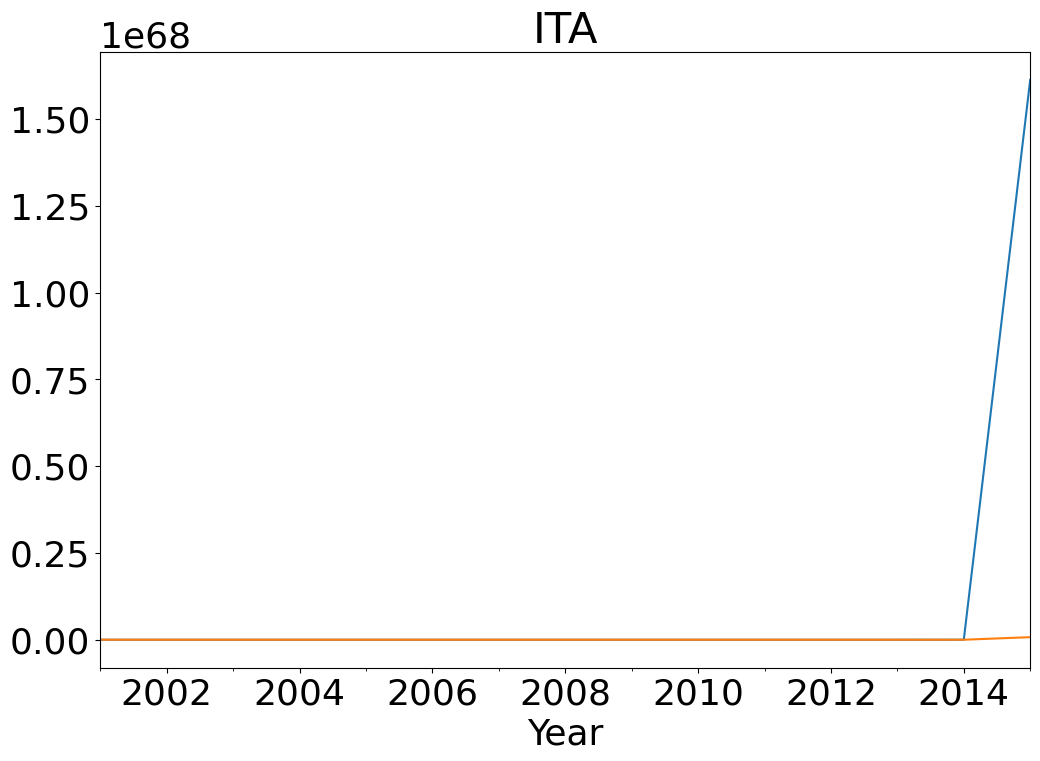

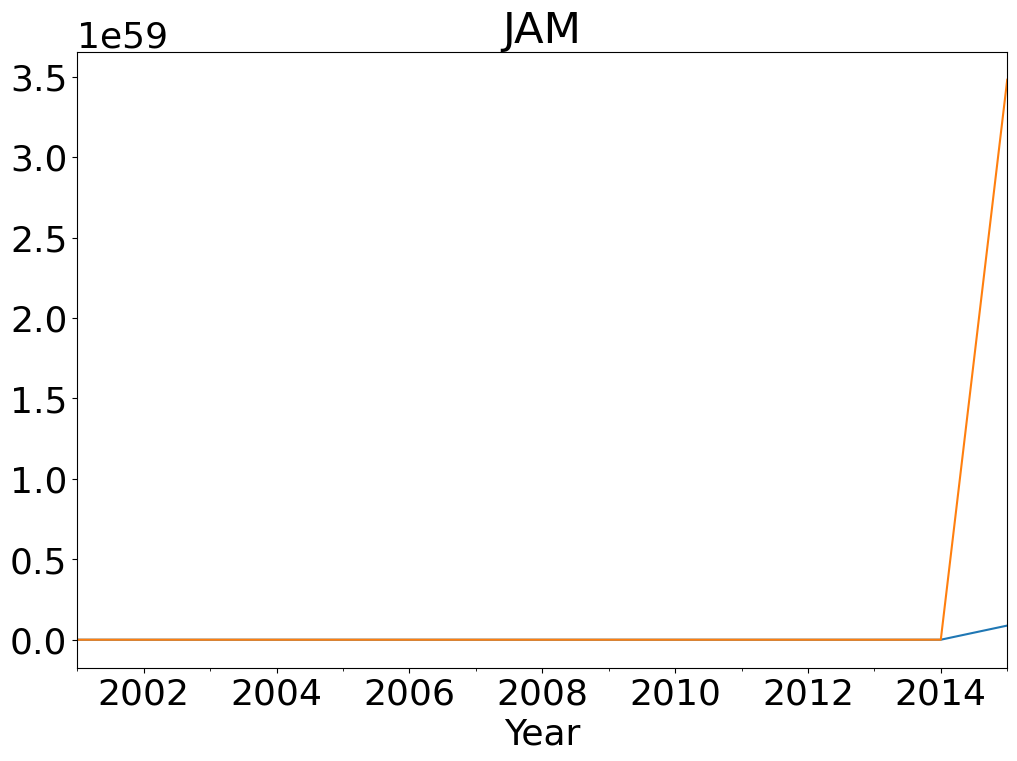

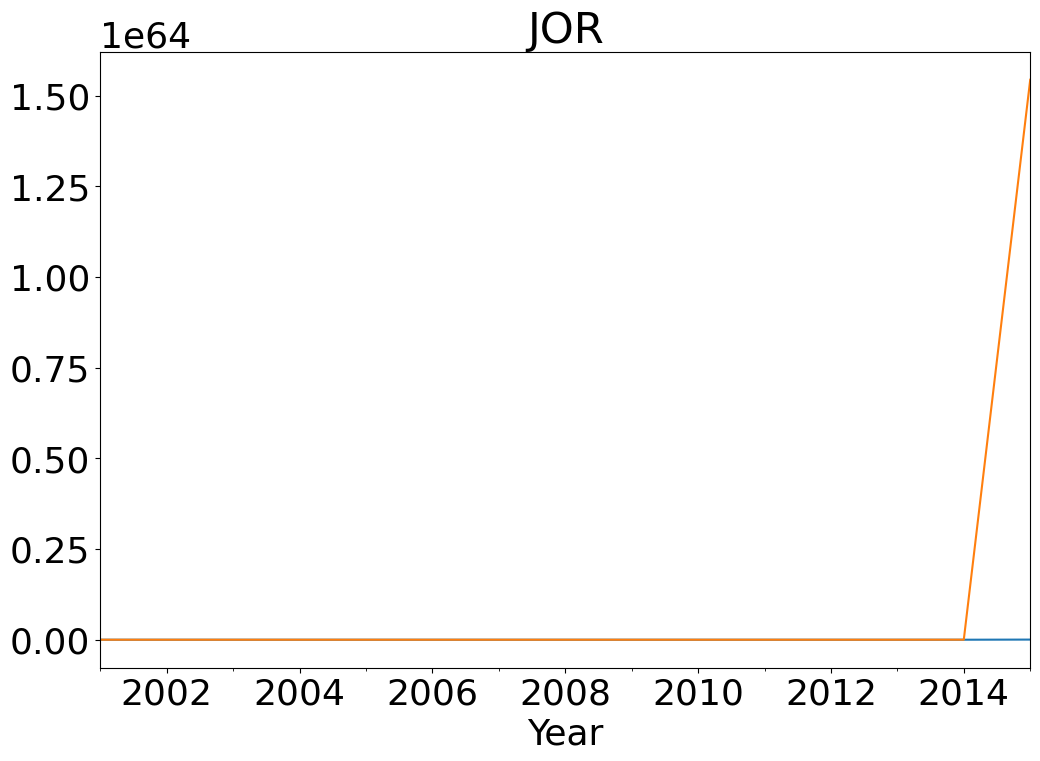

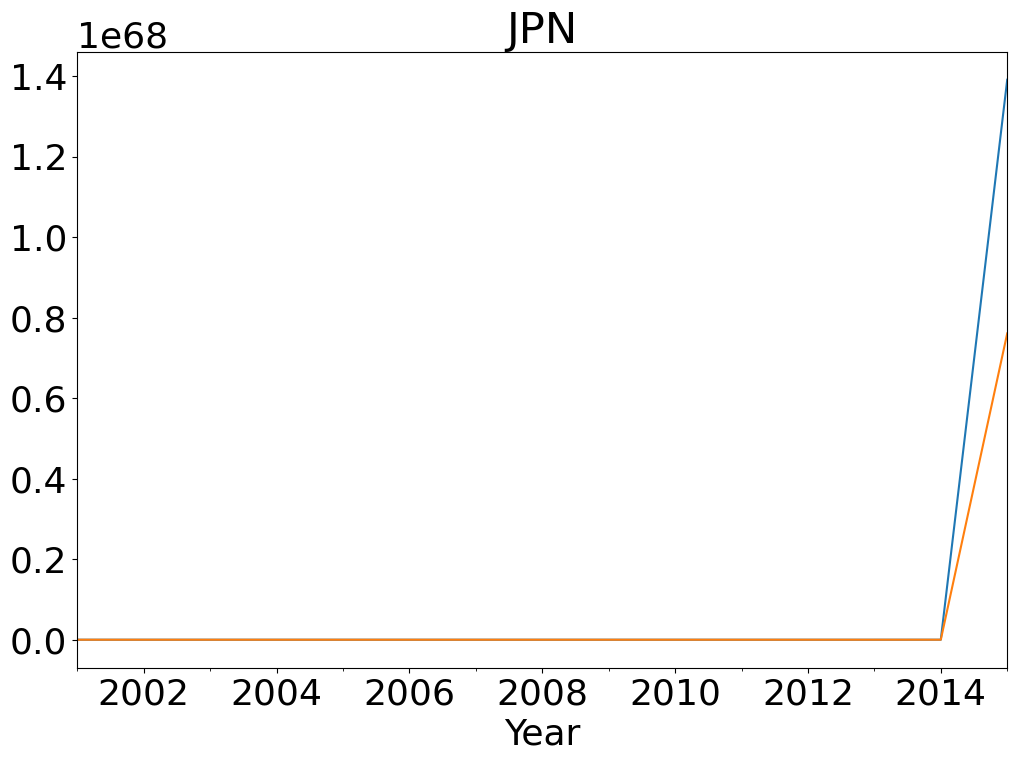

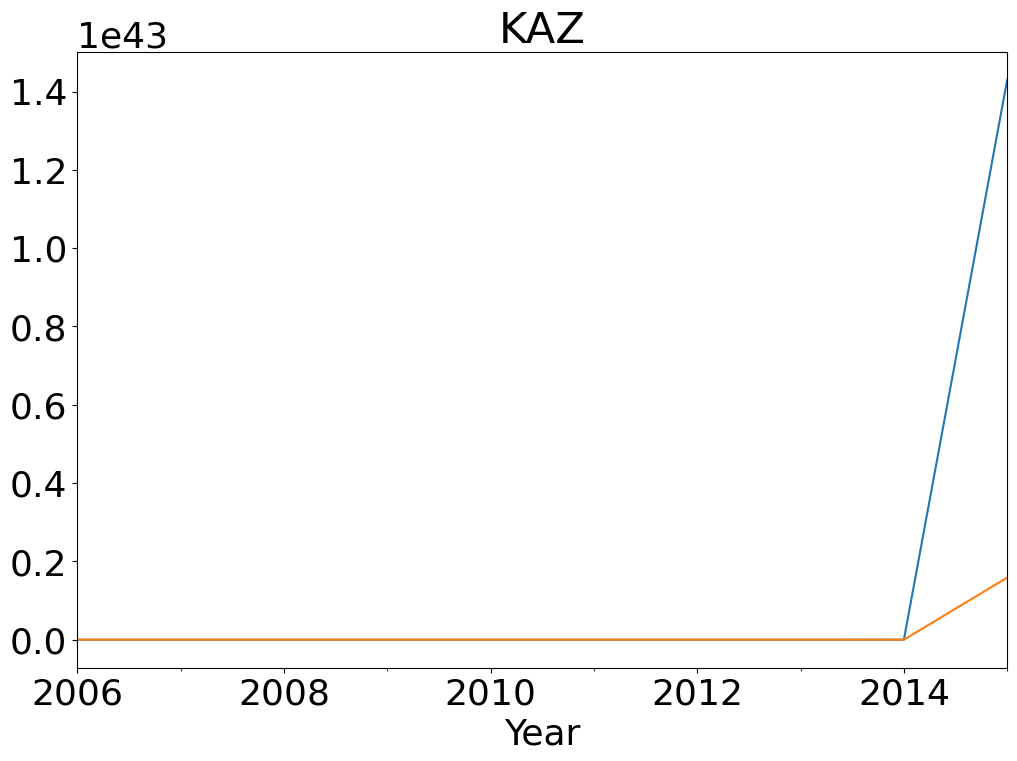

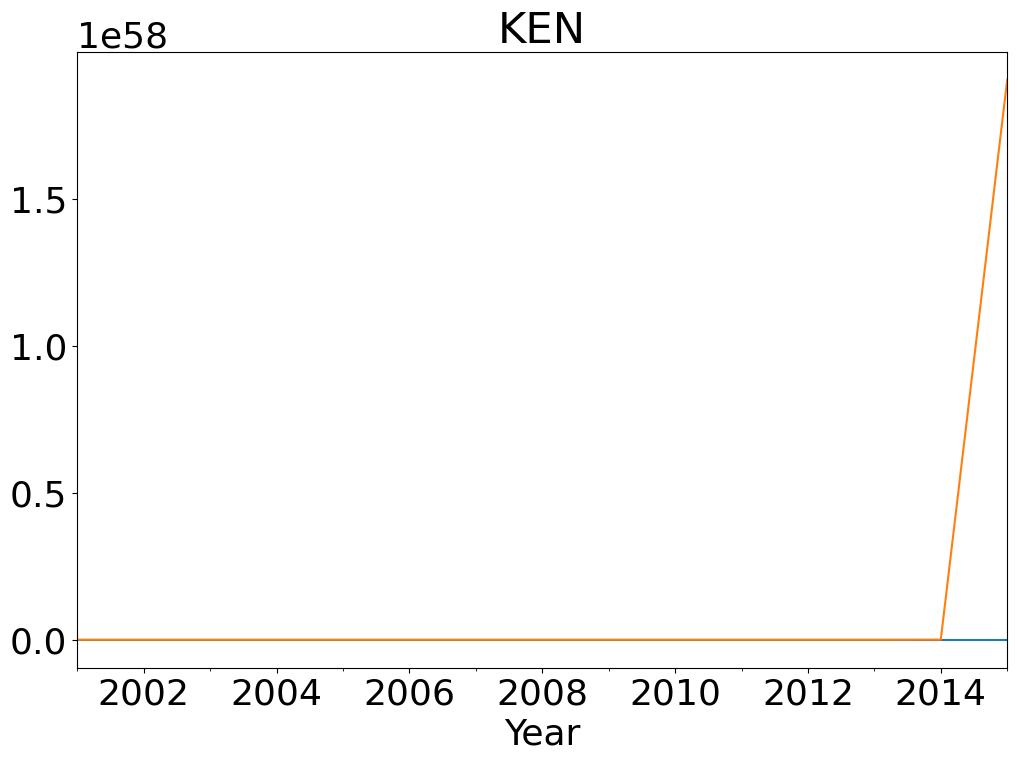

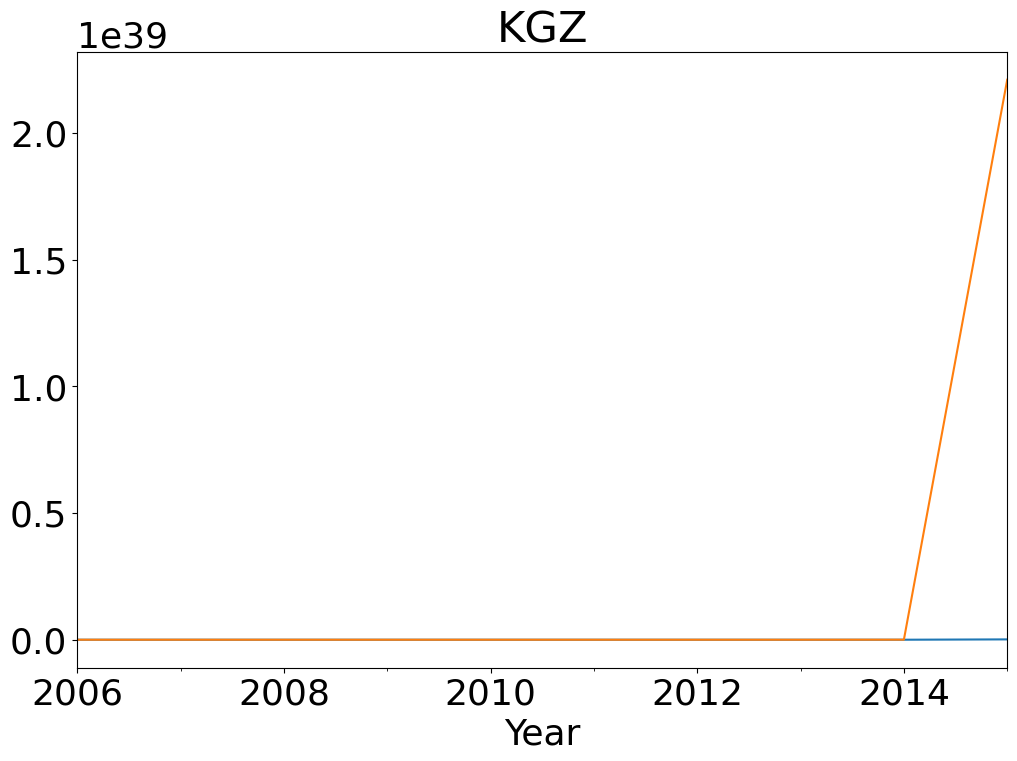

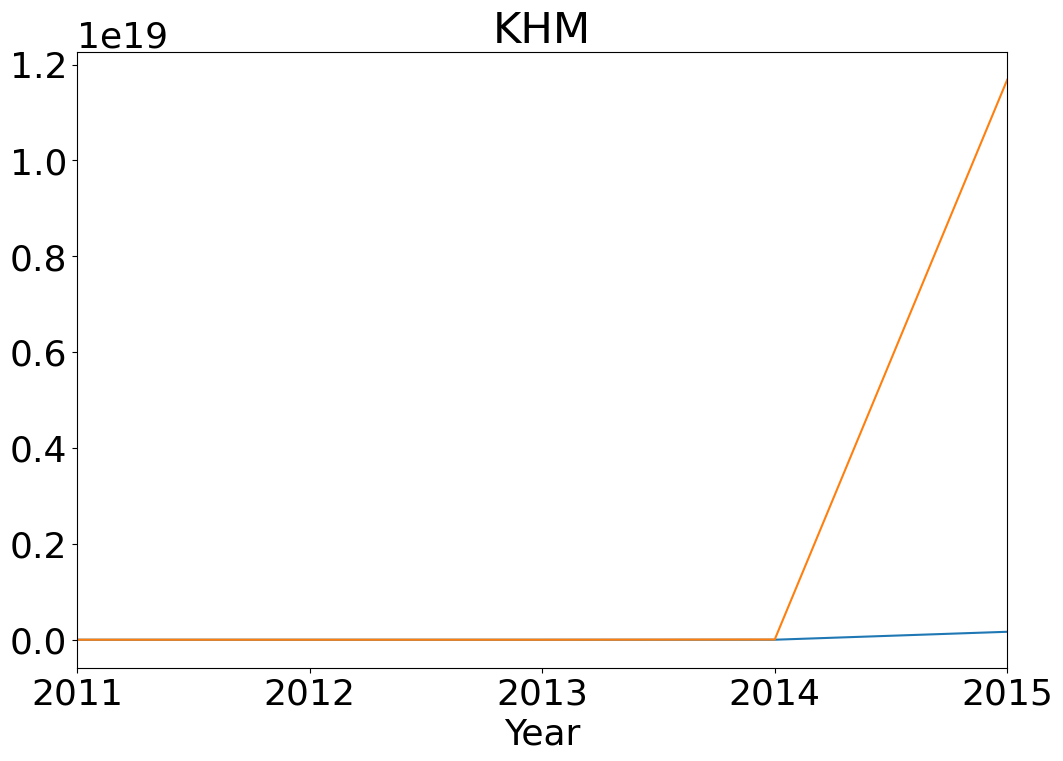

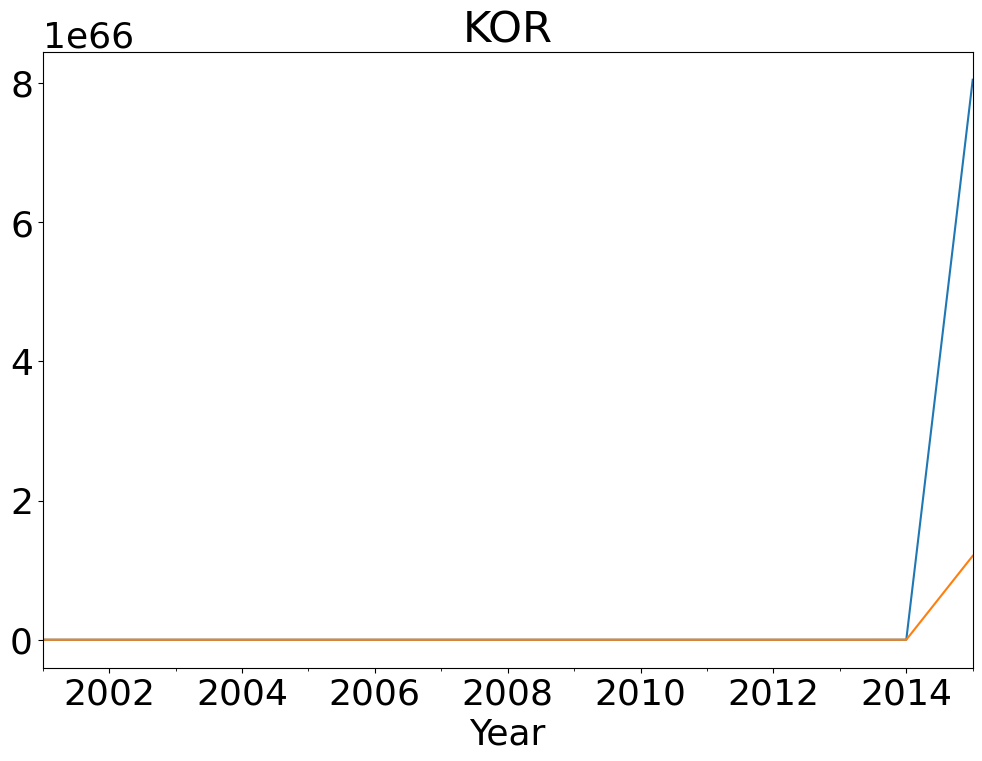

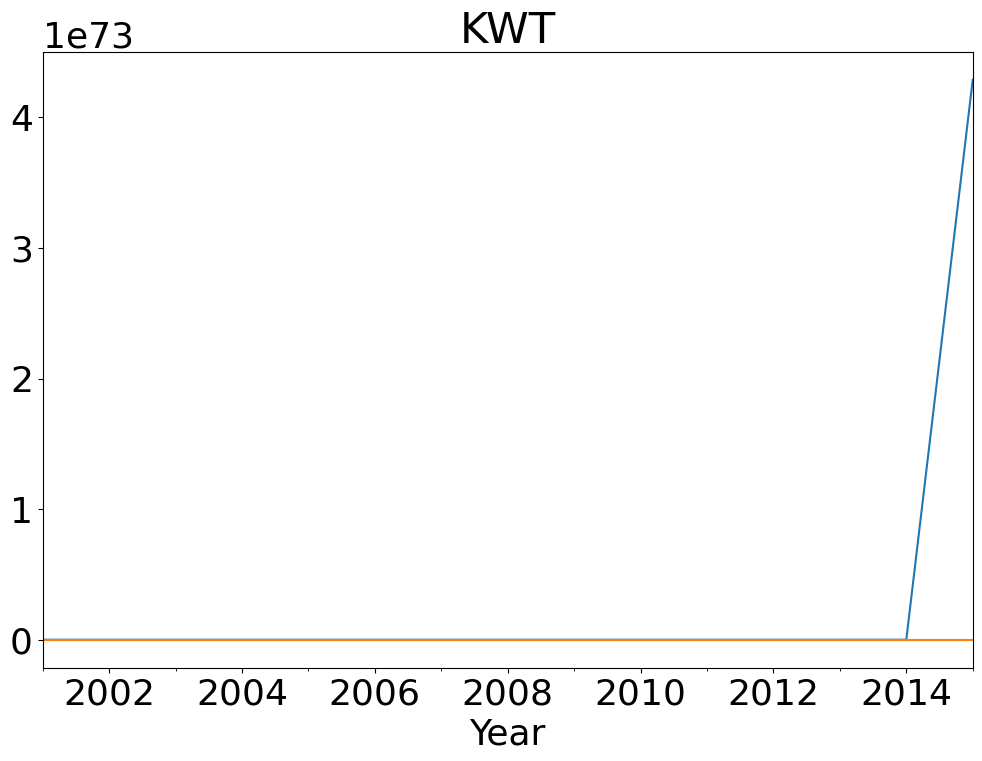

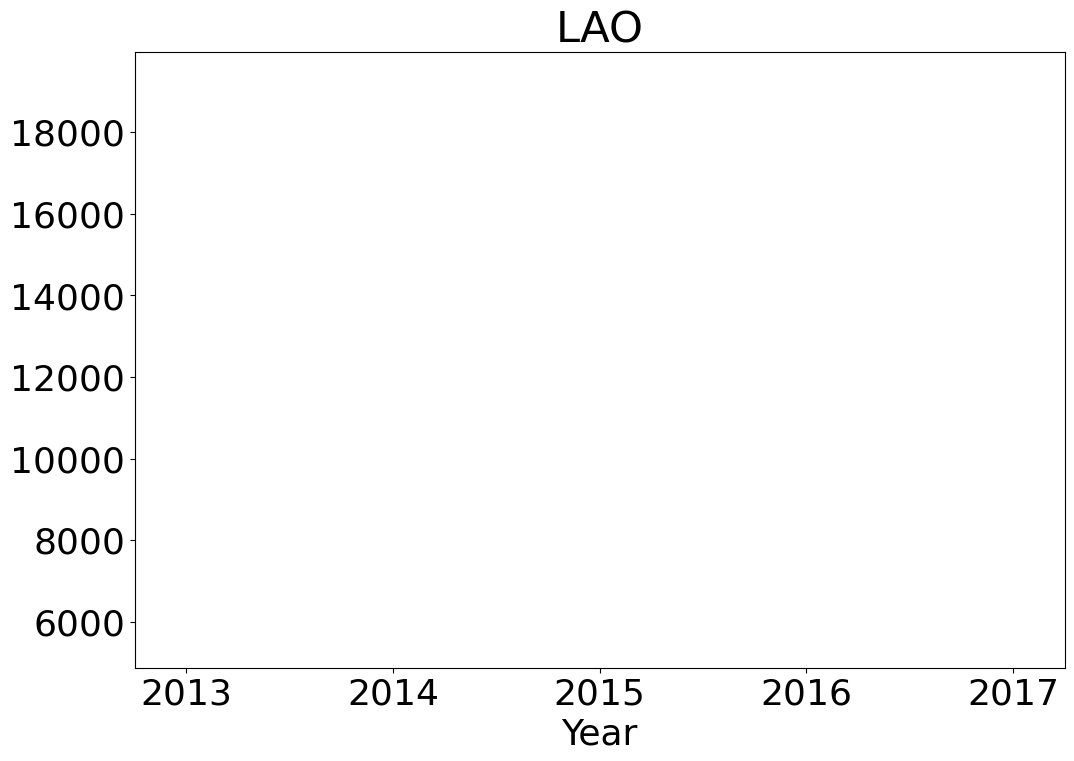

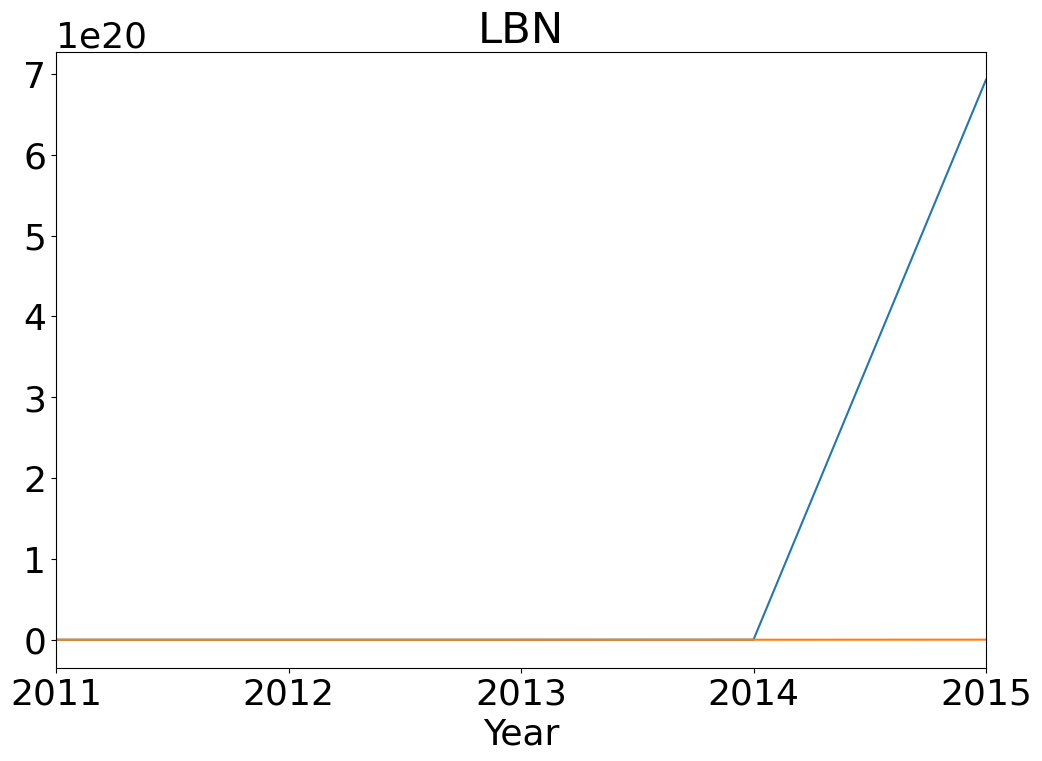

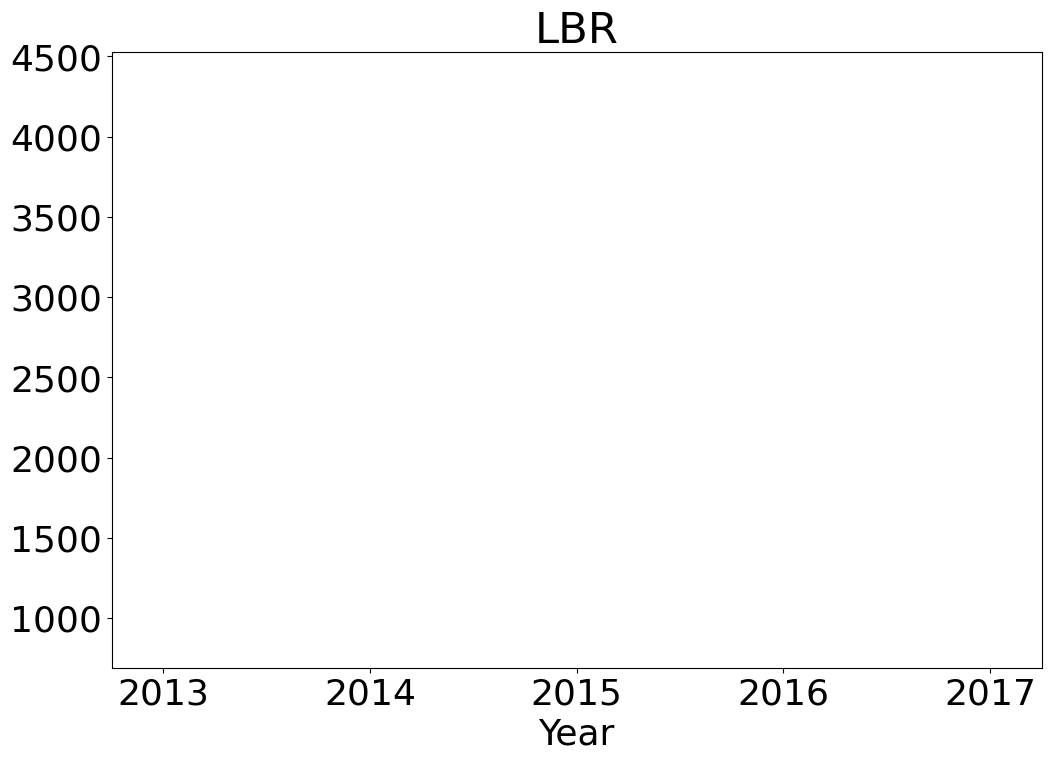

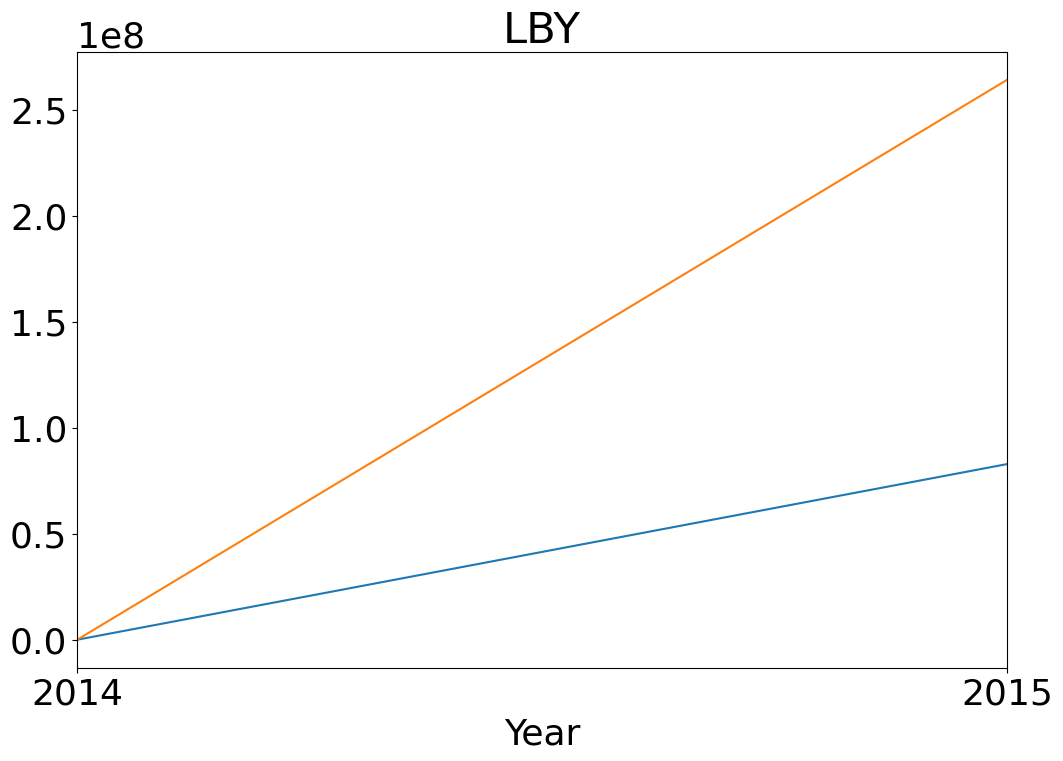

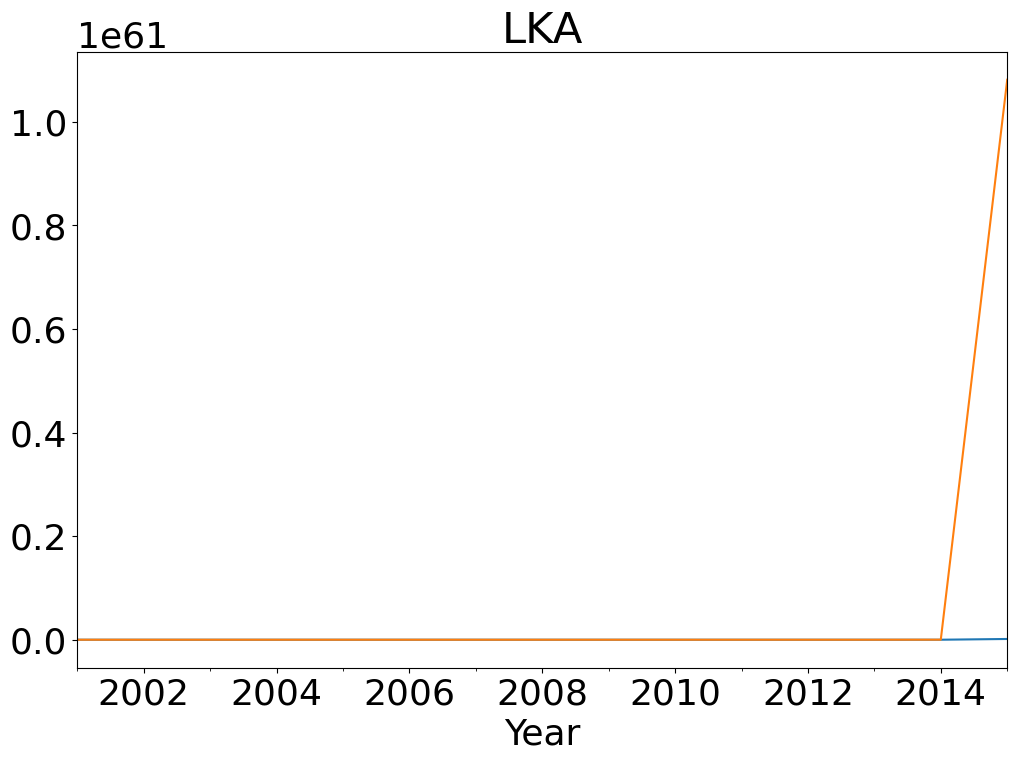

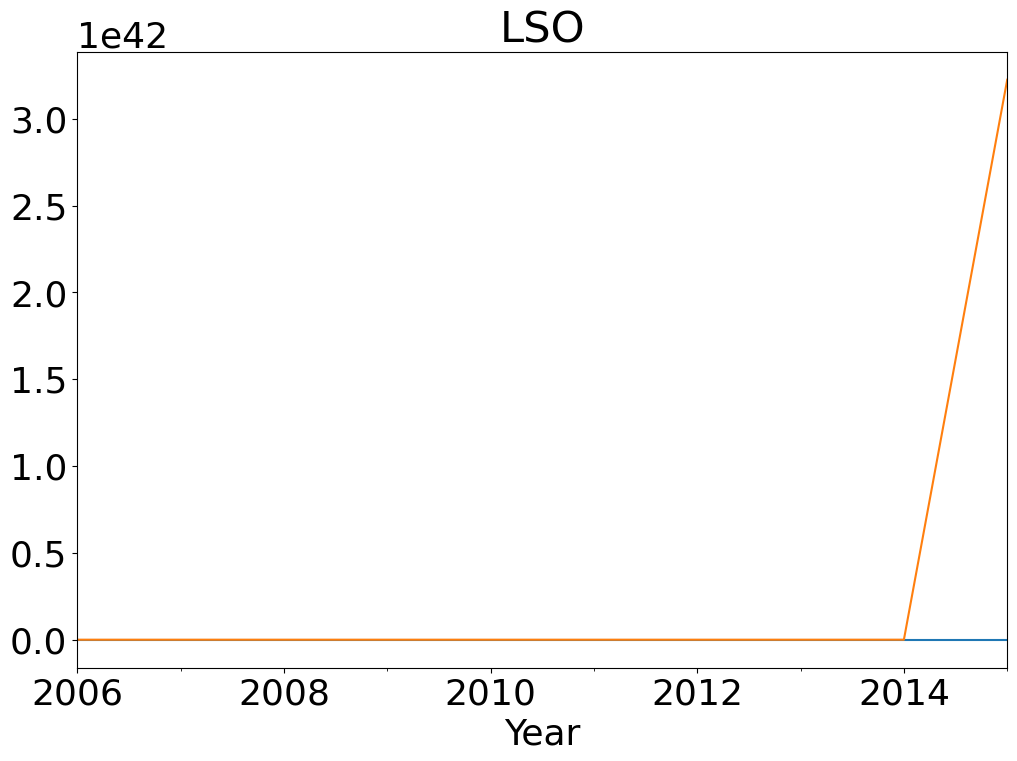

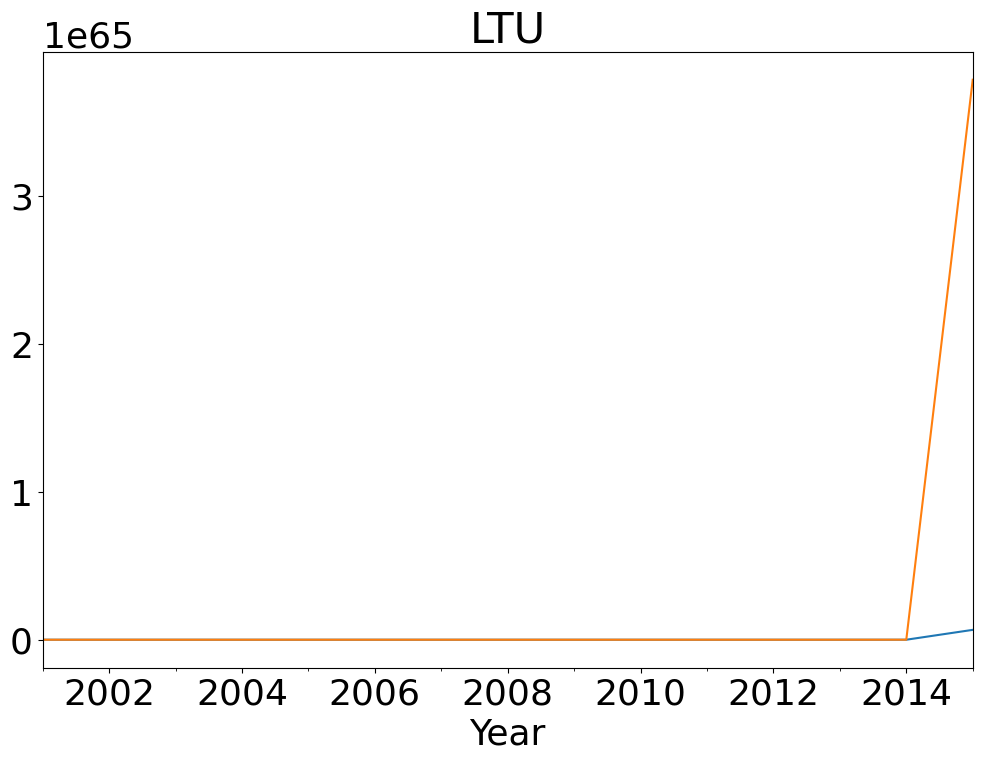

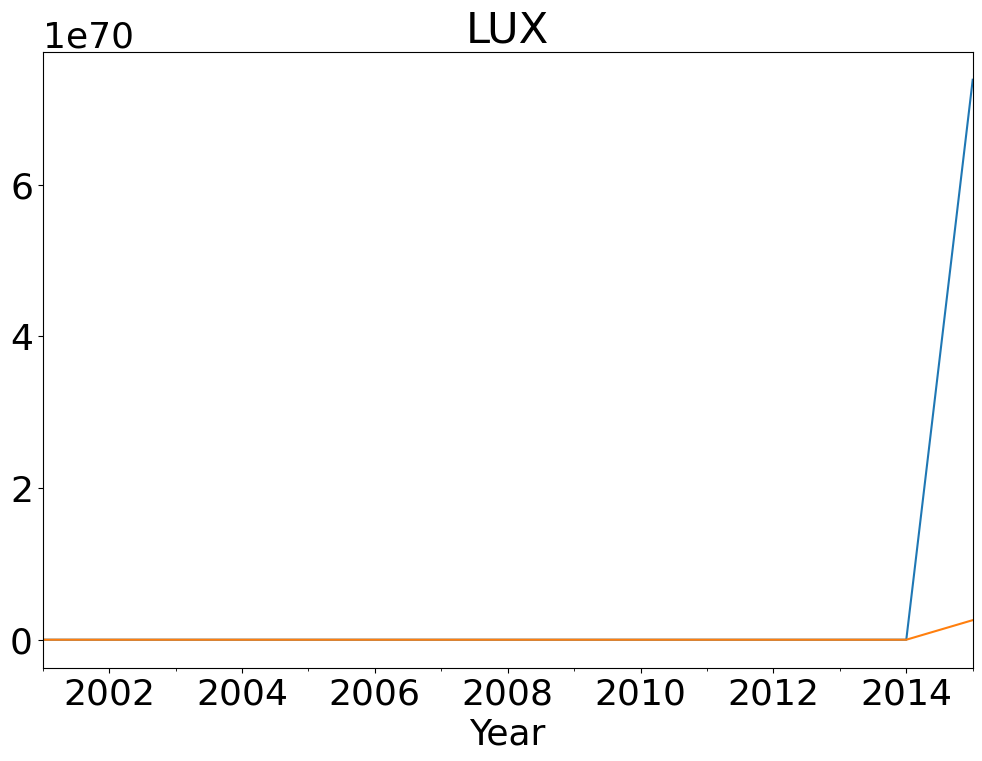

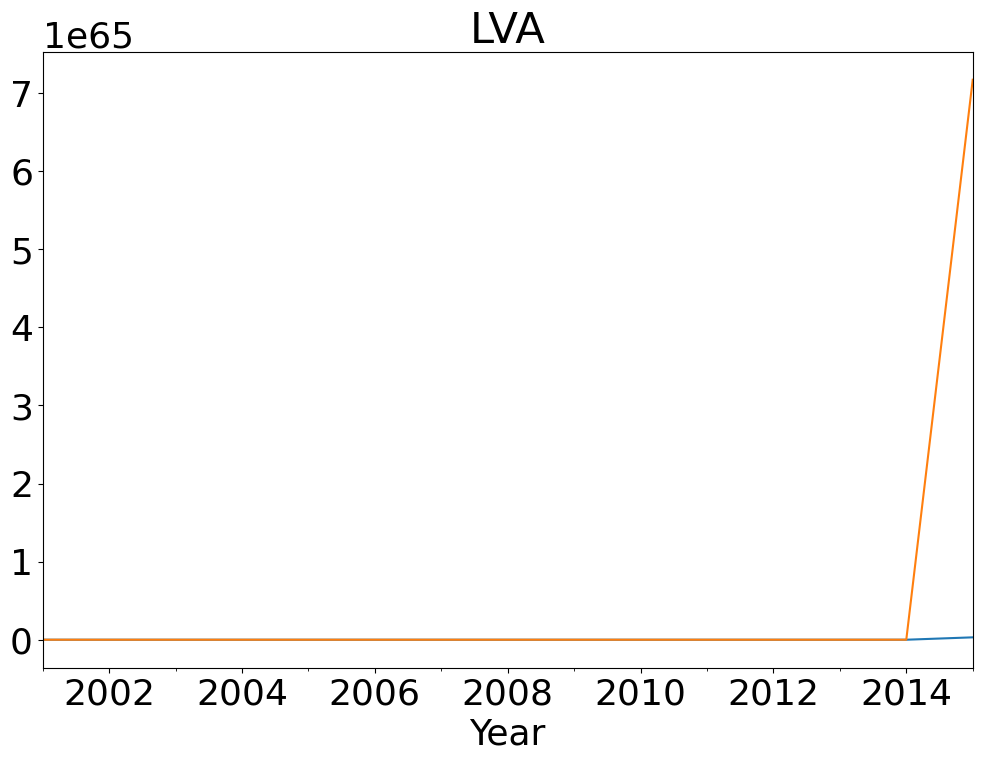

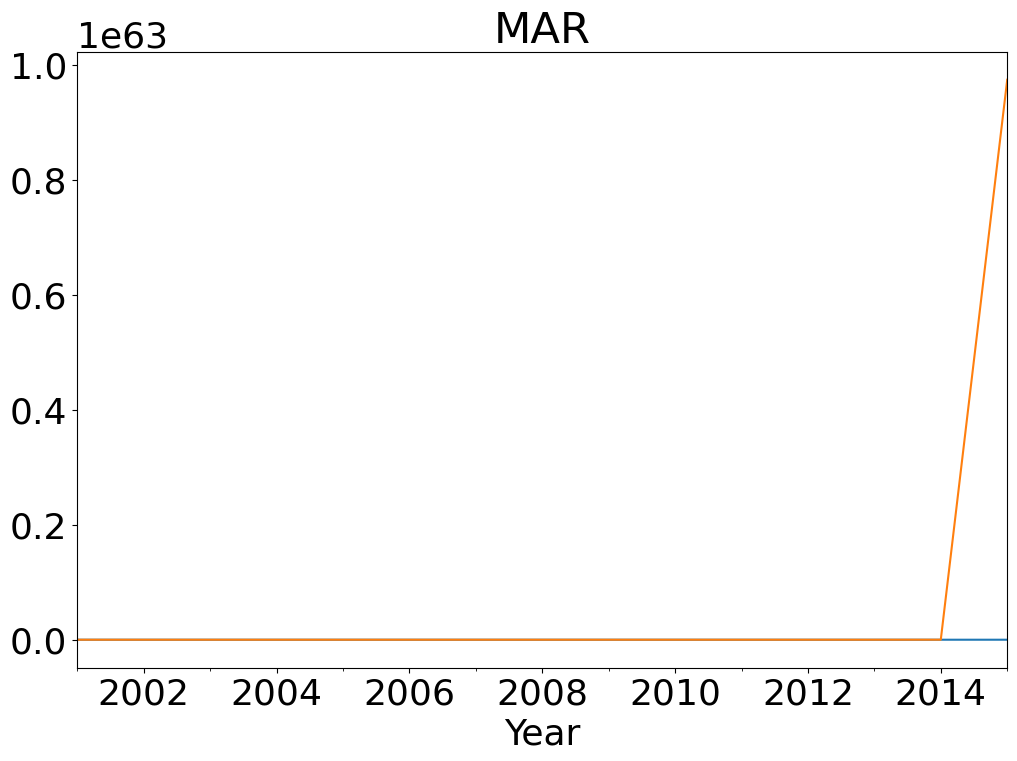

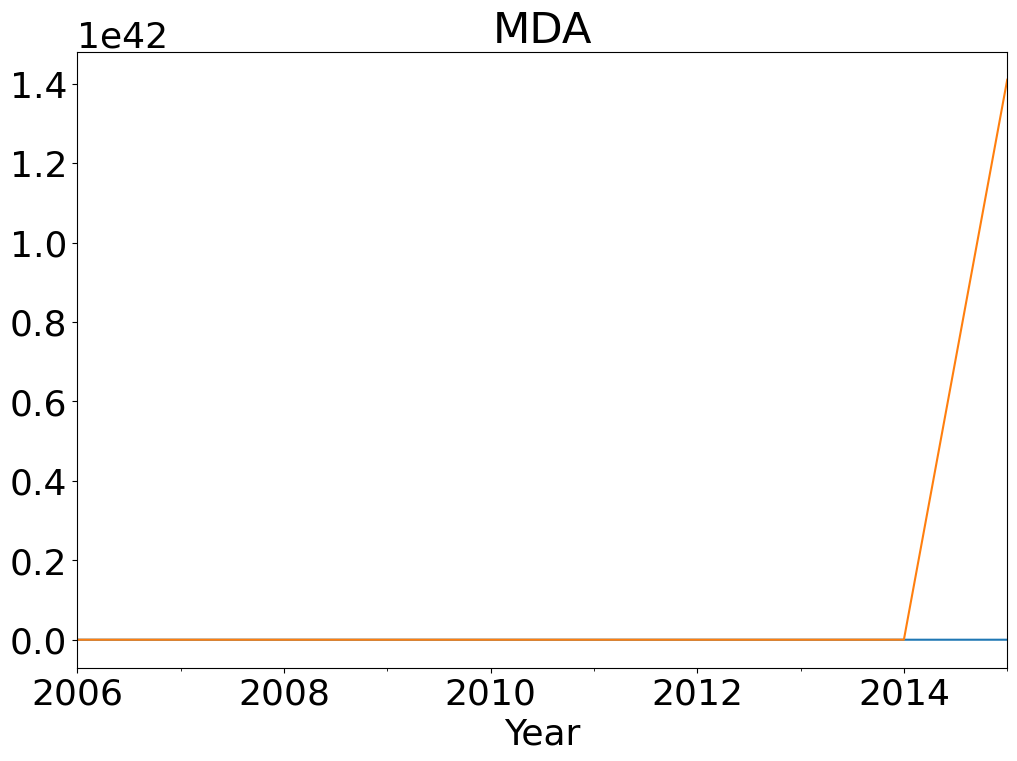

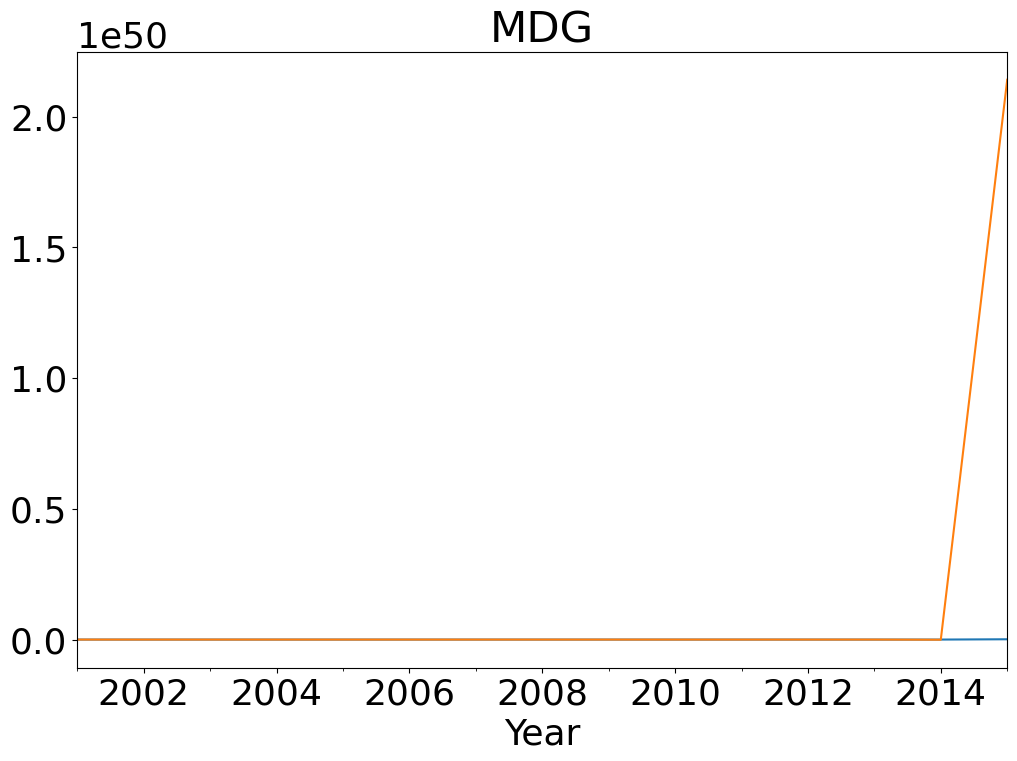

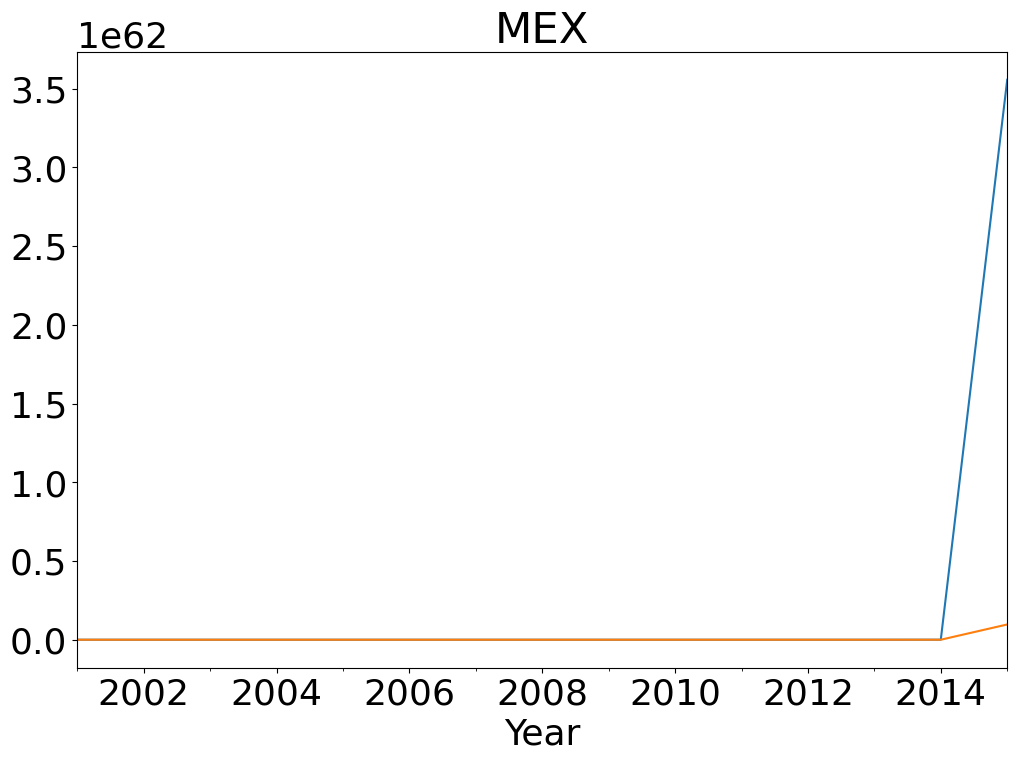

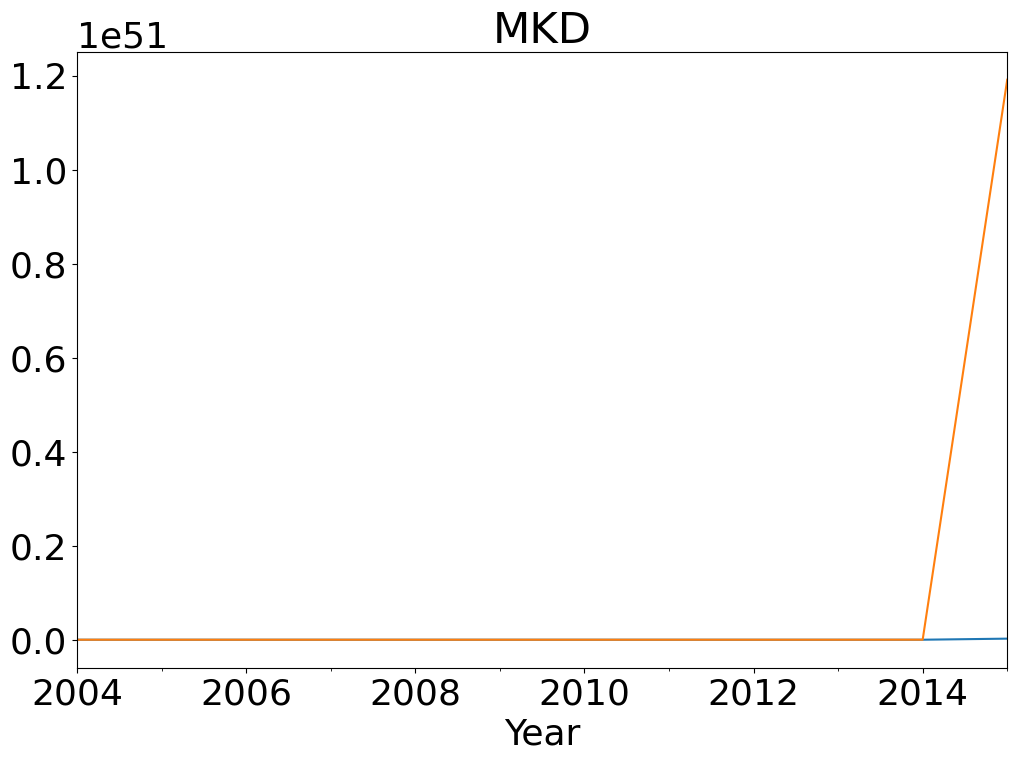

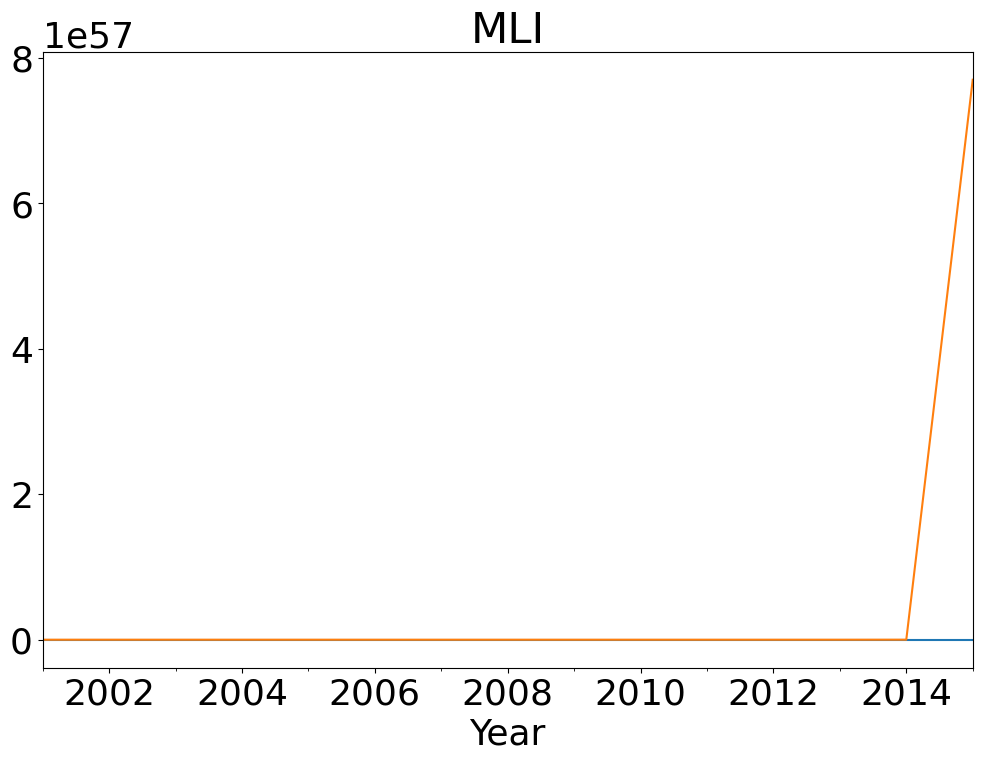

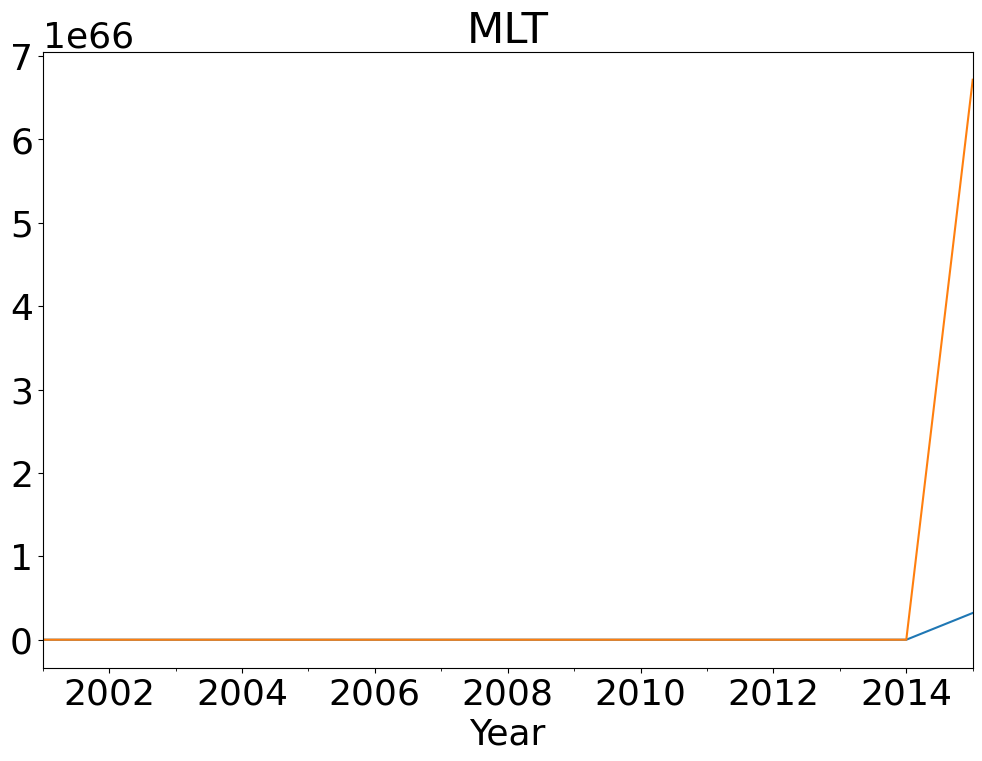

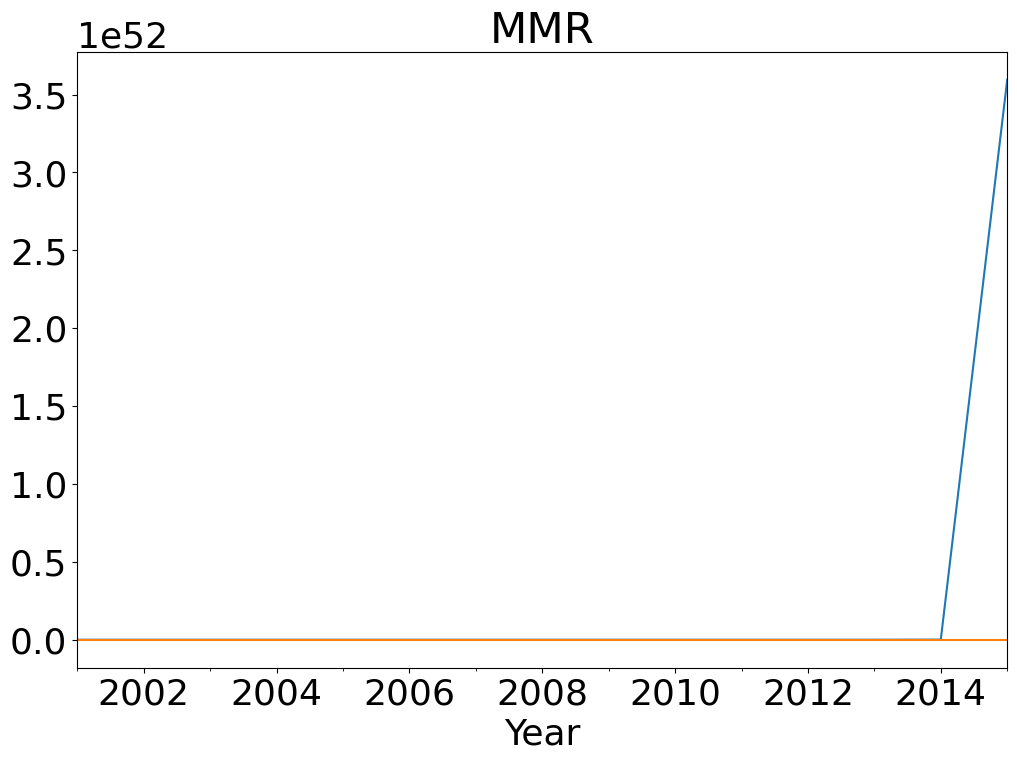

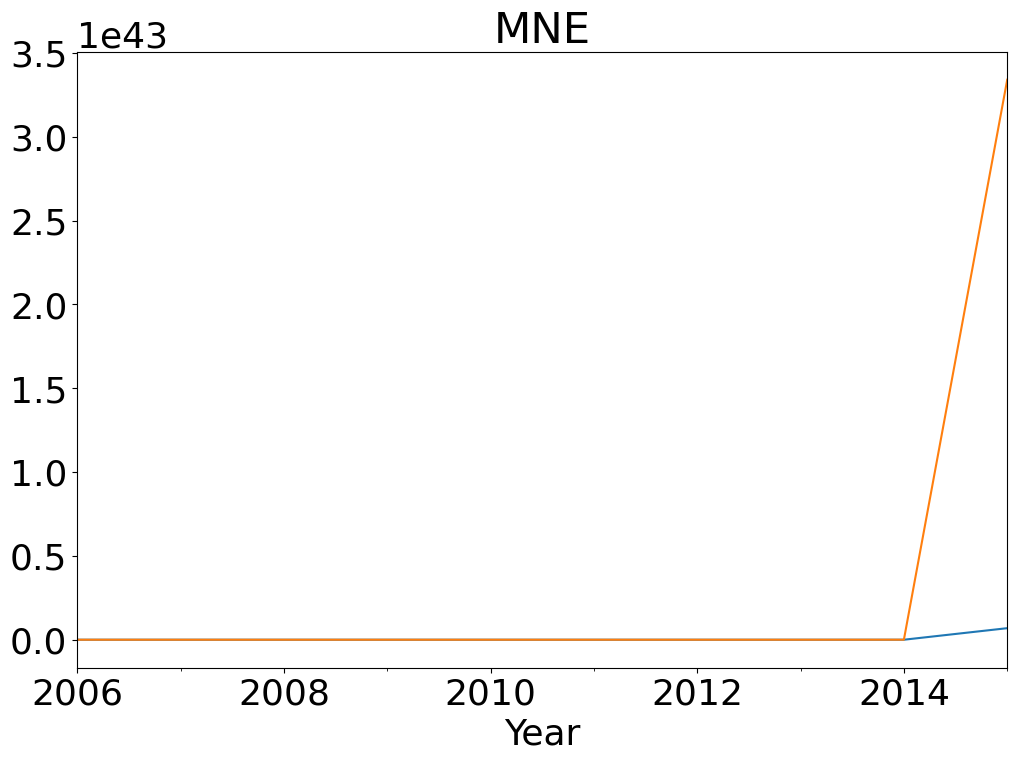

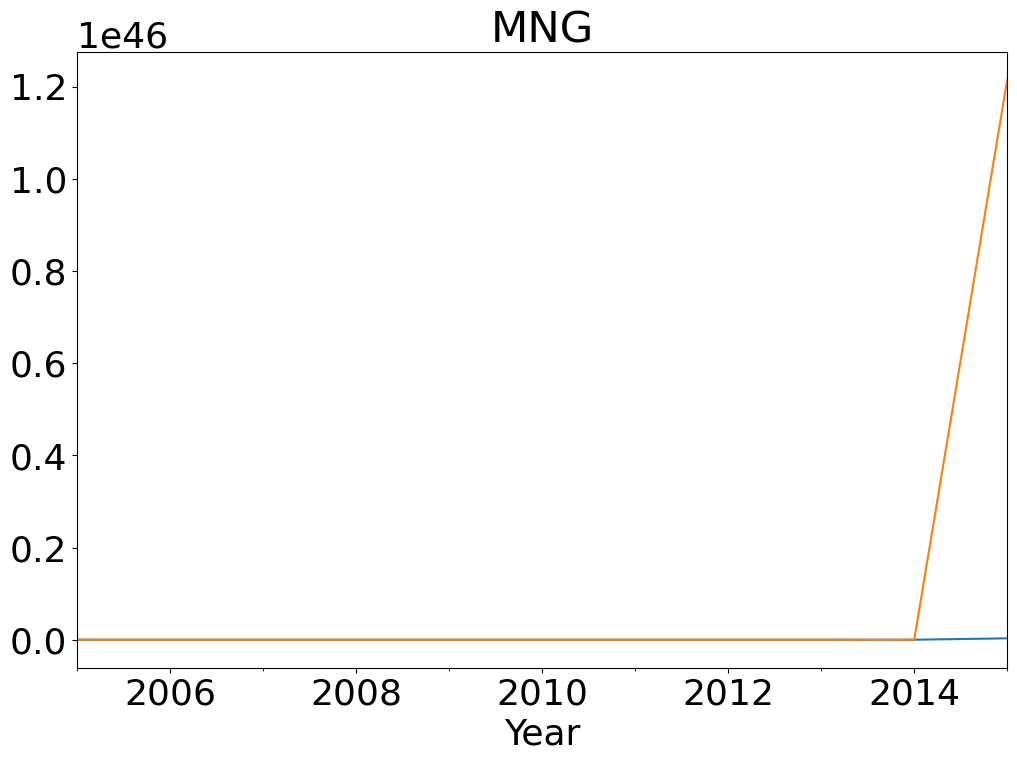

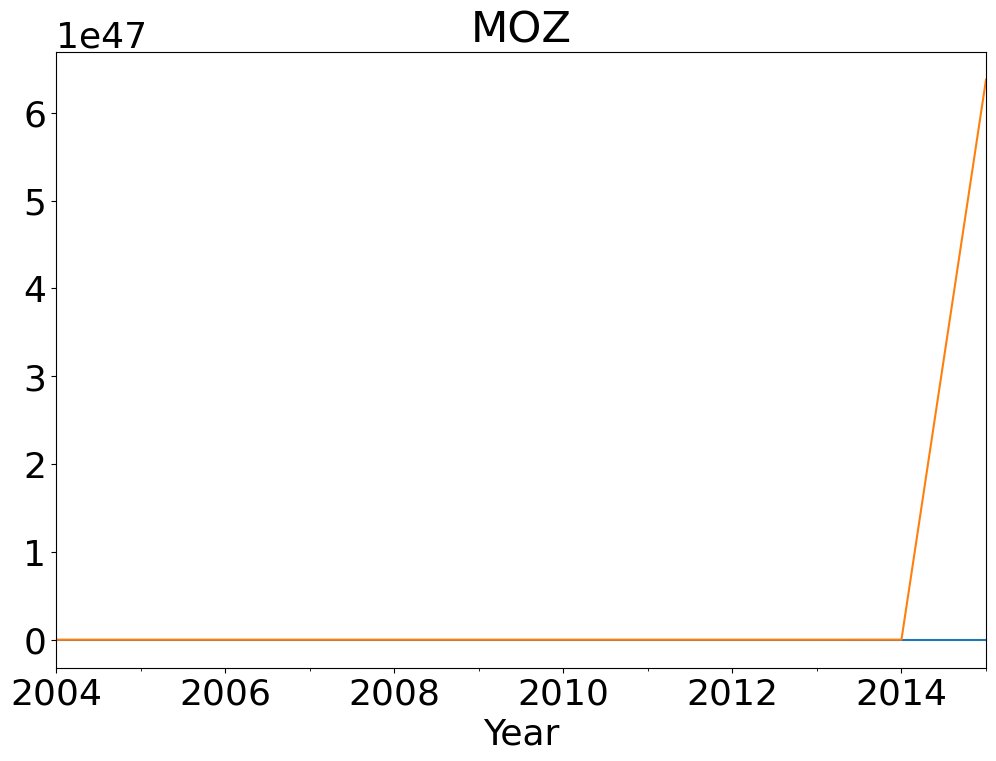

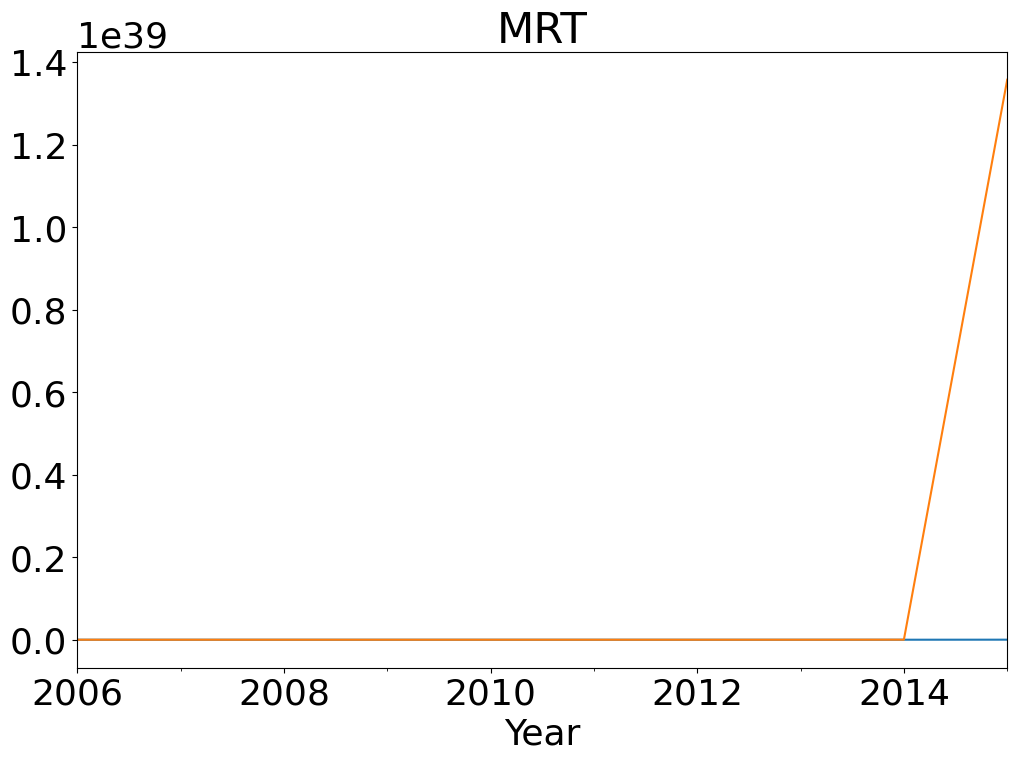

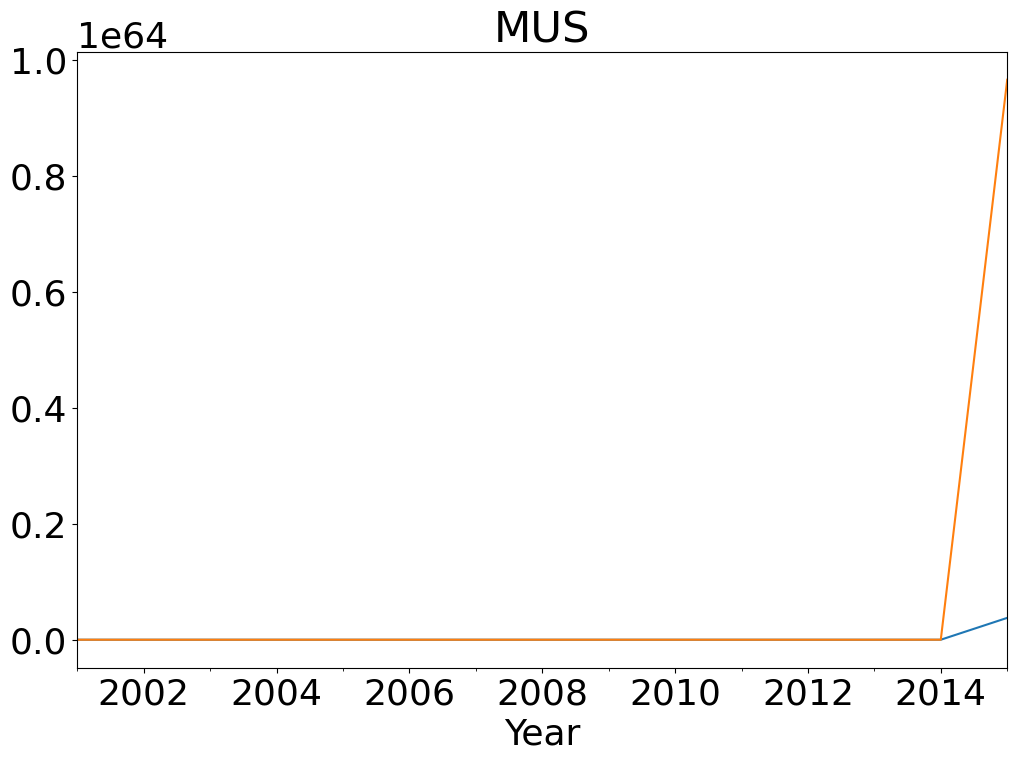

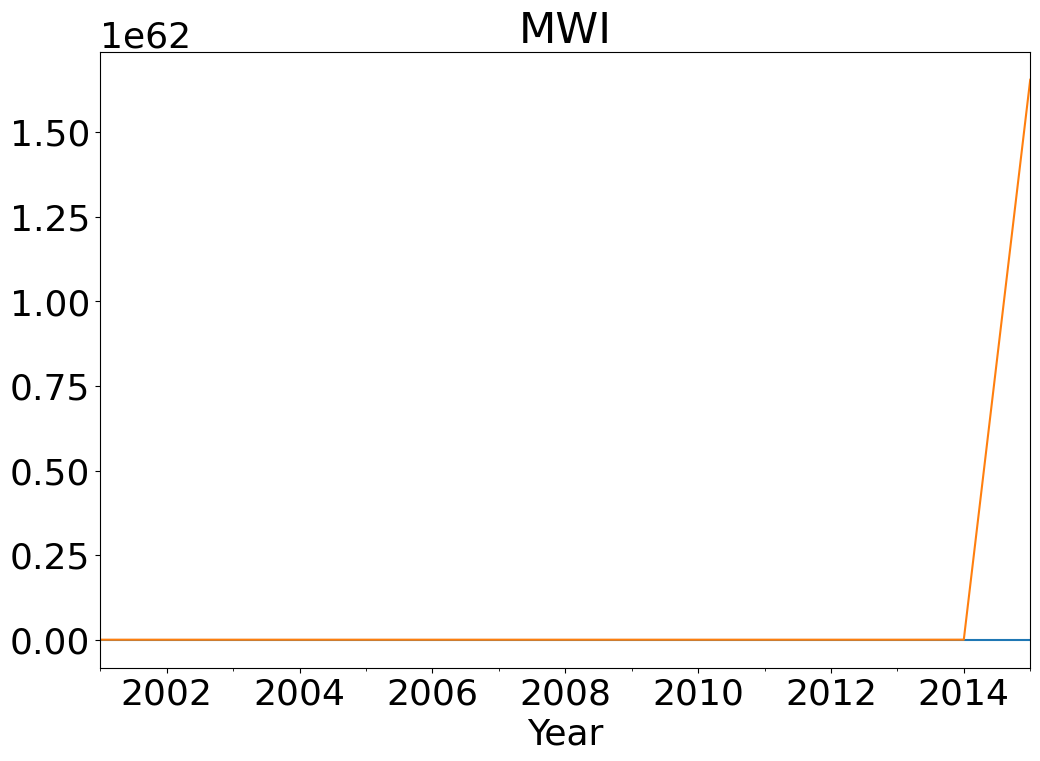

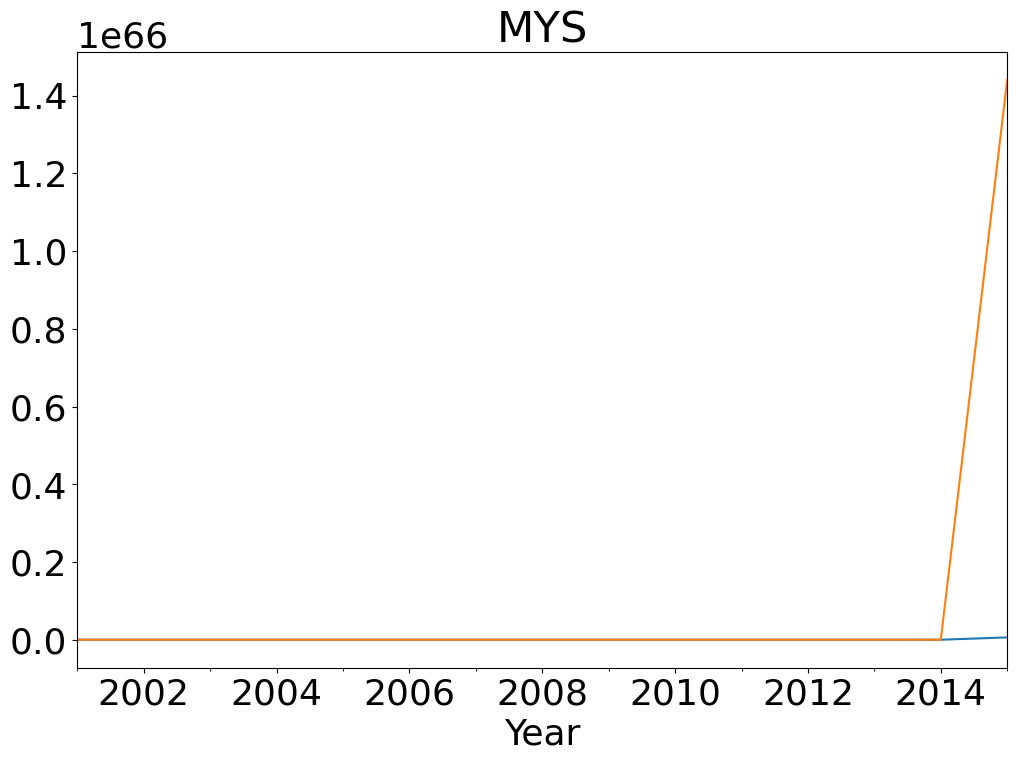

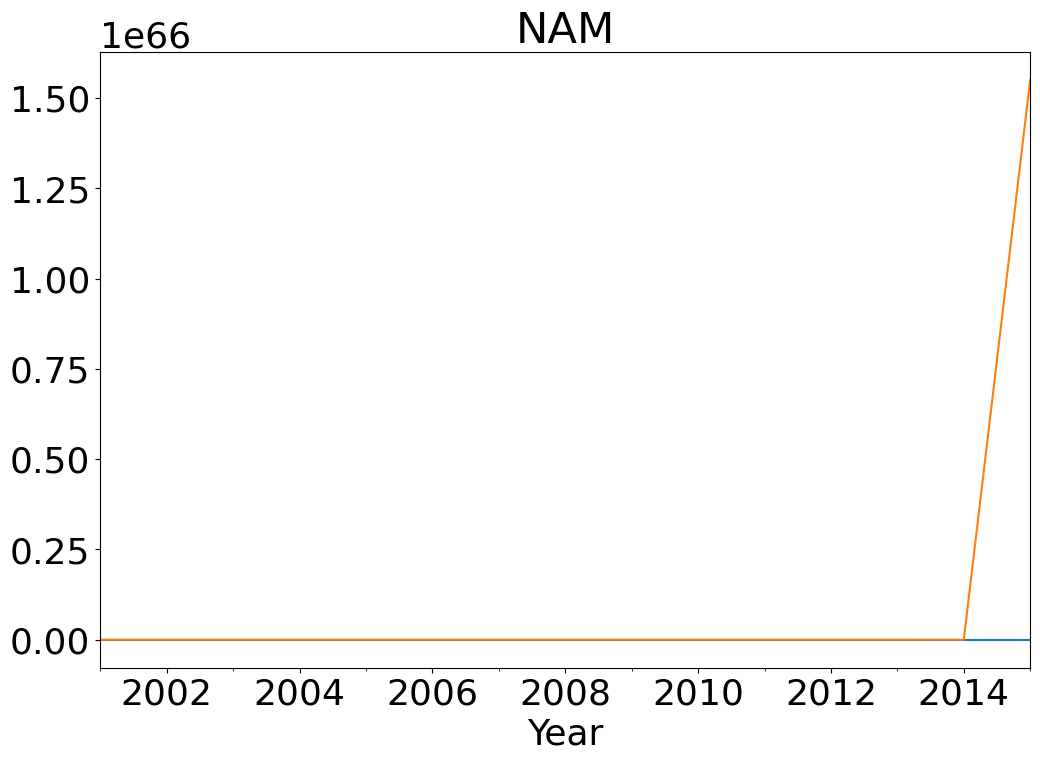

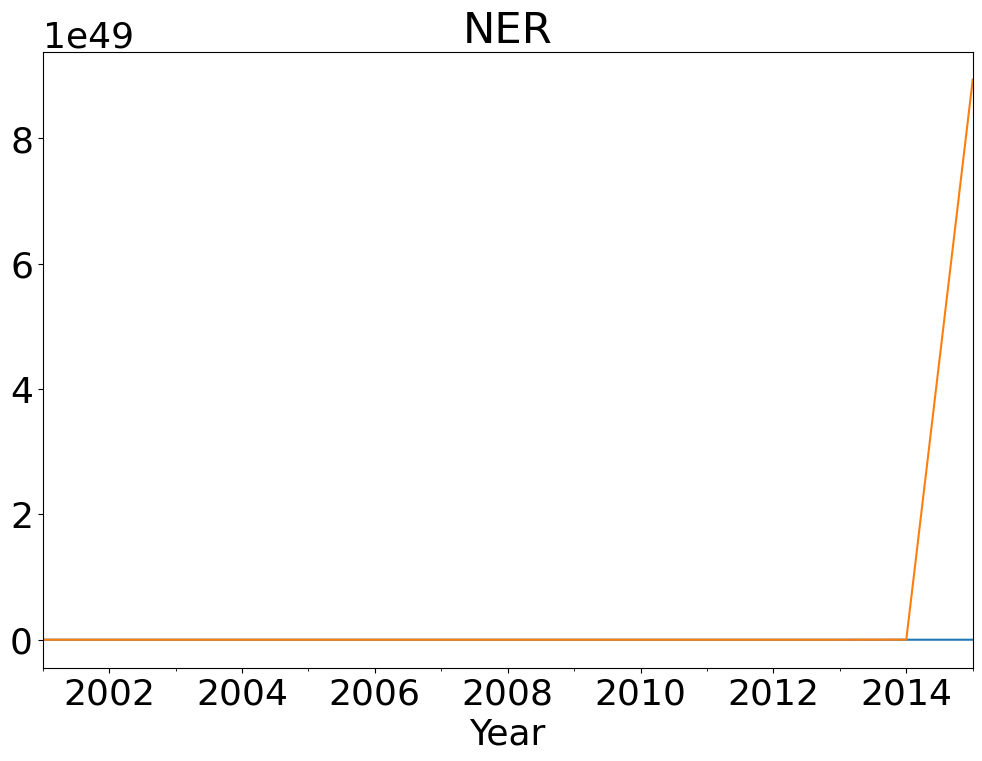

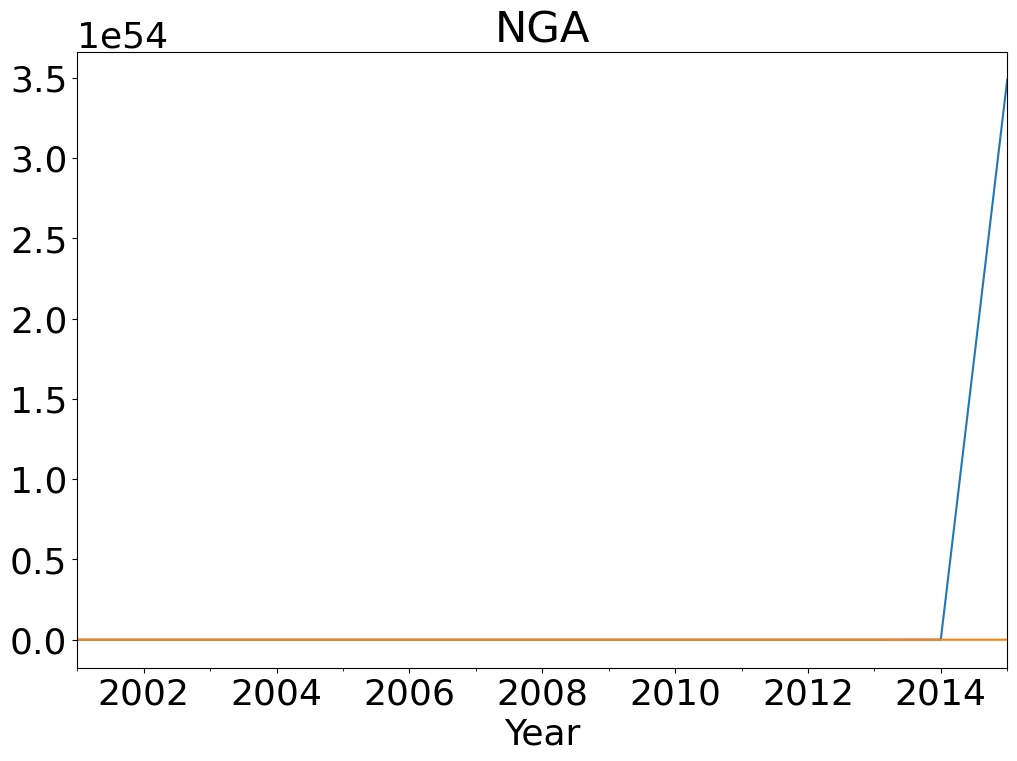

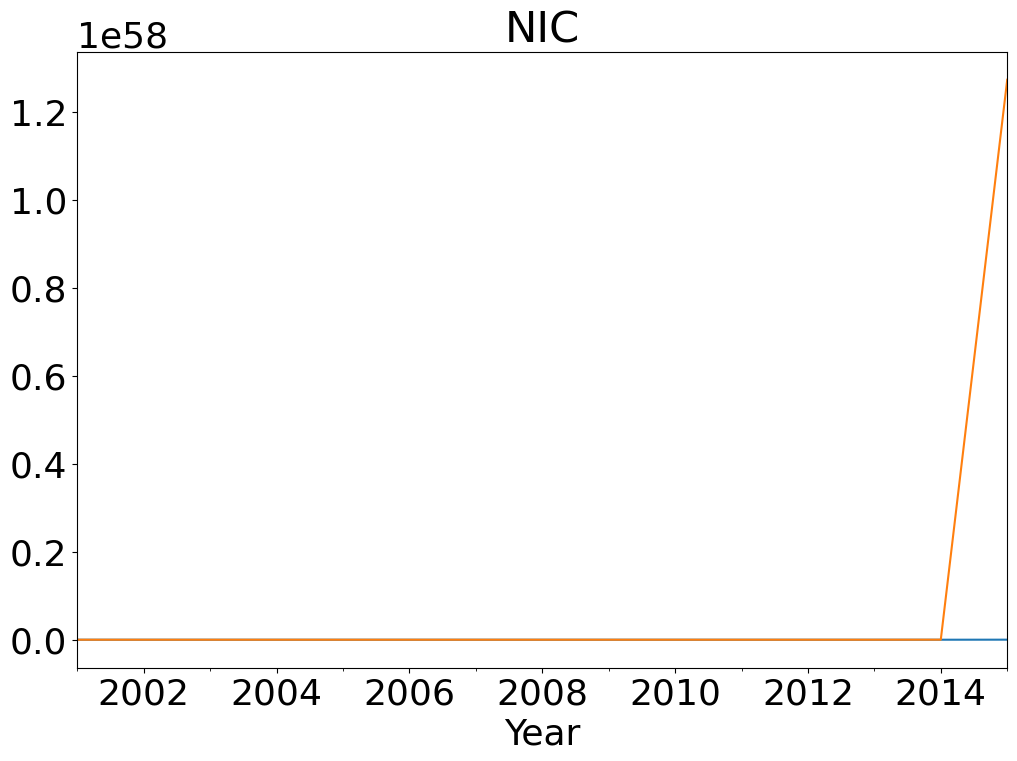

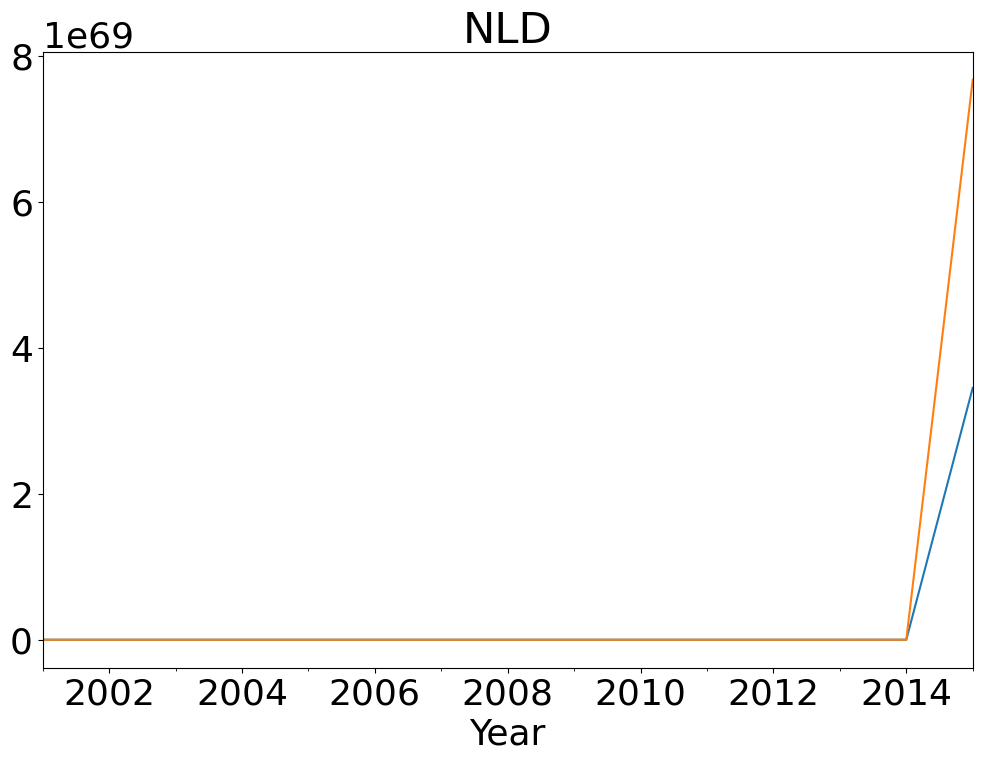

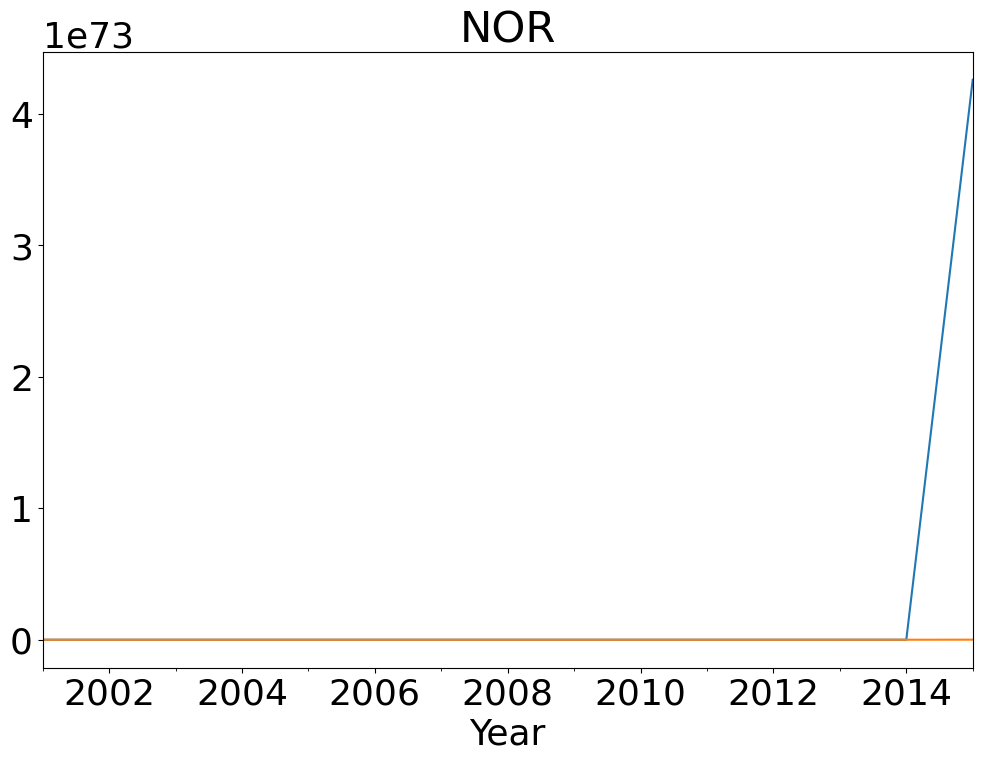

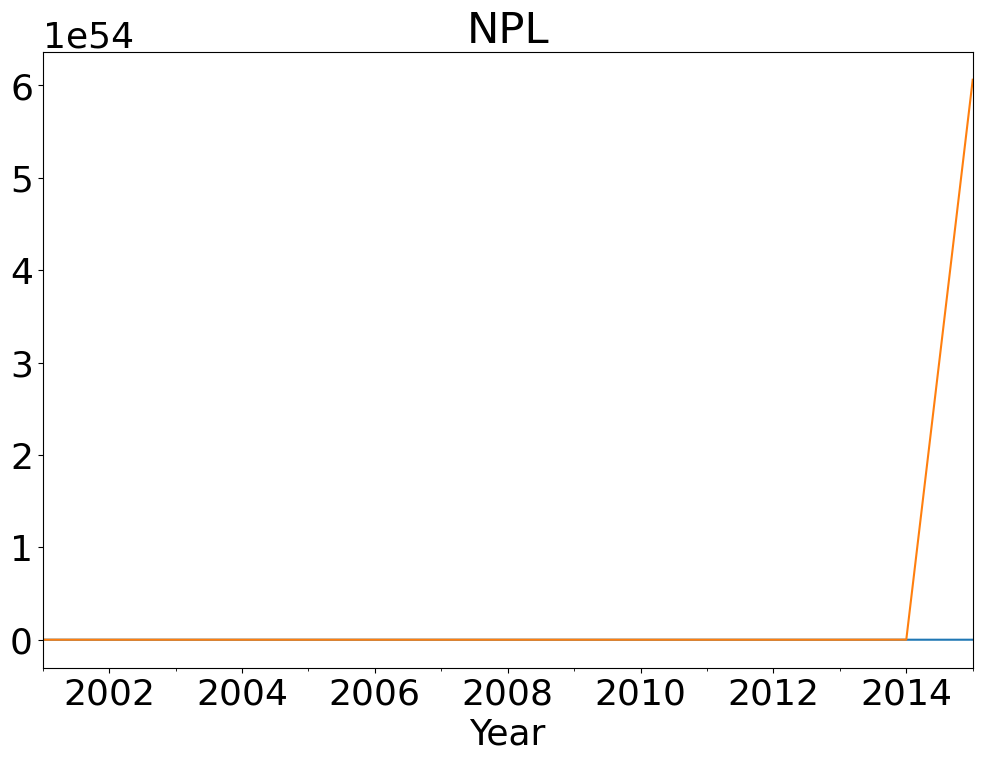

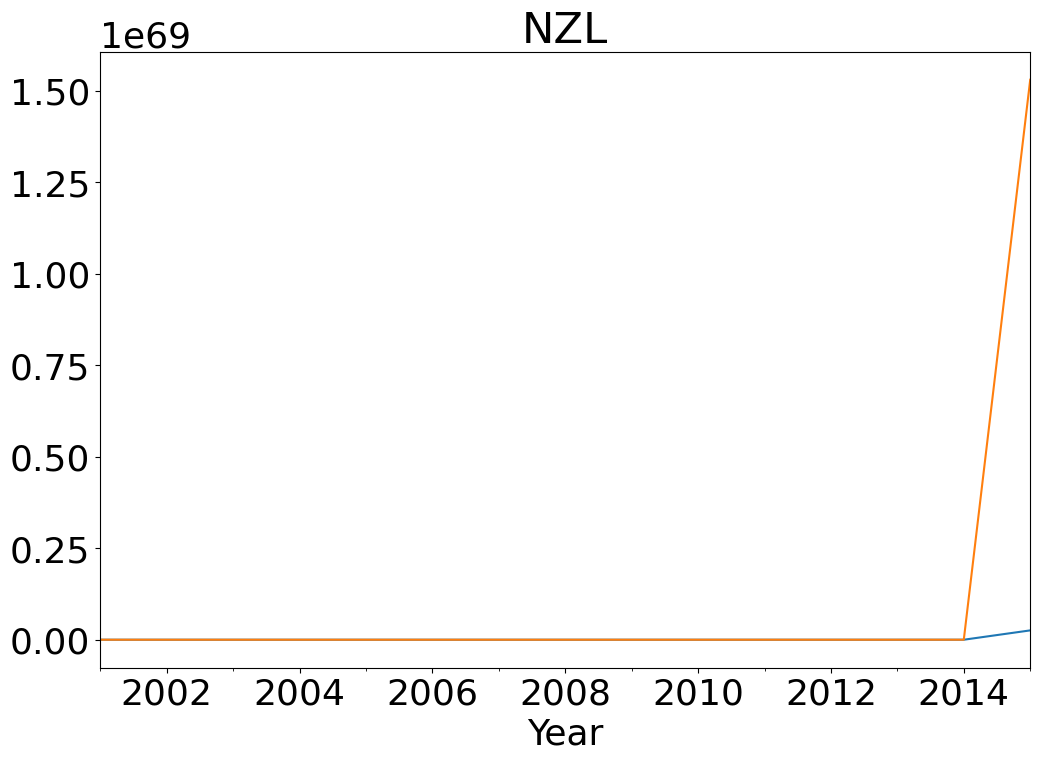

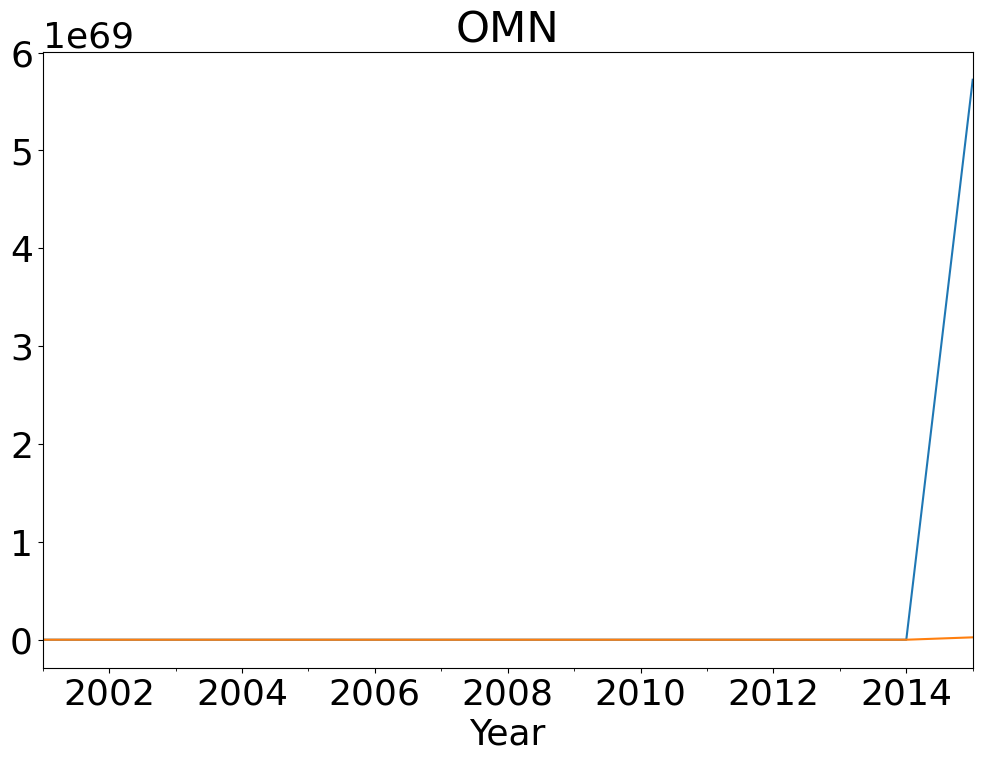

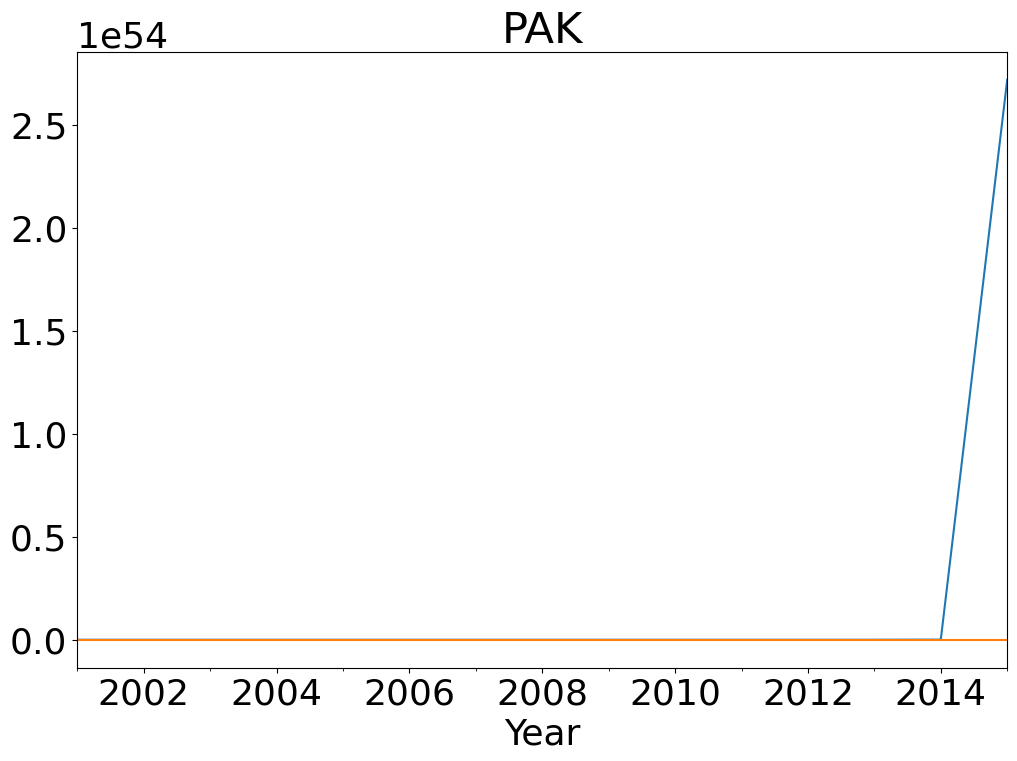

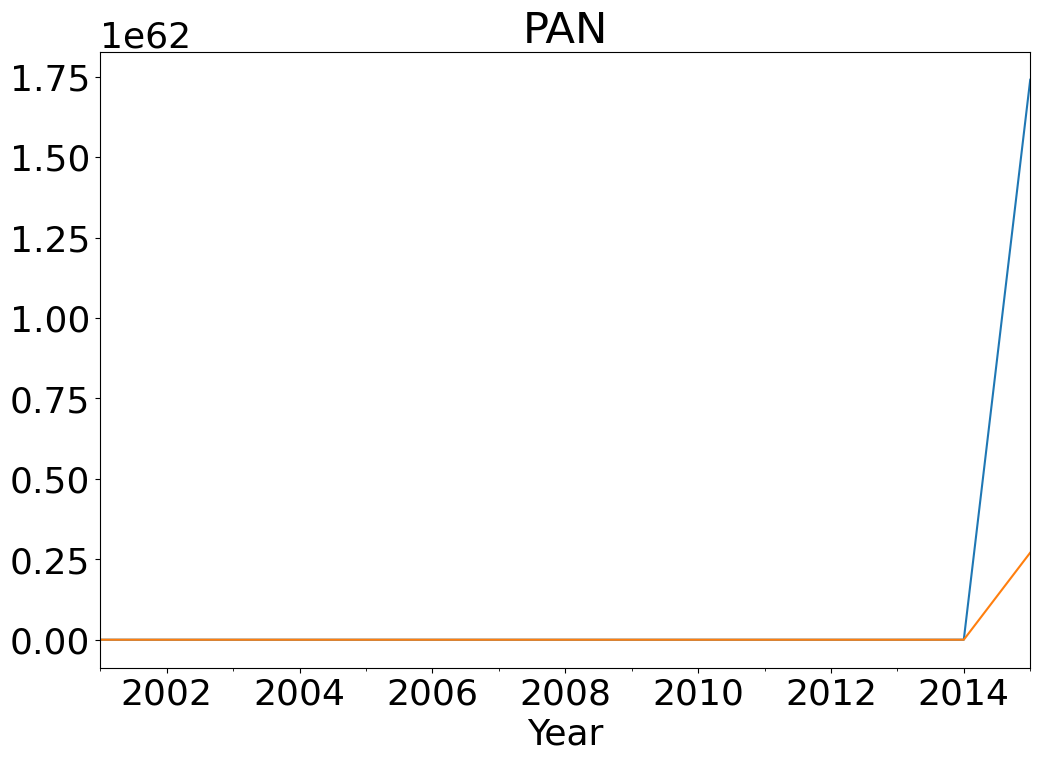

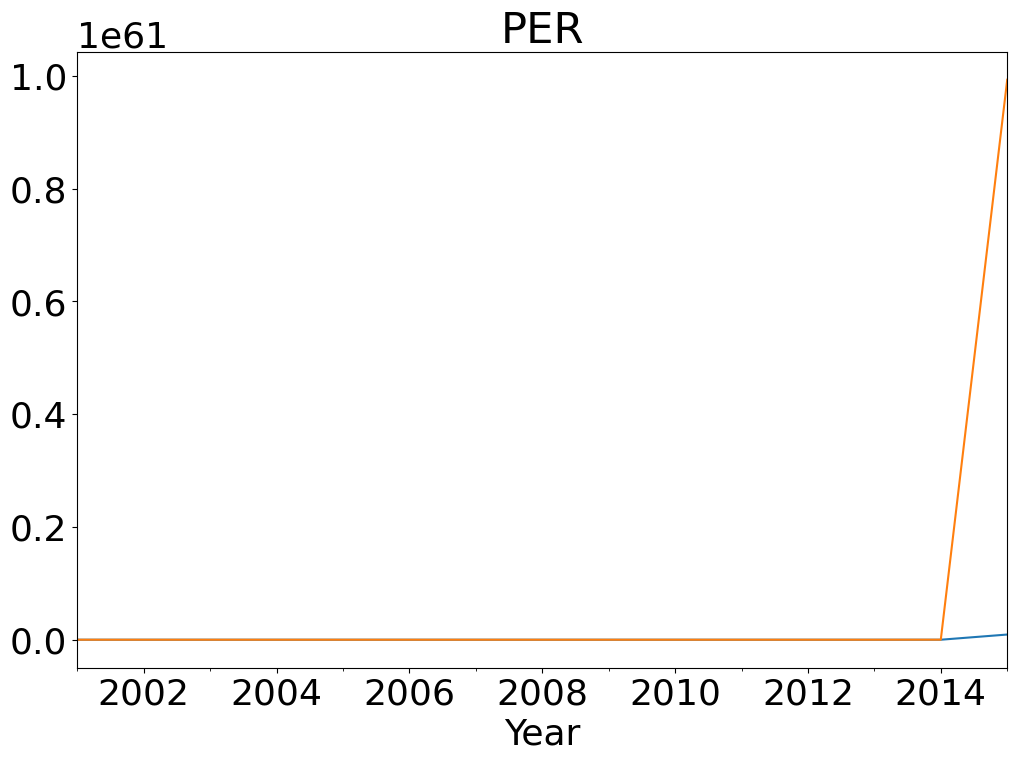

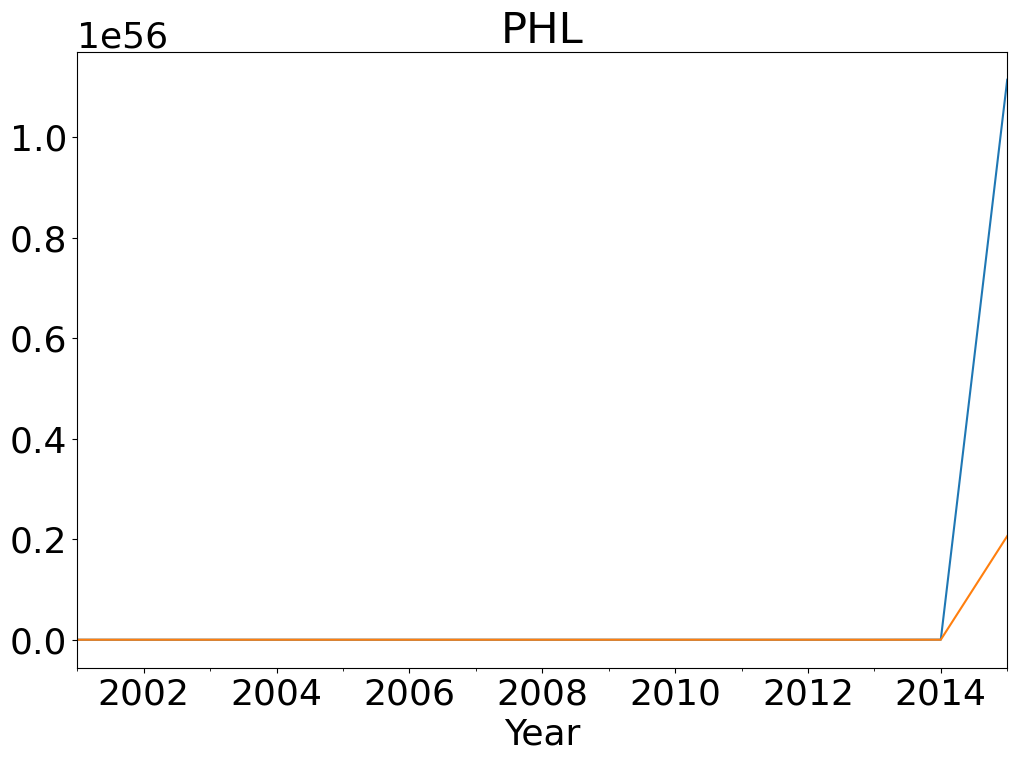

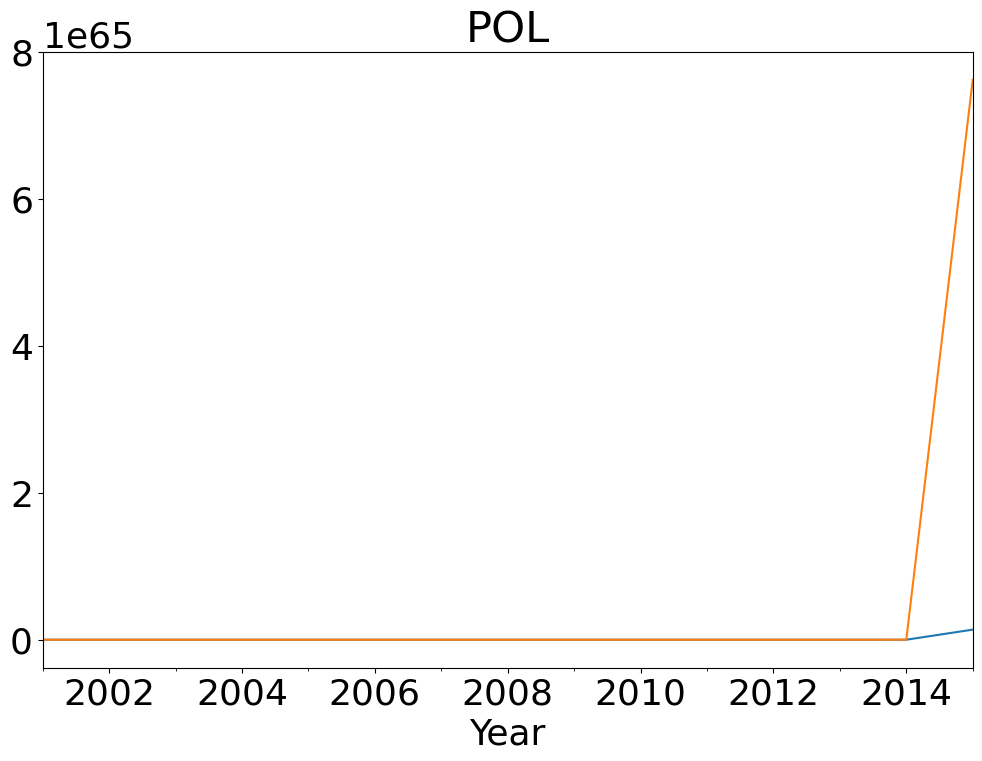

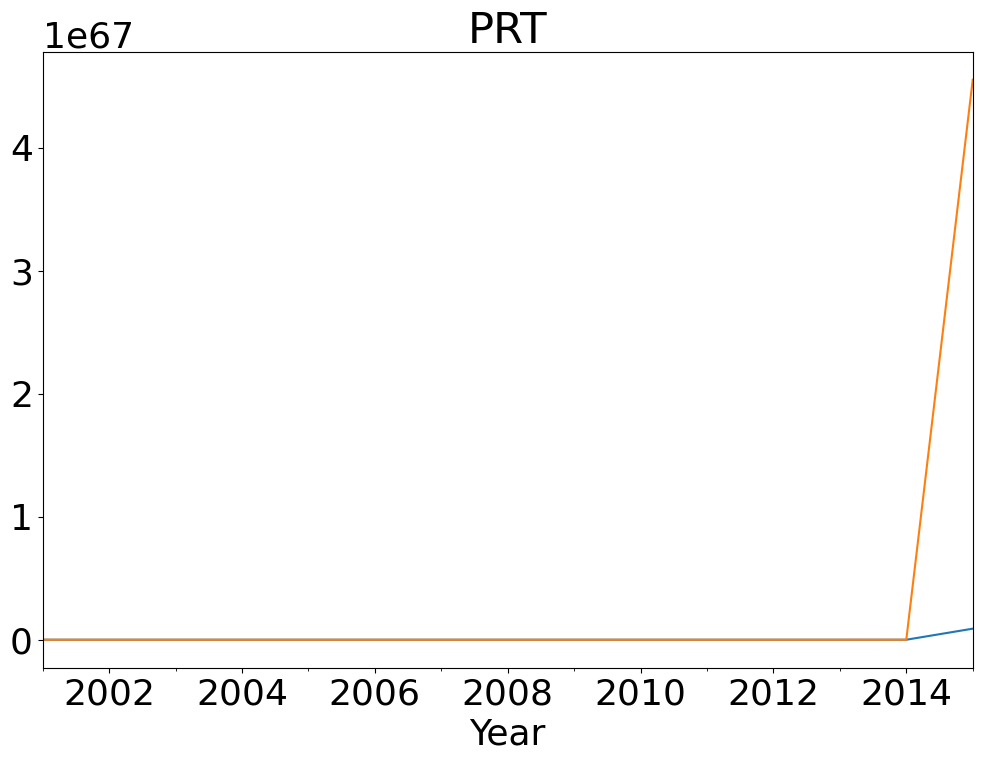

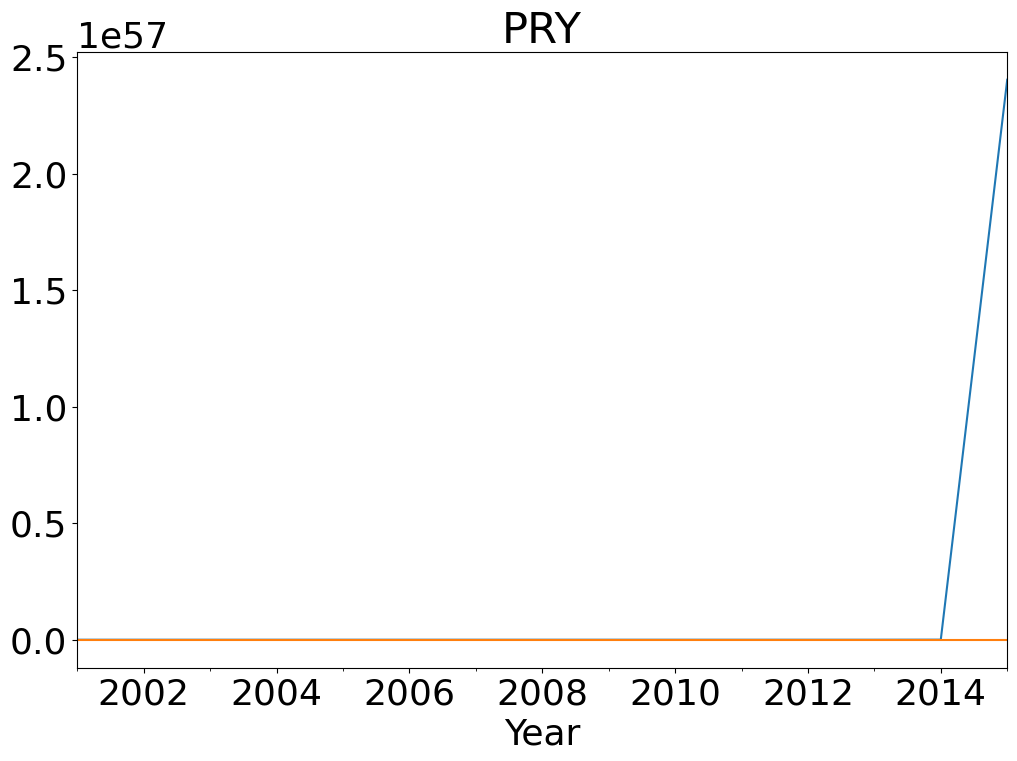

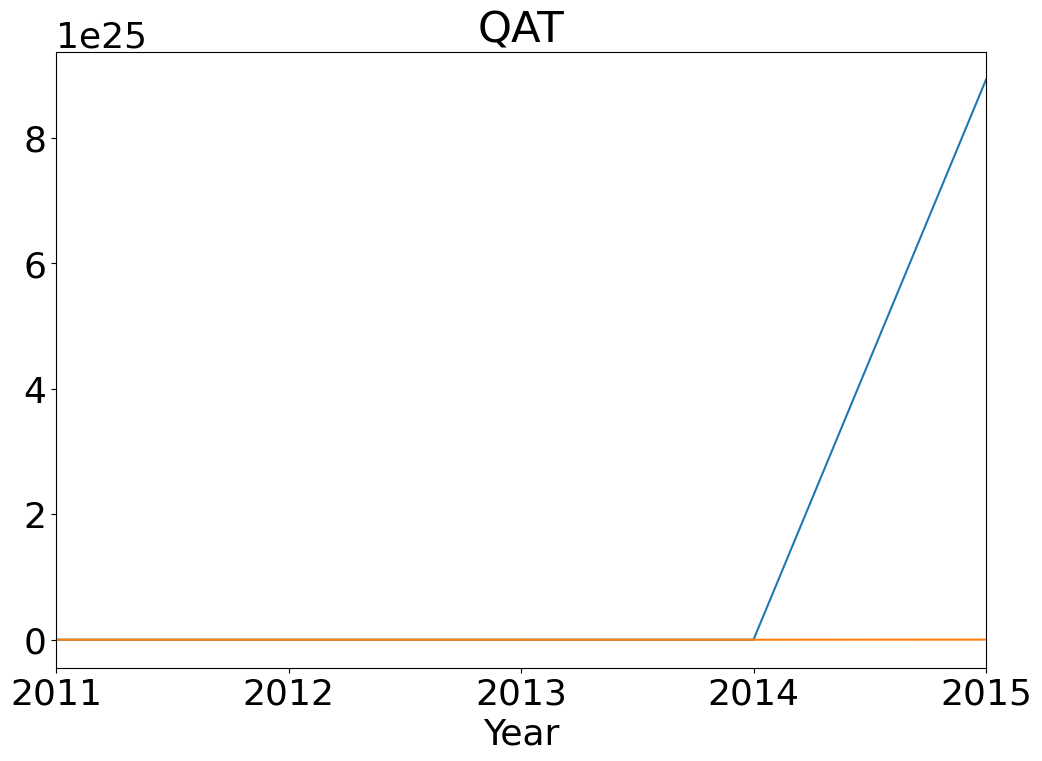

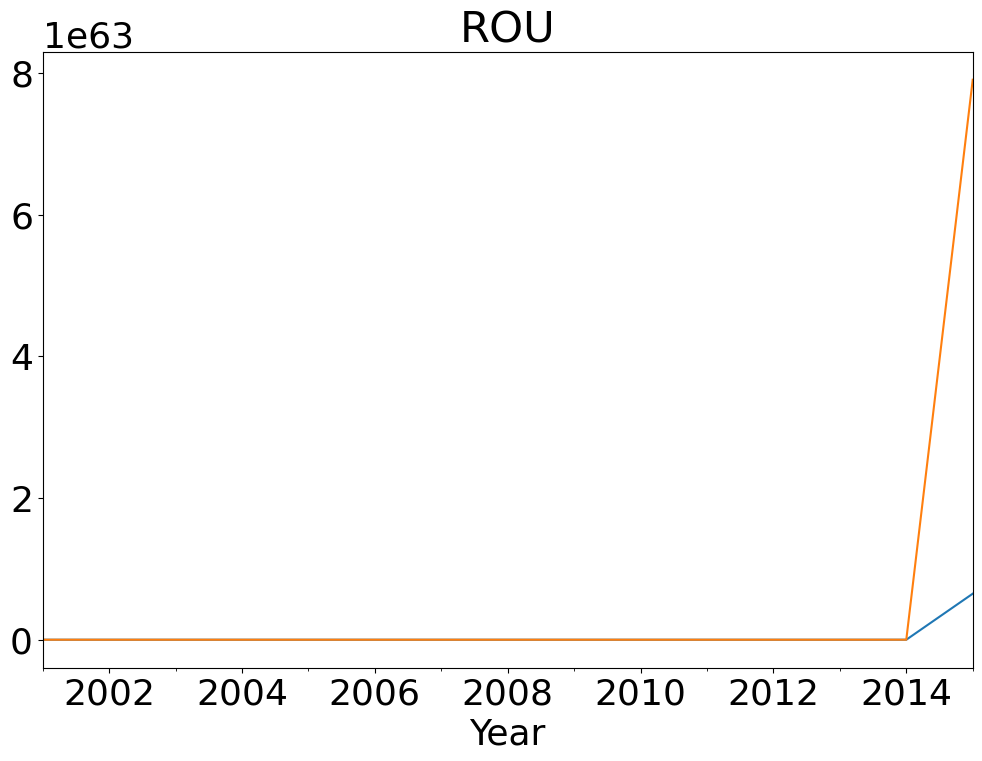

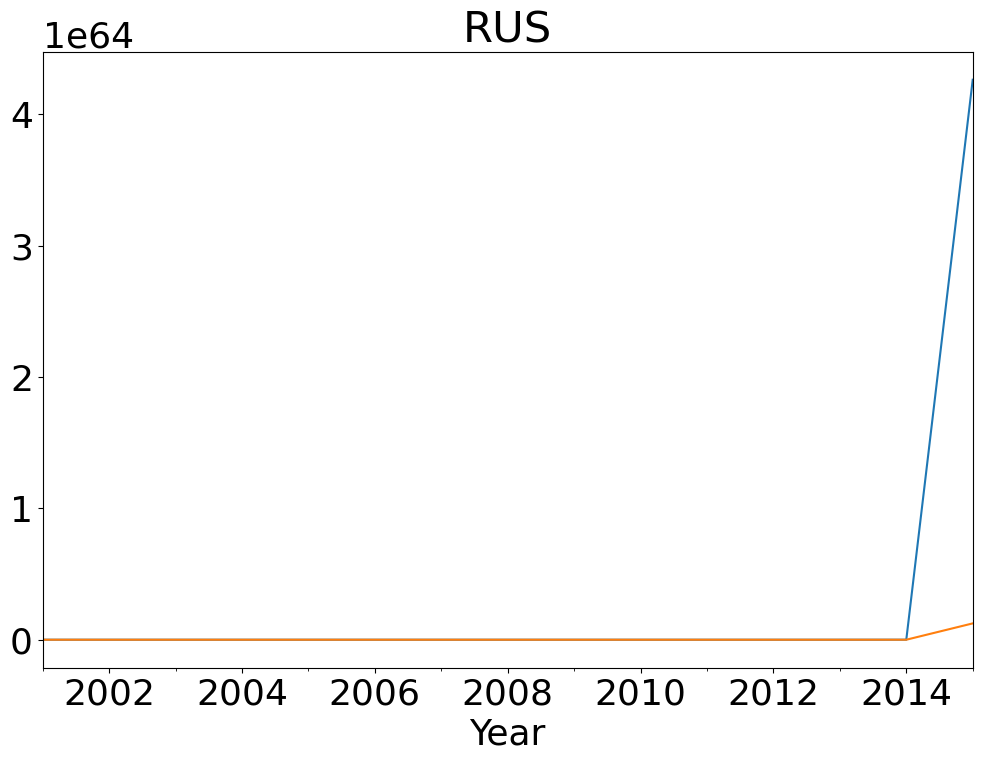

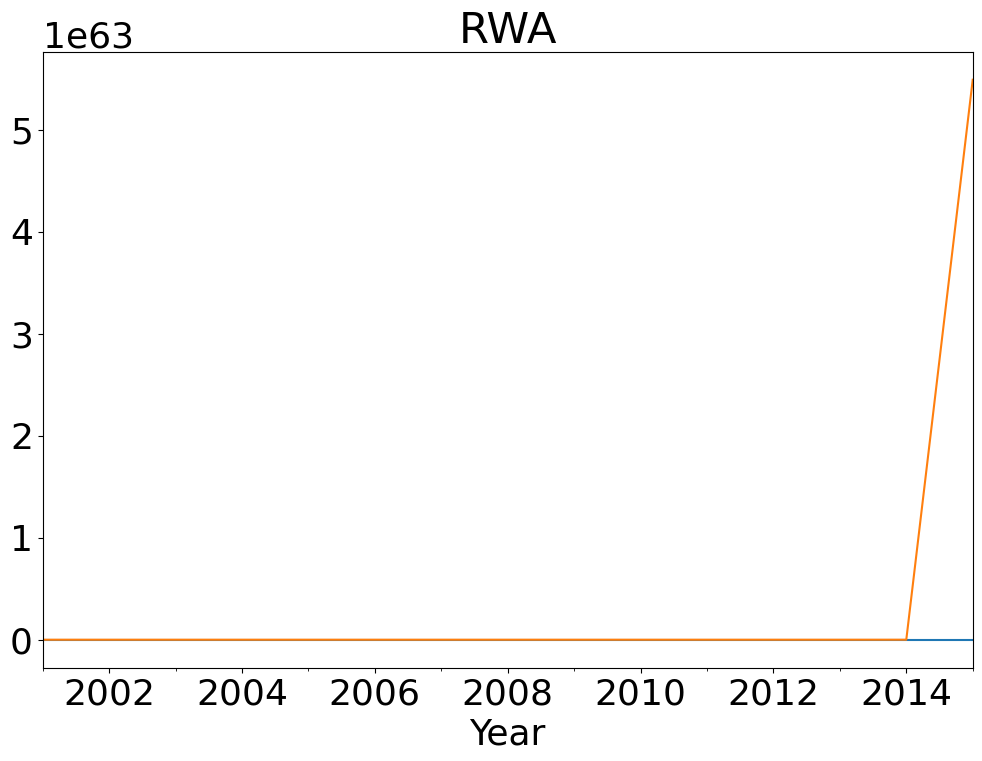

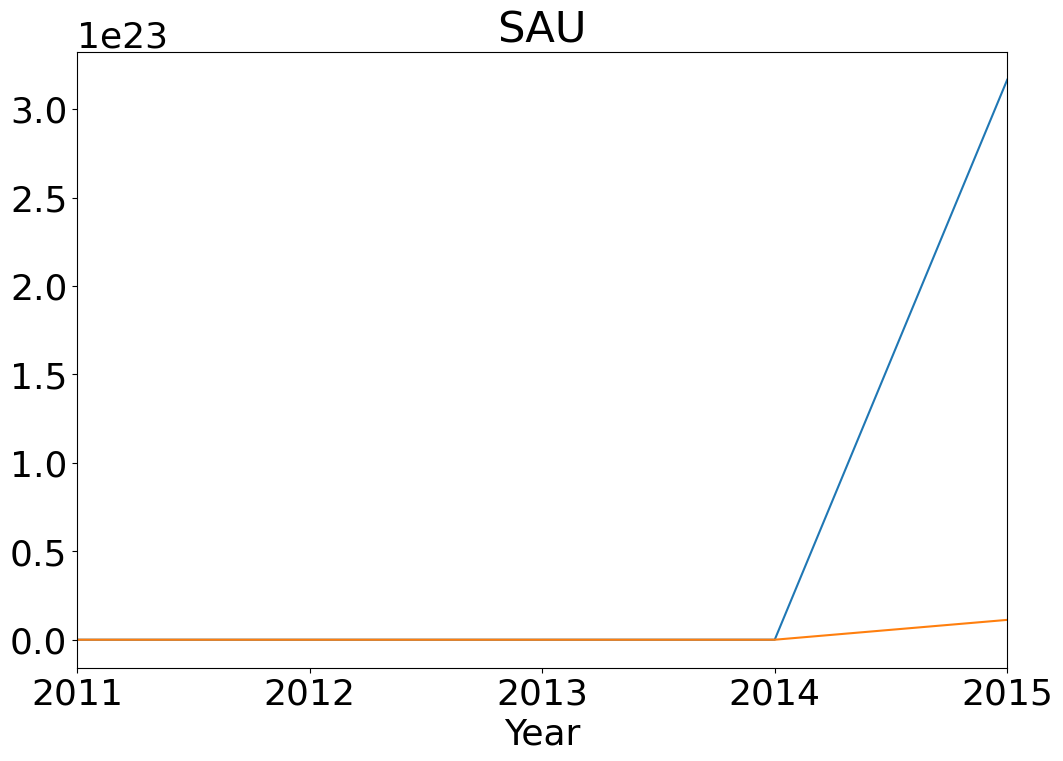

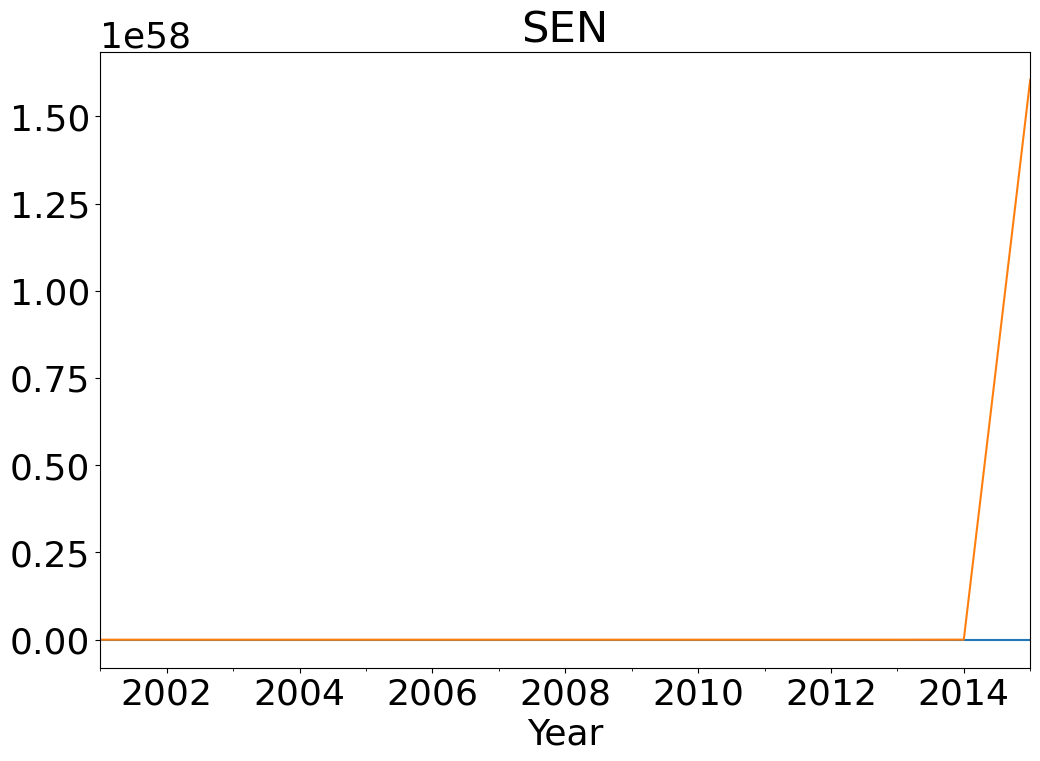

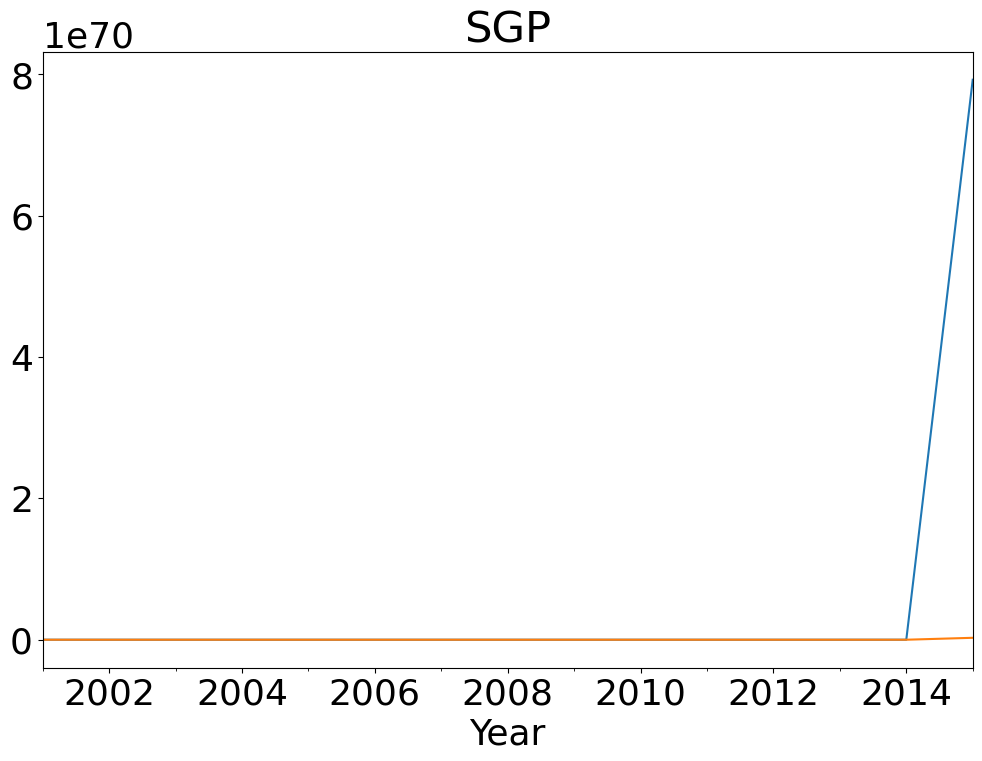

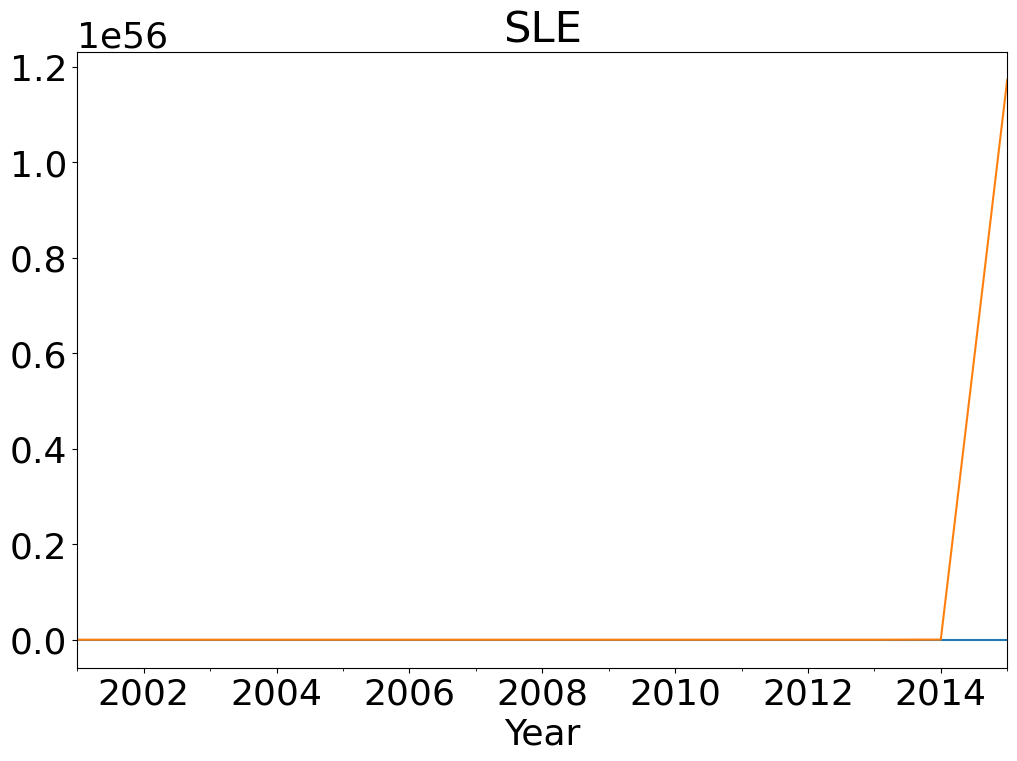

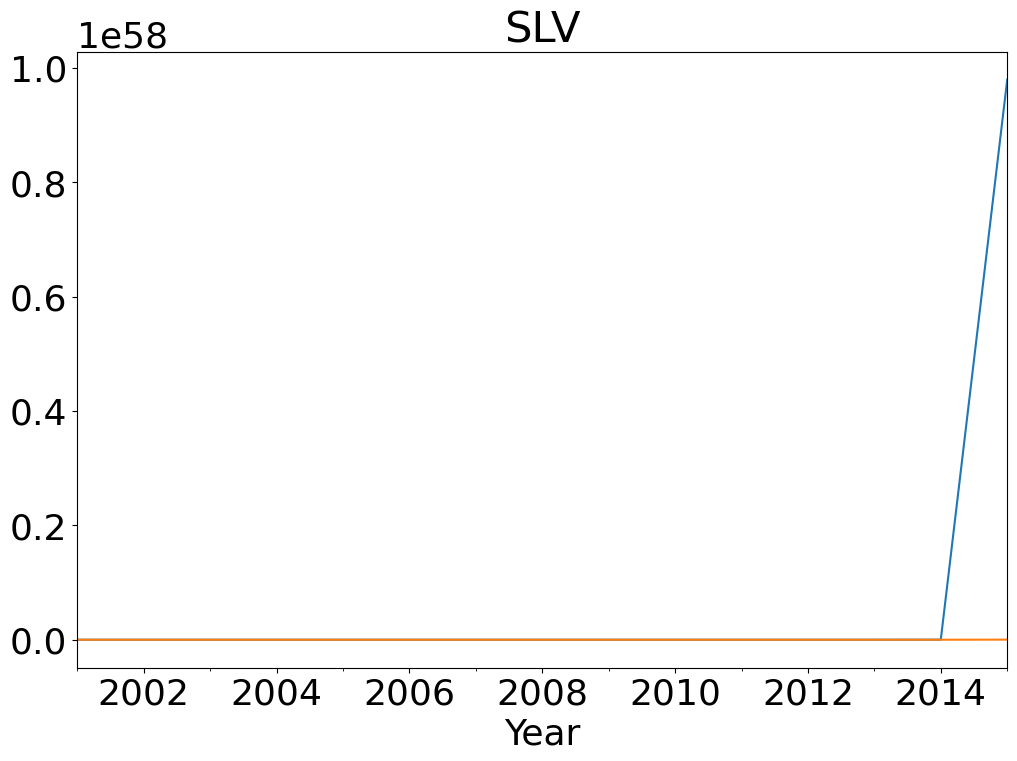

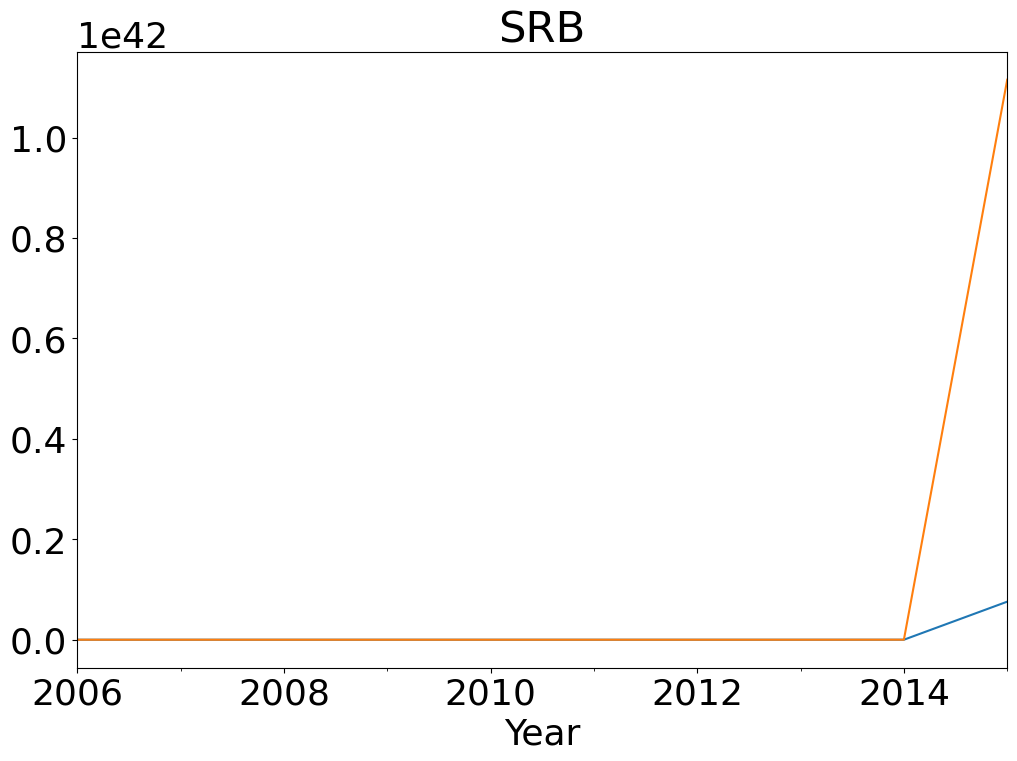

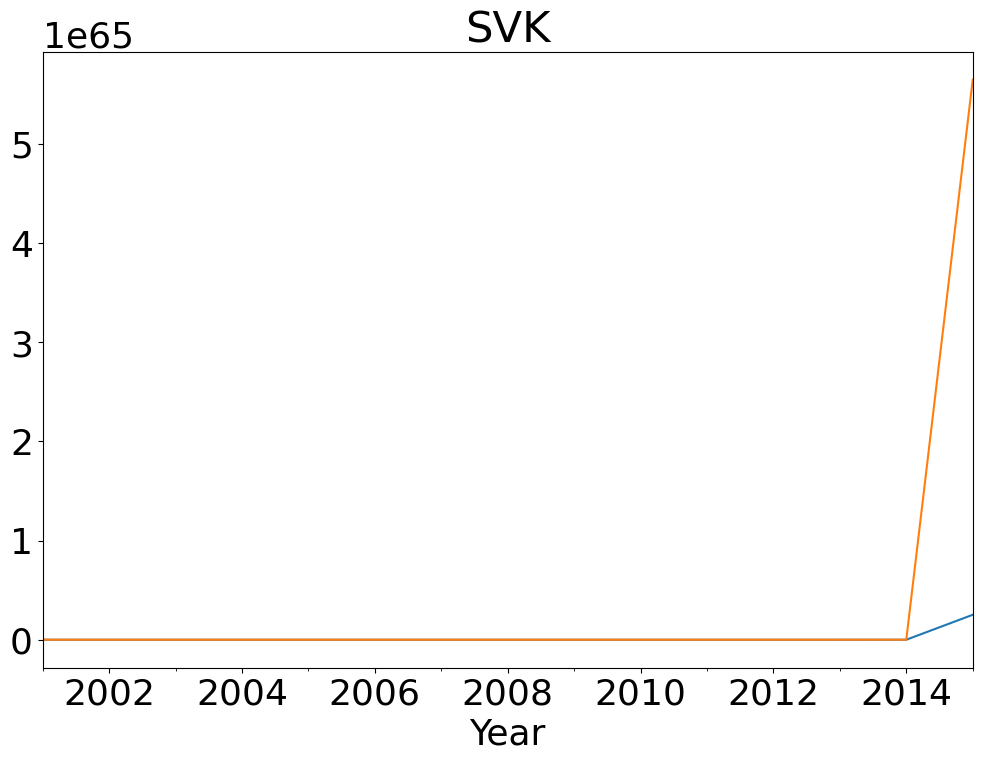

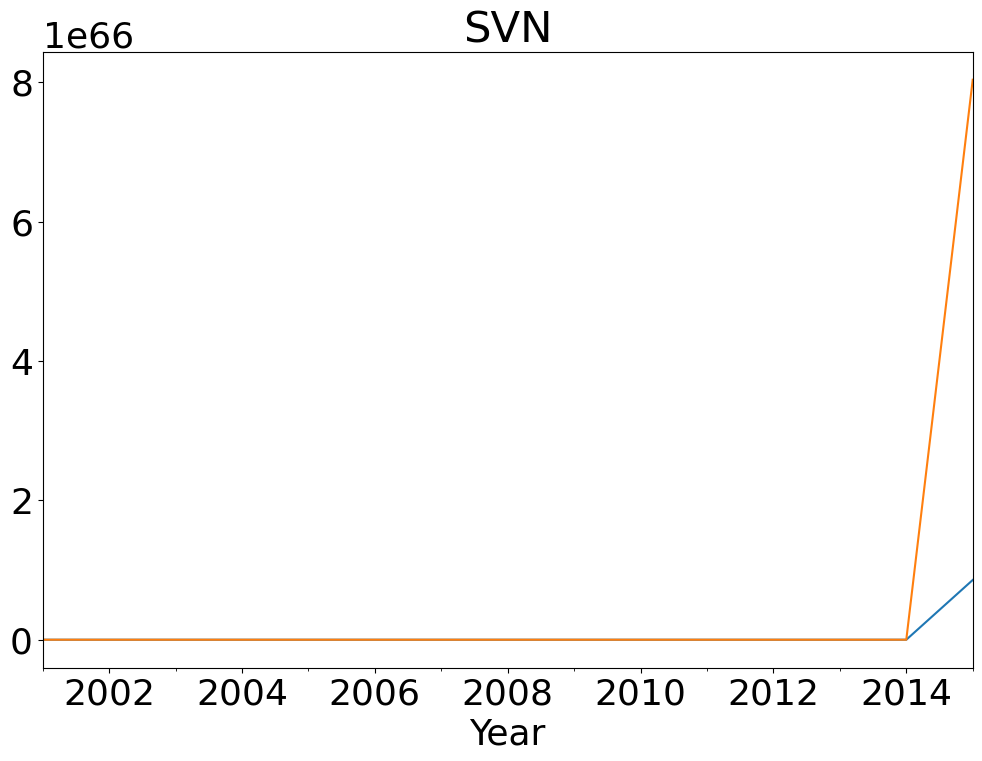

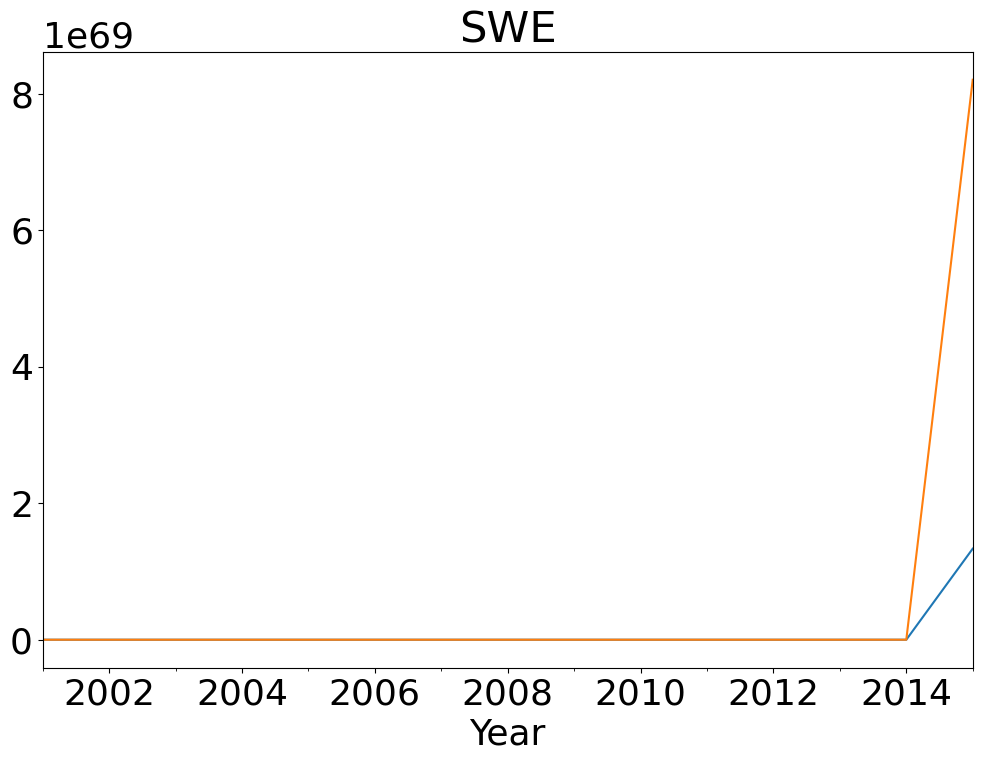

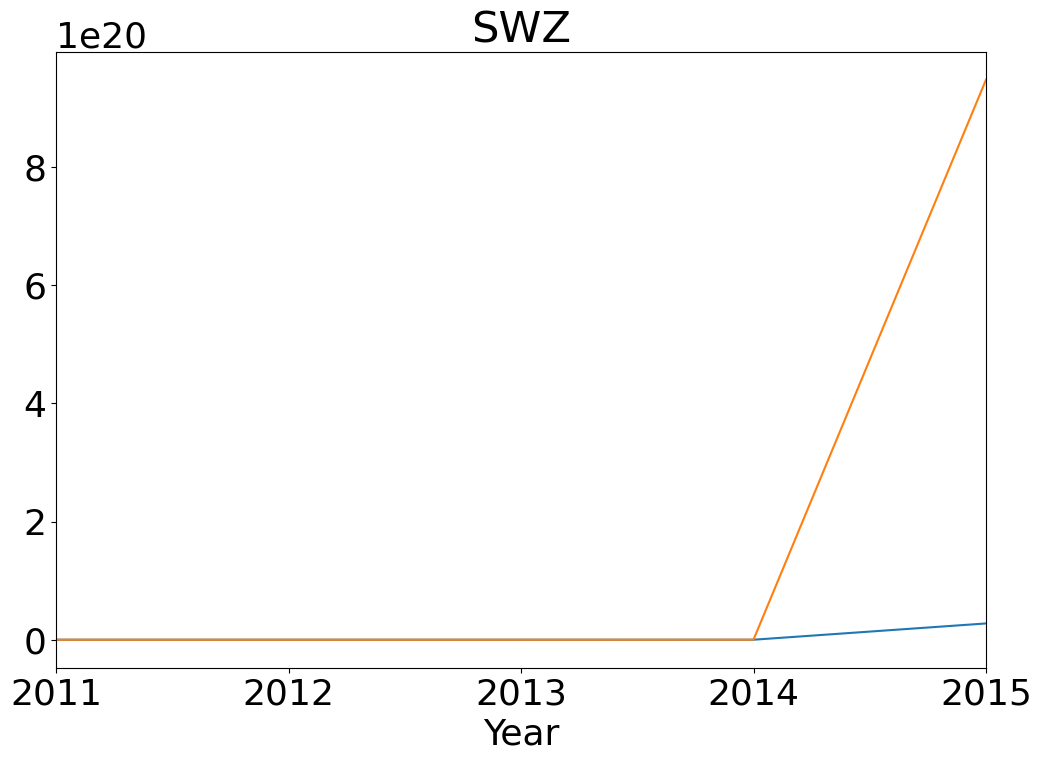

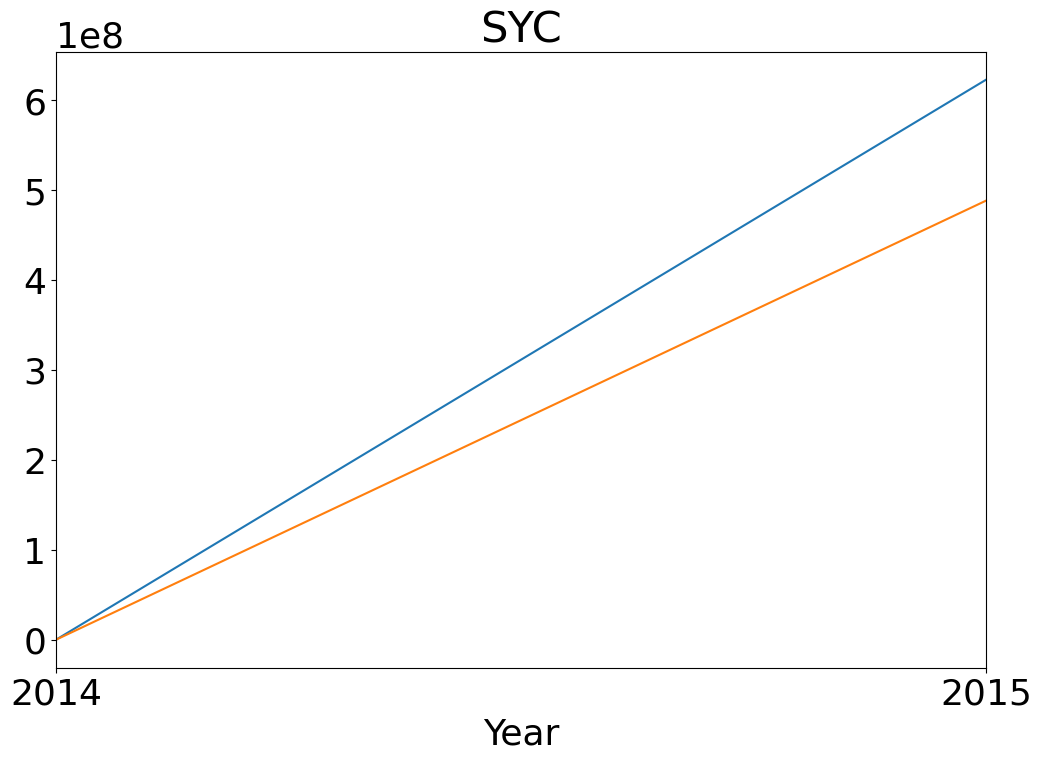

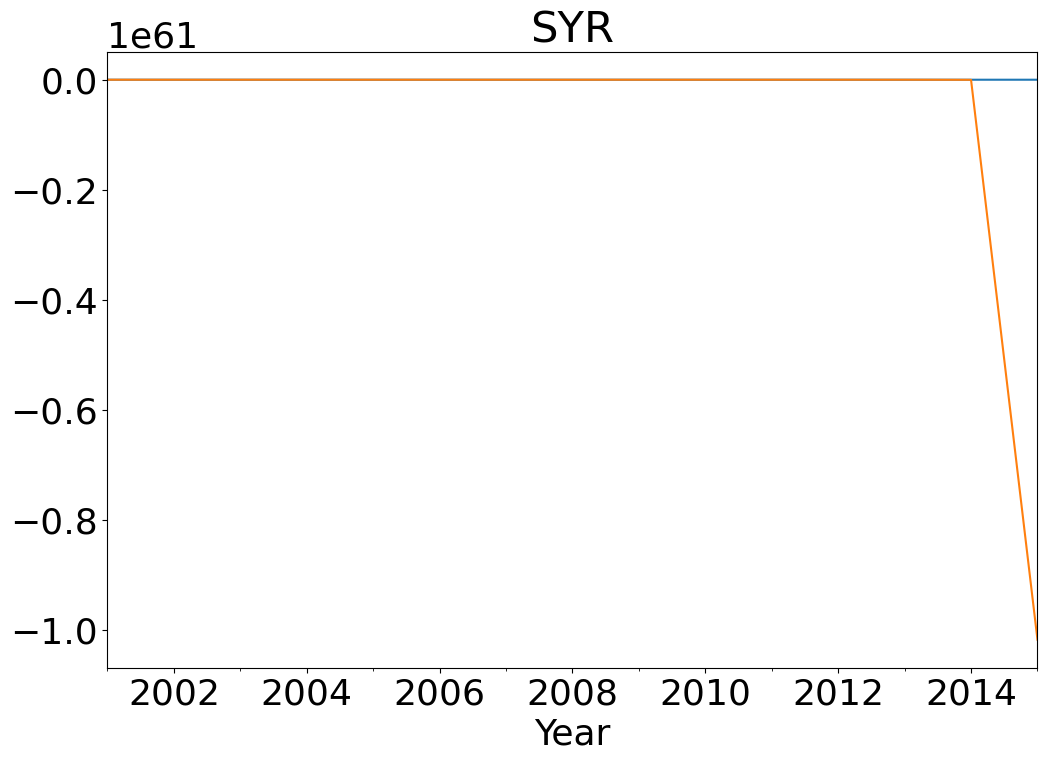

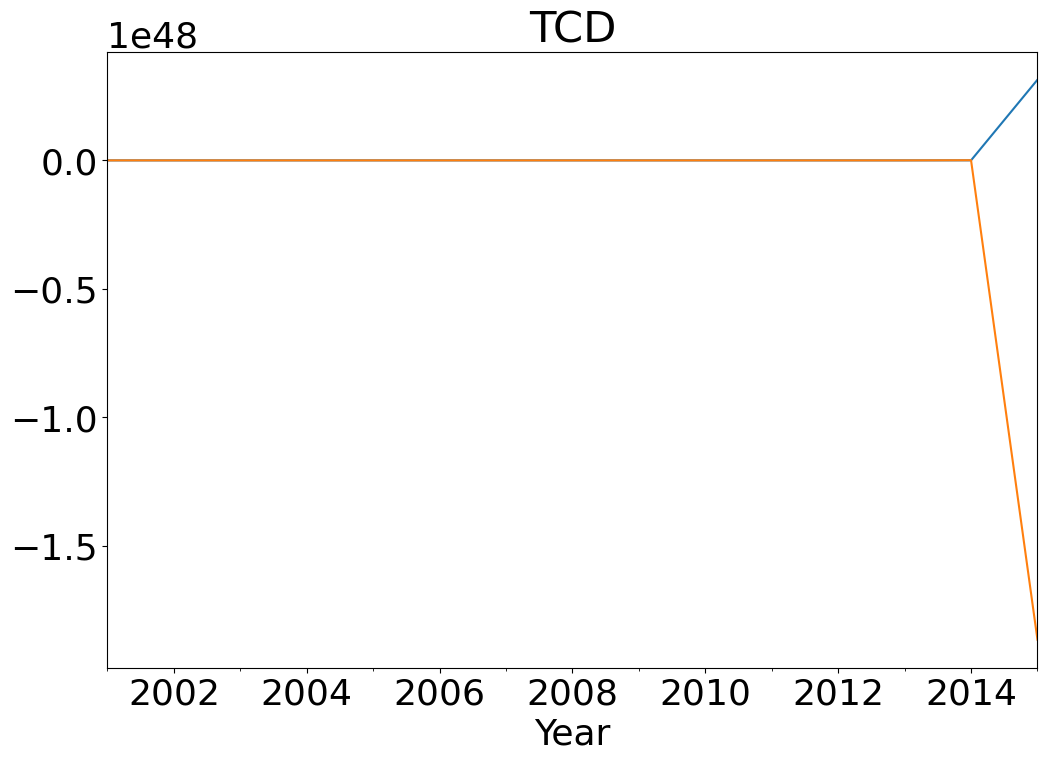

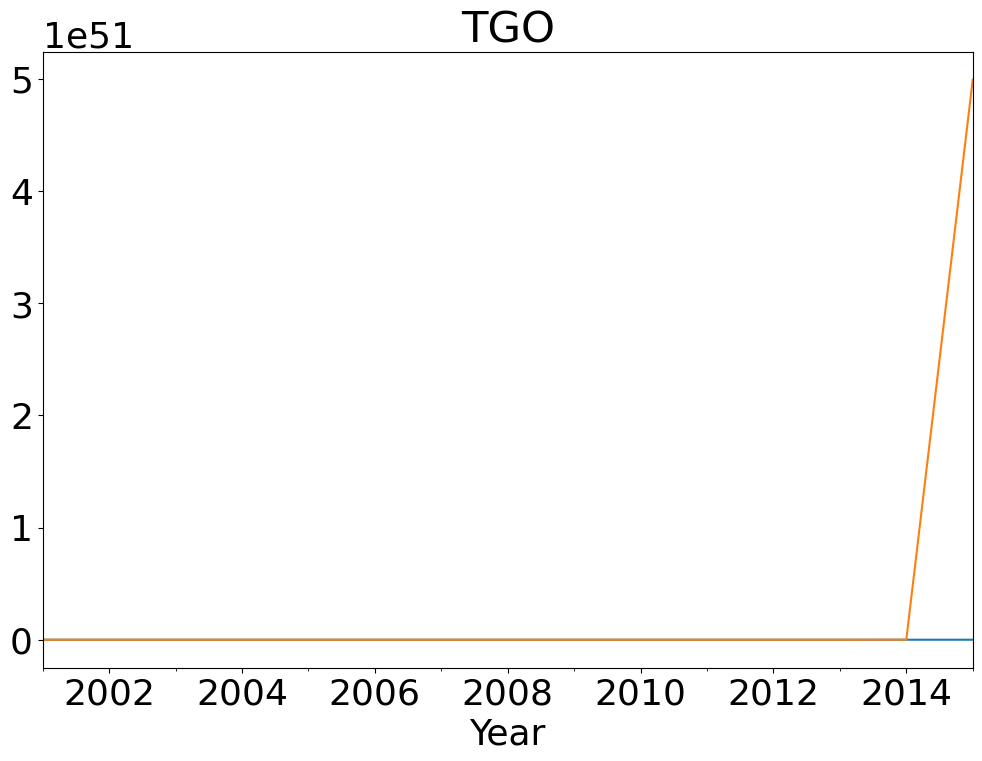

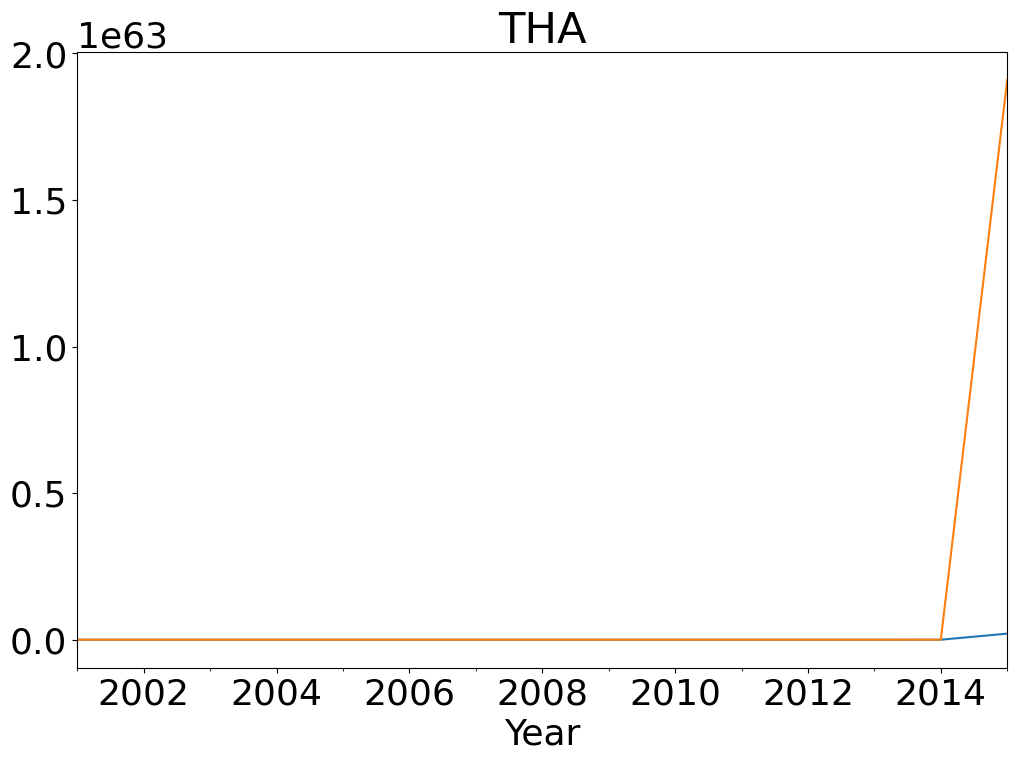

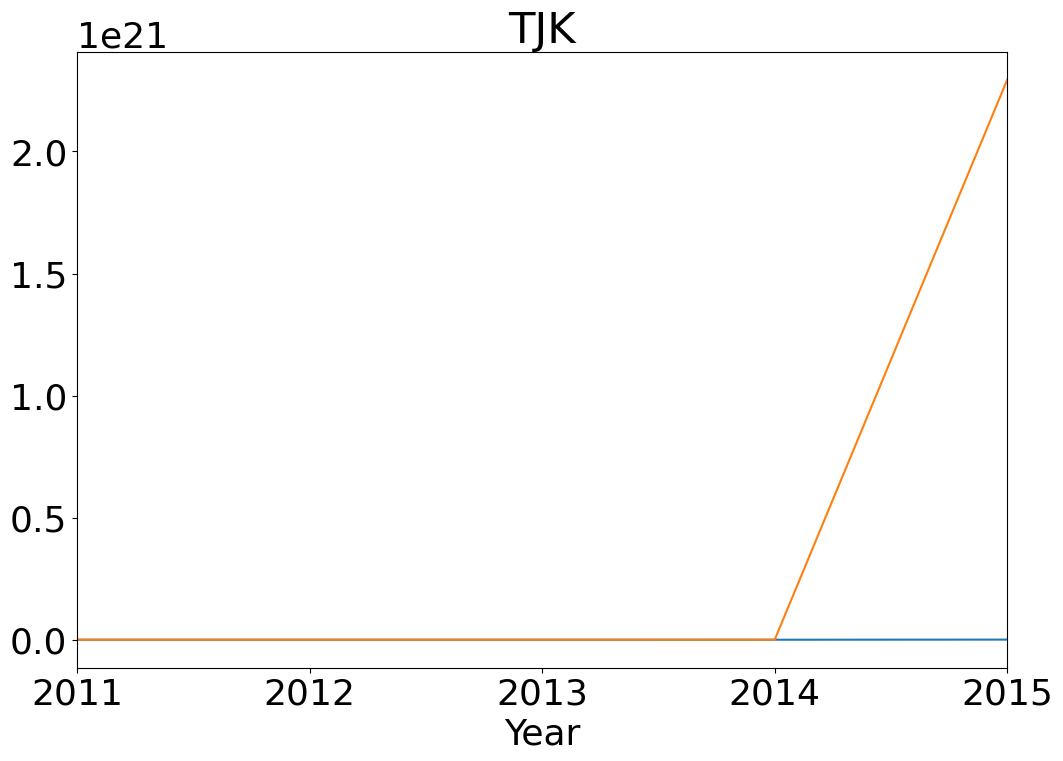

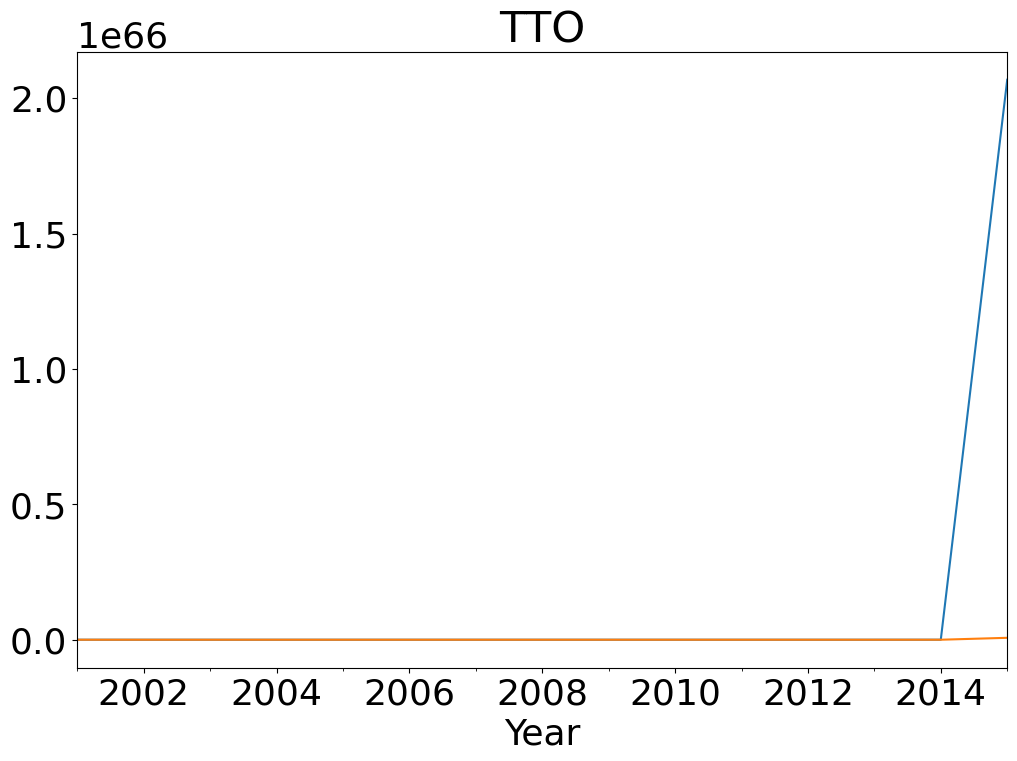

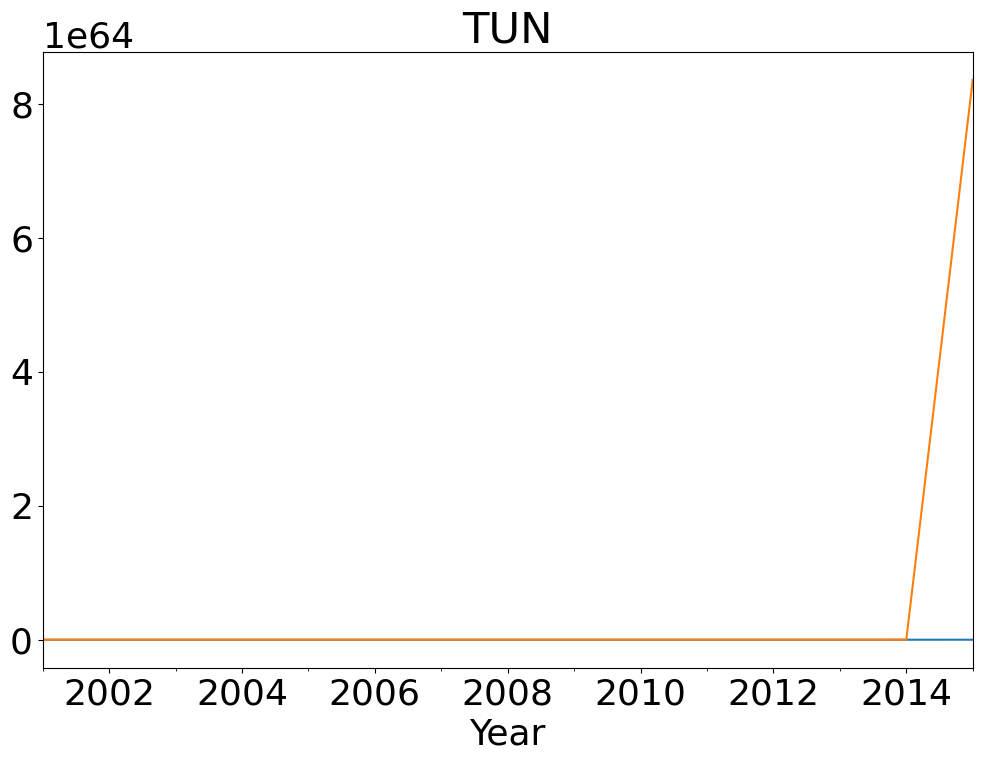

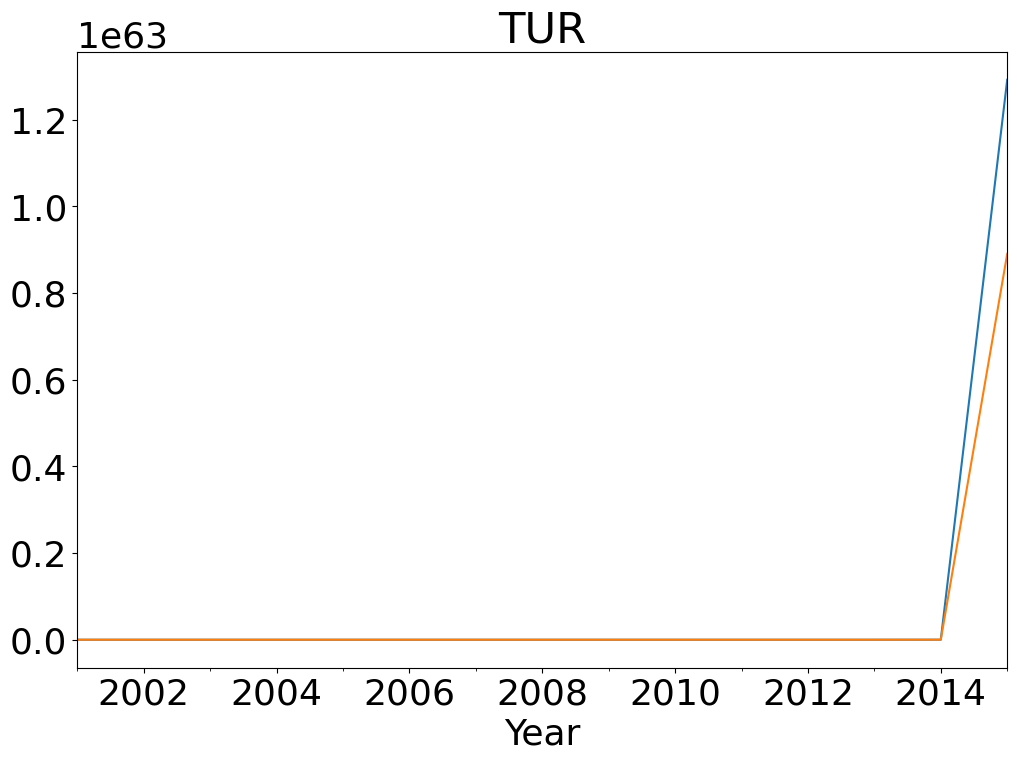

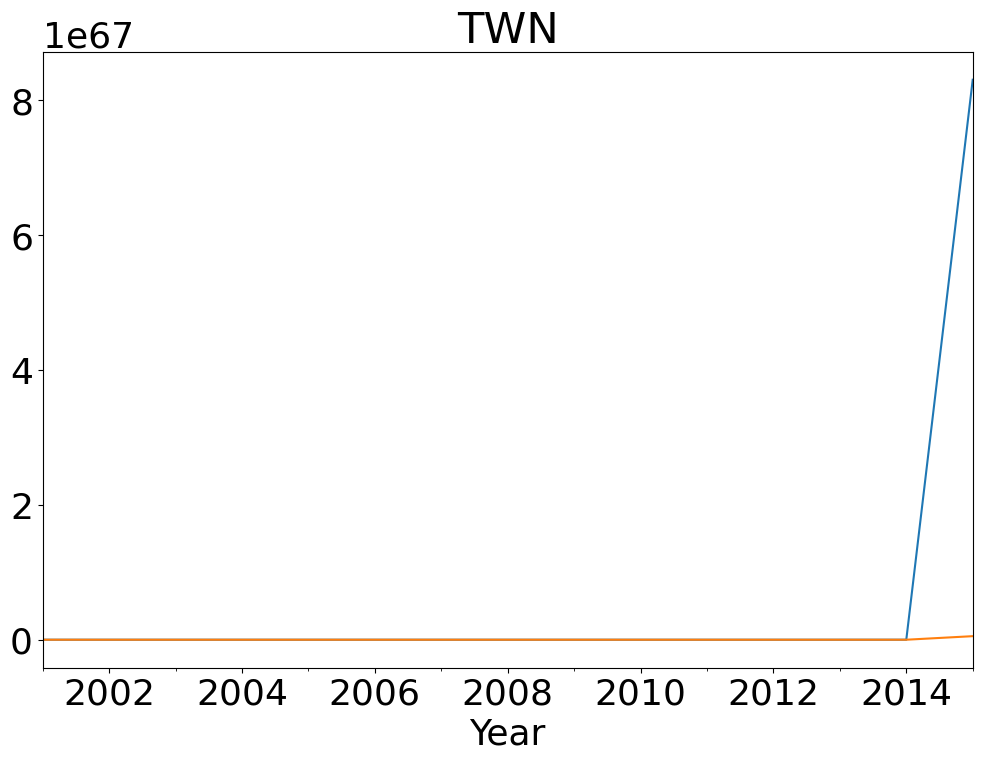

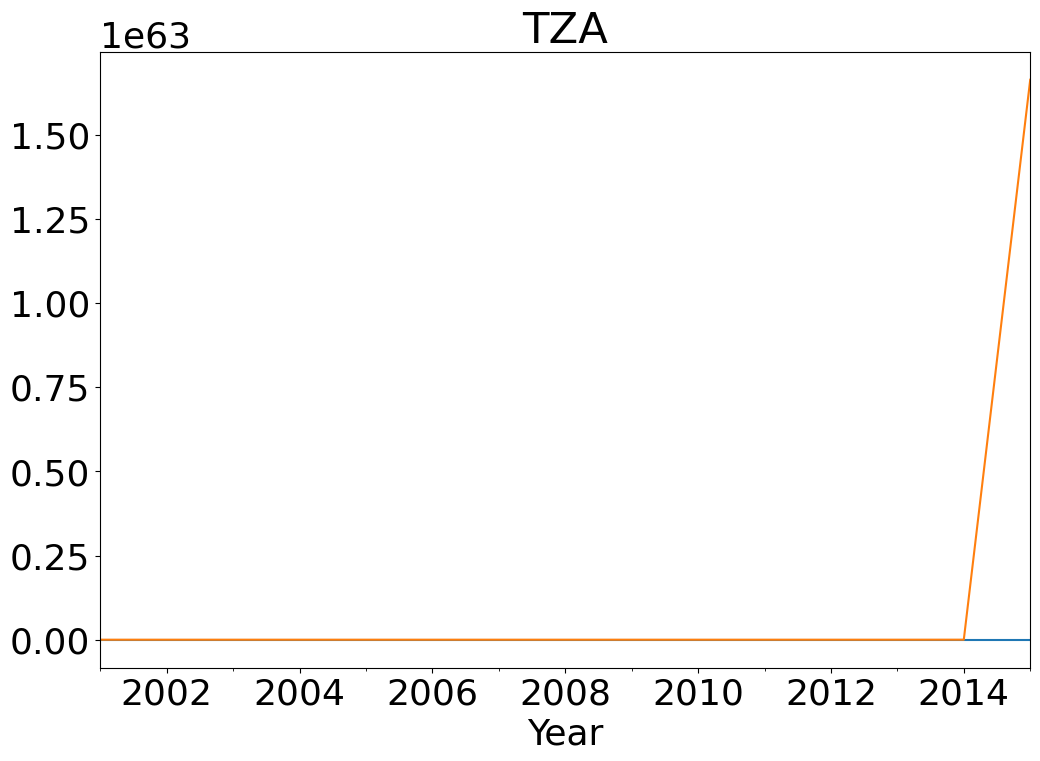

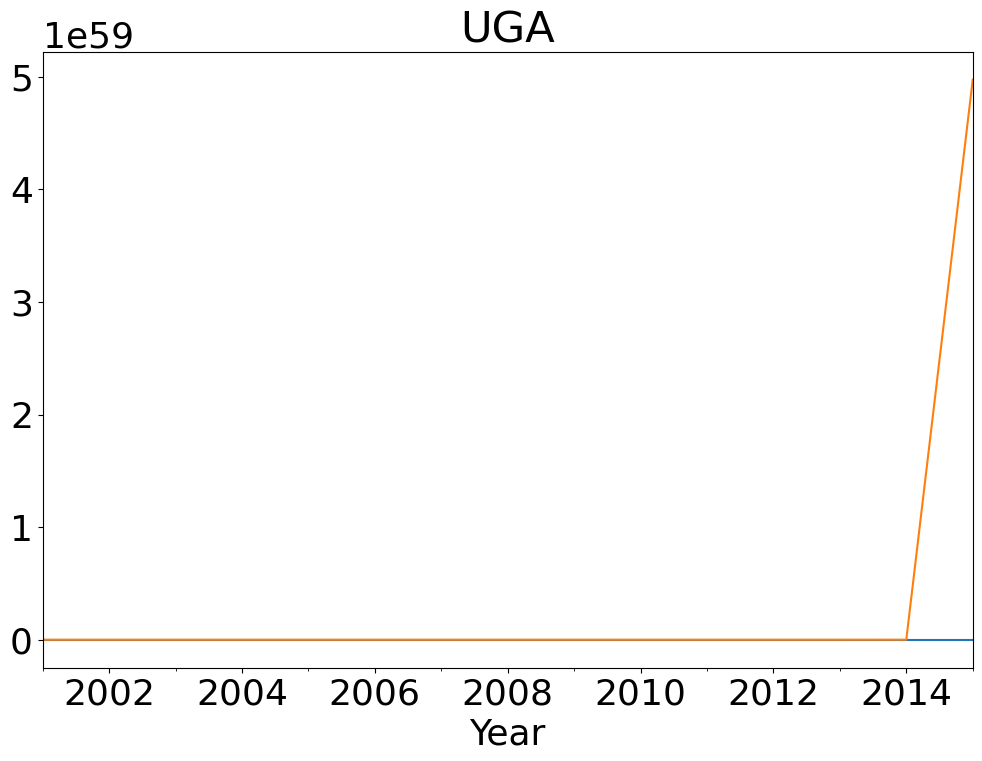

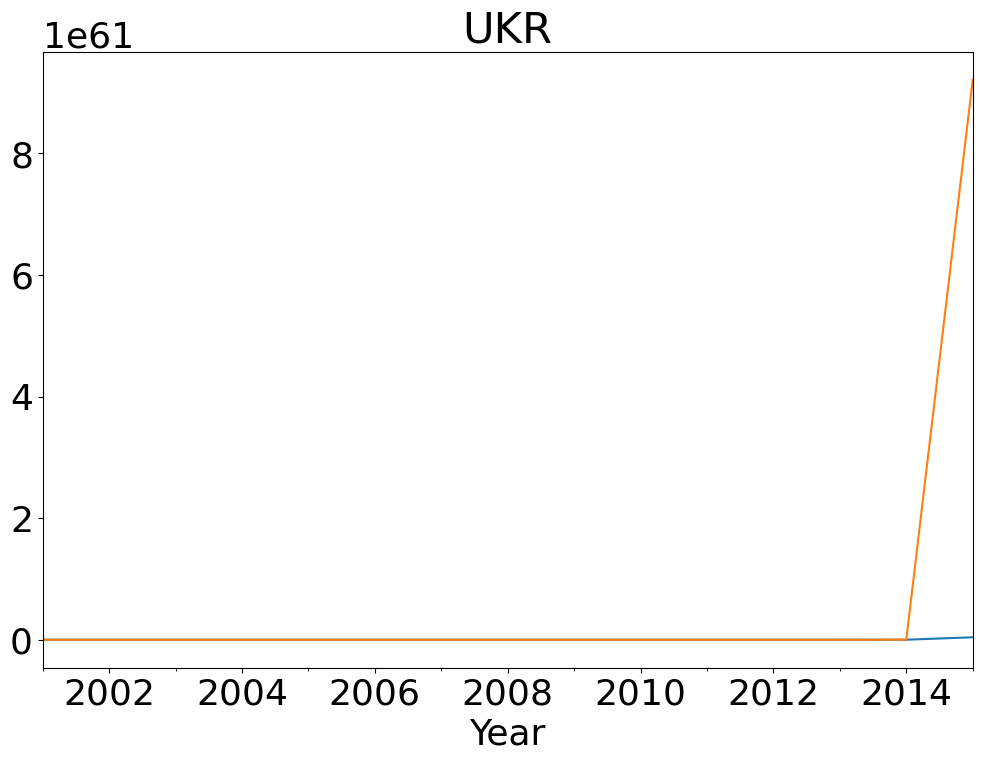

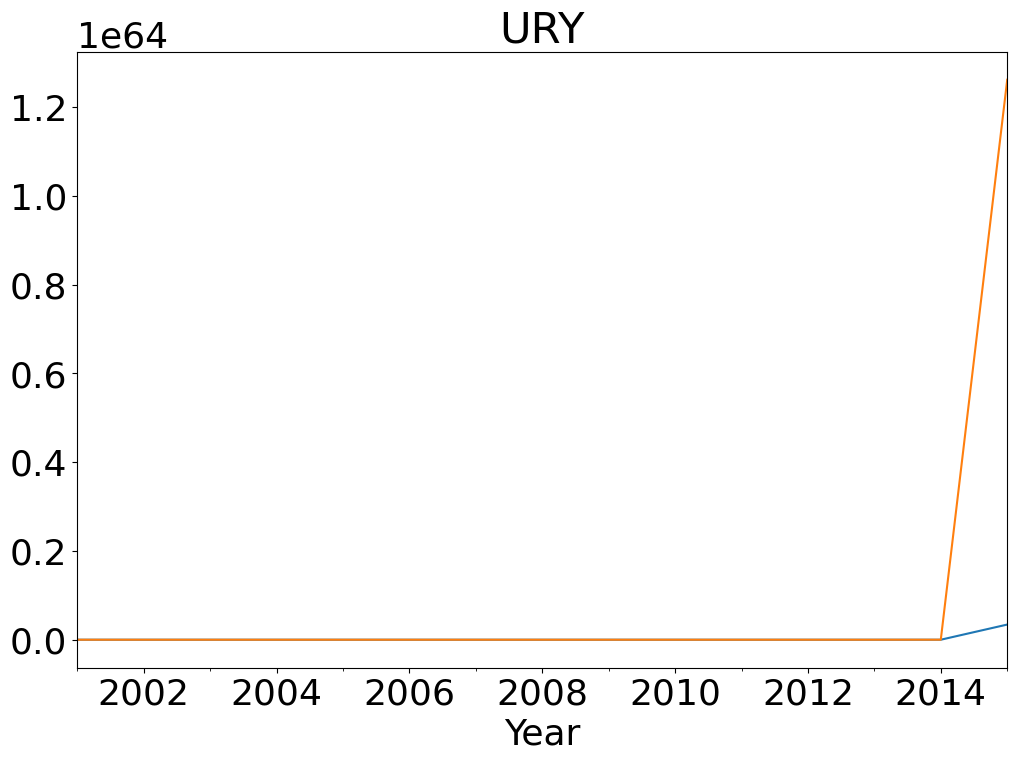

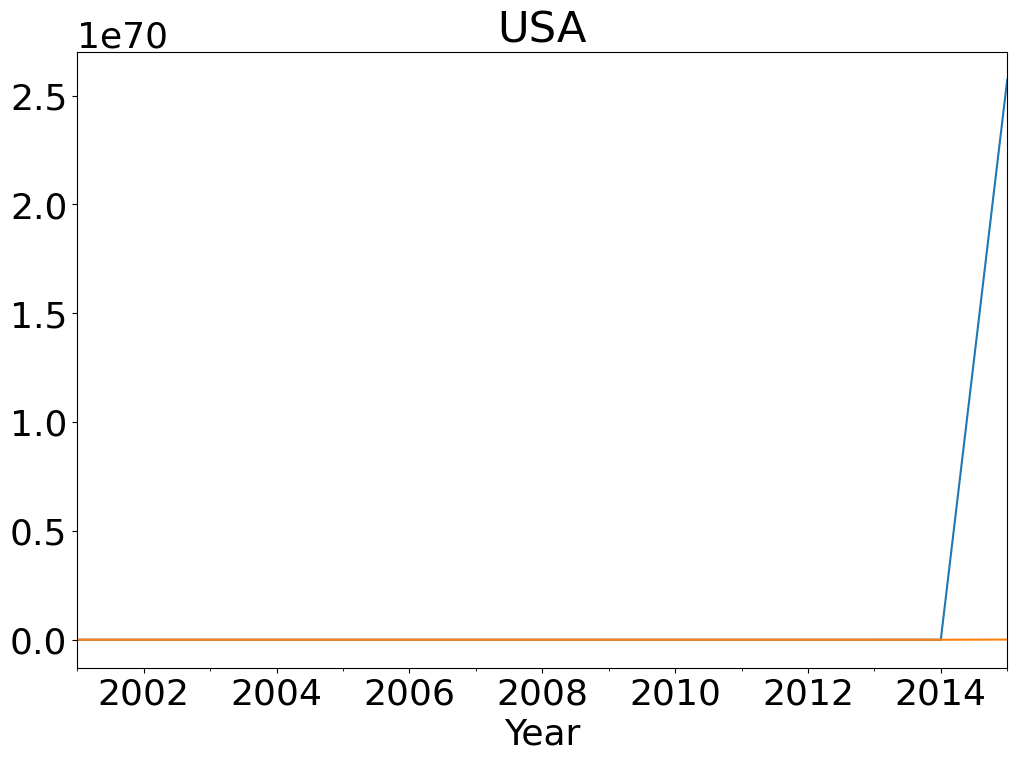

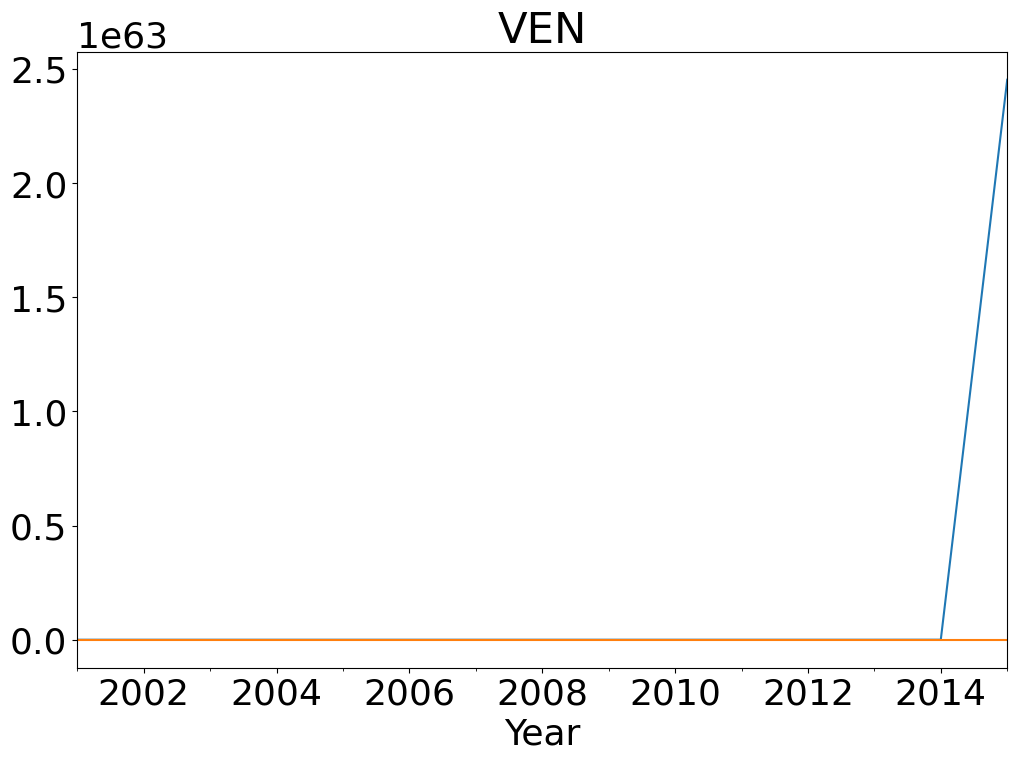

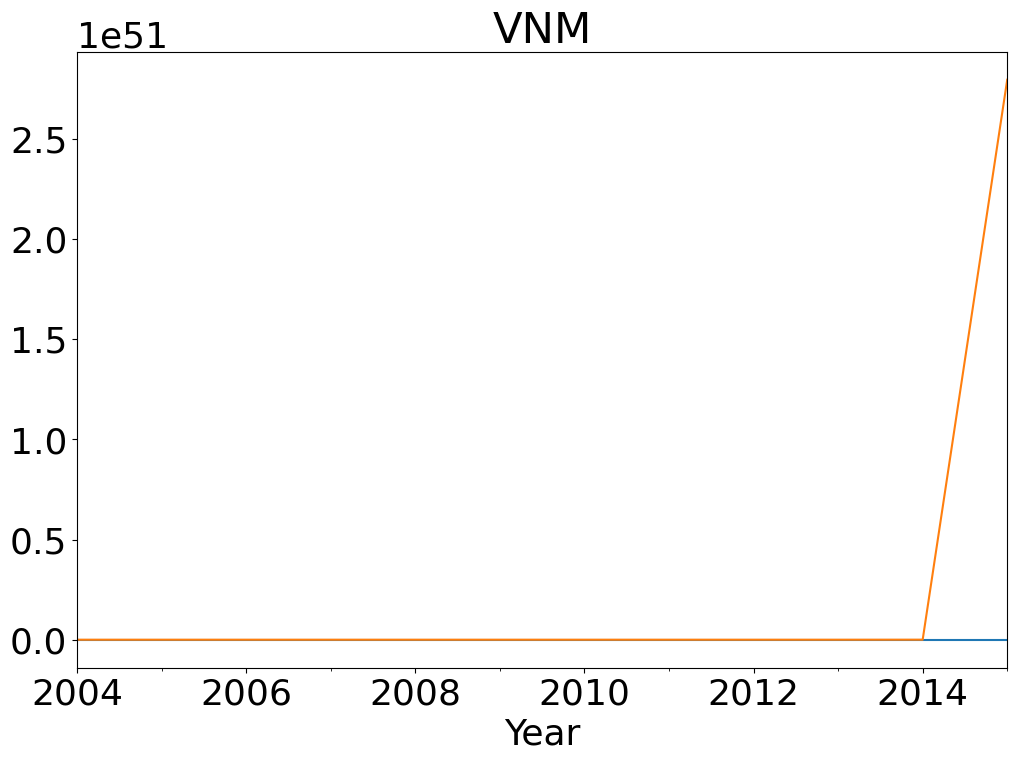

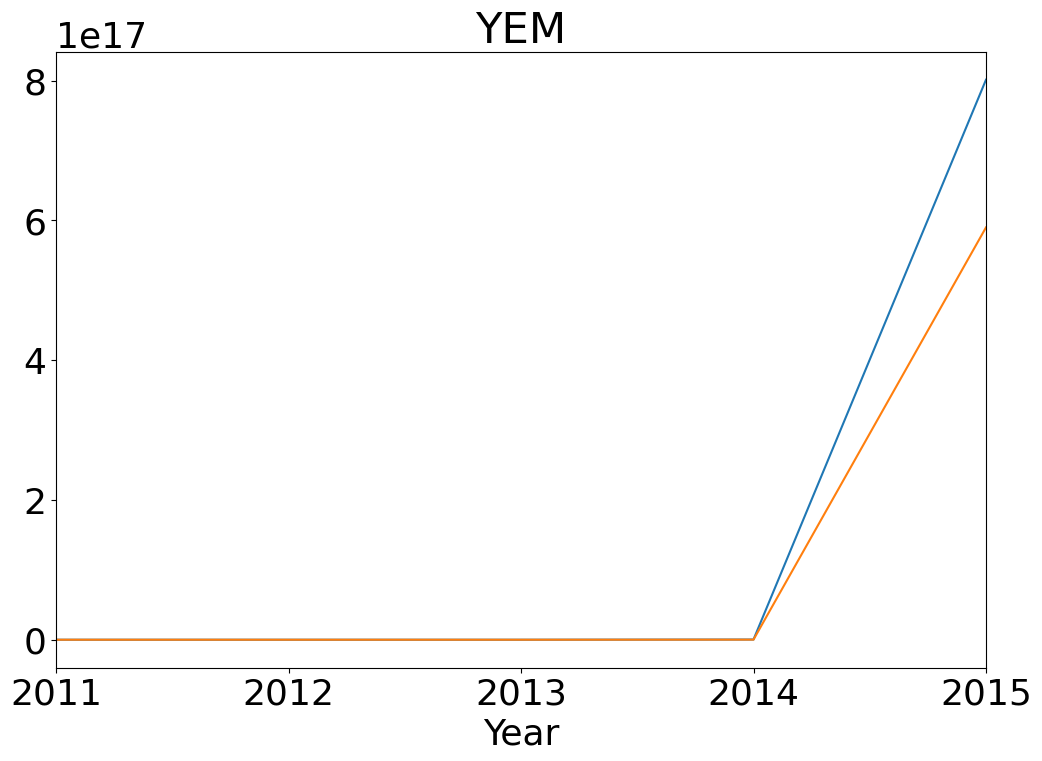

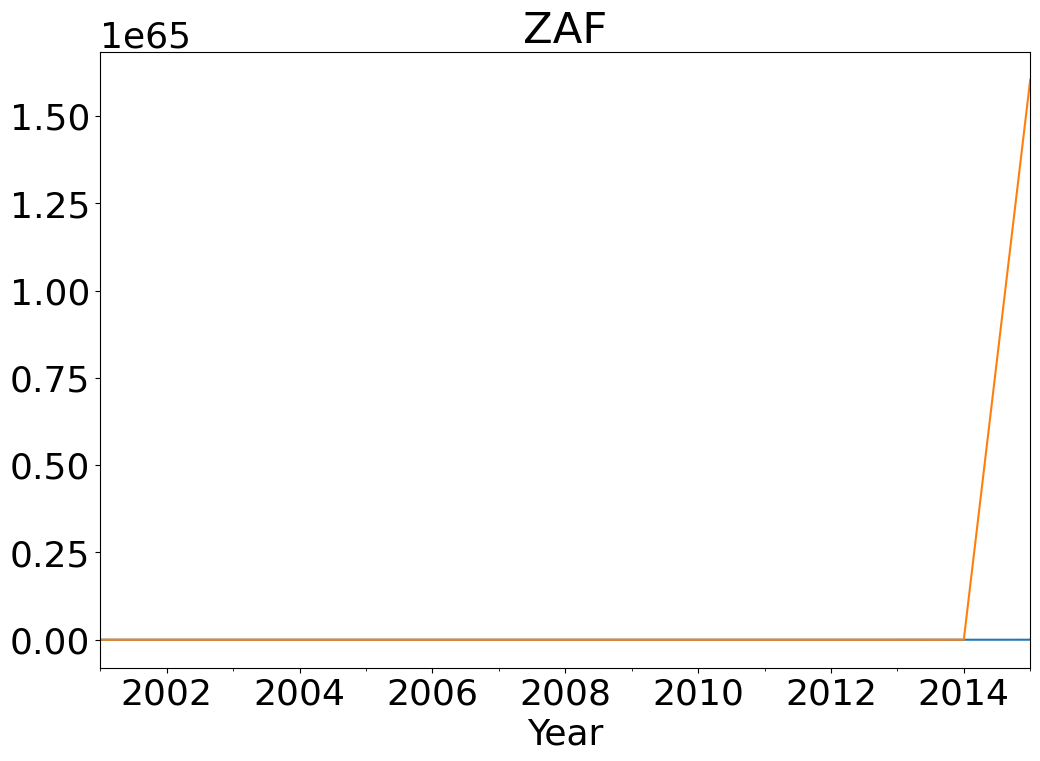

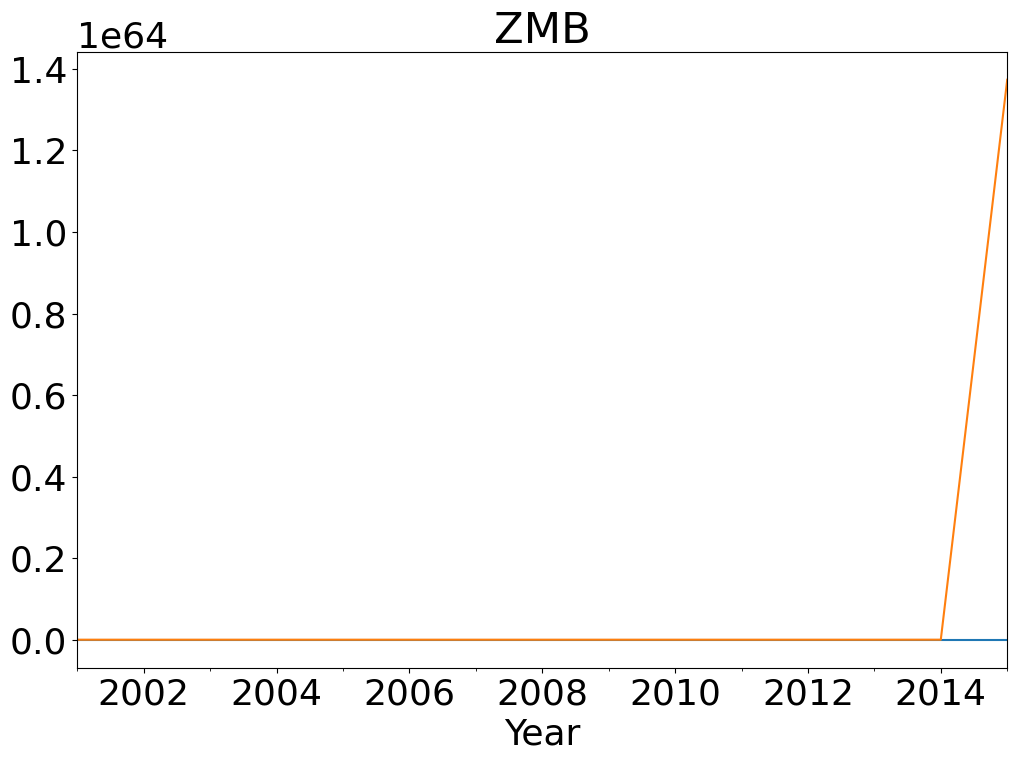

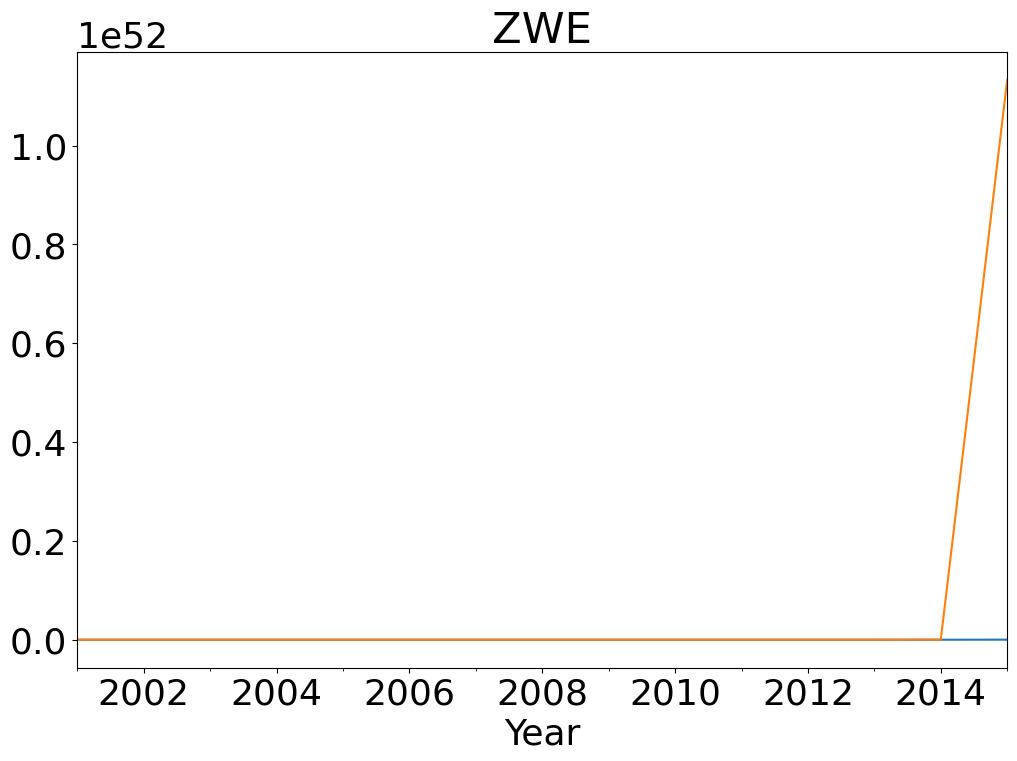

In [73]:
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))

    plot_data[y_var + ["Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    
    ax.set_title(country)
    plt.plot()